In [1]:
# Initialize Notebook
from IPython.core.display import HTML,Image
#%run ../library/v1.0.5/init.ipy
HTML('''<script> code_show=true;  function code_toggle() {  if (code_show){  $('div.input').hide();  } else {  $('div.input').show();  }  code_show = !code_show }  $( document ).ready(code_toggle); </script> <form action="javascript:code_toggle()"><input type="submit" value="Toggle Code"></form>''')

In [2]:
import gc, argparse, sys, os, errno
from IPython.core.display import HTML,Image
from functools import reduce
import h5py
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from bokeh.io import output_notebook, show
output_notebook()
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.neighbors import NearestNeighbors
from bokeh.palettes import Category20c
from ipywidgets import interact,interactive, FloatSlider,IntSlider, RadioButtons,Dropdown,Tab,Text

Populating the interactive namespace from numpy and matplotlib


Loading BokehJS ...

In [3]:
def embed_pdf_figure(width='640', height='480', title='Image'):
    data = BytesIO()
    plt.savefig(data, format='pdf', metadata={'Title': title})
    data = data.getvalue()
    data = 'data:application/pdf;base64,'+ str(b64encode(data), encoding='utf-8')
    display(HTML('<object width="{}" height="{}" data="{}" download="{}.pdf"></object>'.format(
        width, height, data, title)))
    plt.close()
    
from base64 import b64encode, b64decode
from io import StringIO, BytesIO

fonttitle = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 8}
fontlabel = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 6.5}
fontticklabel = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 6.5}
fontlegend = {'family':'Arial',
                  'weight' : 'normal', 
              #'linewidth':0.5,
                  'size' : 6.5}
fontcbarlabel = {'family':'Arial',
                 'weight' : 'normal', 
                 #'Rotation' : 270,
                 #'labelpad' : 25,
                 'size' : 6.5}
fontcbarticklabel = {'family':'Arial',#Helvetica
                 'weight' : 'normal', 
                 'size' : 5.5}
def std_plot(ax,xlabel,ylabel,title=None,
             legendtitle=None,bbox_to_anchor=None,
             labelspacing=1.2,borderpad=0,handletextpad=0,legendsort=True,markerscale=None,
             xlim=None,ylim=None,
             xbins=None,ybins=None,
             cbar=None,cbarlabel=None,
             moveyaxis=False,sns=False,left=True):
    #plt.yticks([0,0.2,0.4,0.6,0.8,1.0],['0','0.2','0.4','0.6','0.8','1.0'])
    pyplot.draw()
    #plt.figure(linewidth=30.5)
    if xlim is not None:  
        ax.set(xlim=xlim)
    if ylim is not None:
        ax.set(ylim=ylim)
    #pyplot.draw()
    if xbins is not None:
        locator = MaxNLocator(nbins=xbins)
        locator.set_axis(ax.xaxis)
        ax.set_xticks(locator())
    if ybins is not None:
        locator = MaxNLocator(nbins=ybins)
        locator.set_axis(ax.yaxis)
        ax.set_yticks(locator())
    pyplot.draw()
    ax.set_xticks(ax.get_xticks())
    ax.set_yticks(ax.get_yticks())
    ax.set_xlabel(xlabel,fontdict = fontlabel,labelpad=5.5)
    ax.set_ylabel(ylabel,fontdict = fontlabel,labelpad=5.5)
    ax.set_xticklabels(ax.get_xticklabels(),fontticklabel)
    ax.set_yticklabels(ax.get_yticklabels(),fontticklabel)

    if moveyaxis is True:
        #fontticklabel 
        ax.spines['left'].set_position(('data',0))
    ax.spines['left'].set_visible(left)
    ax.spines['right'].set_visible(not left)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('k')
    ax.spines['left'].set_color('k')
    ax.spines['right'].set_color('k')
    
    ax.tick_params(direction='out', pad=2)
    #ax.spines['bottom']._edgecolor="#000000"
    #ax.spines['left']._edgecolor="#000000"
    if title is not None:
        ax.set_title(title,fontdict = fonttitle)
    if legendtitle is not None:
        #if legendloc is None:
        #    legendloc="best"
        legend = ax.legend(title=legendtitle,prop=fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale)
        ax.legend_.get_frame()._linewidth=0.5
        legend.get_title().set_fontweight('normal')
        legend.get_title().set_fontsize(6.5)
        if legendsort is True:
            # h: handle l:label
            h,l = ax.get_legend_handles_labels()
            l,h = zip(*sorted(zip(l,h), key=lambda t: int(t[0]))) 
            legend = ax.legend(h,l,title=legendtitle,prop=fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale)
            ax.legend_.get_frame()._linewidth=0.5
            legend.get_title().set_fontweight('normal')
            legend.get_title().set_fontsize(6.5)
        if sns is True:
            h,l = ax.get_legend_handles_labels()
            #l,h = zip(*sorted(zip(l,h), key=lambda t: int(t[0]))) 
            legend = ax.legend(h[1:],l[1:],title=legendtitle,prop=fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale)
            ax.legend_.get_frame()._linewidth=0.5
            legend.get_title().set_fontweight('normal')
            legend.get_title().set_fontsize(6.5)

    if cbar is not None:
        #locator, formatter = cbar._get_ticker_locator_formatter()
        #ticks, ticklabels, offset_string = cbar._ticker(locator, formatter)
        #cbar.ax.spines['top'].set_visible(False)
        #cbar.ax.spines['right'].set_visible(False)
        #cbar.ax.spines['bottom'].set_visible(False)
        #cbar.ax.spines['left'].set_visible(False)
        cbar.ax.tick_params(direction='out', pad=3,width=0,length=0)
        cbar.set_label(cbarlabel,fontdict = fontcbarlabel,Rotation=270,labelpad=7.5)
        cbar.ax.set_yticks(cbar.ax.get_yticks())
        cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),fontcbarticklabel)
    return ax

def gradient_func(val):
    return '<span style="background: linear-gradient(90deg, #d65f5f {0}%, transparent 0%)">{0:.3f}</span>'.format(val)

def display_dataframe(df, filename=None, encoding='utf-8', format='csv', type='button',gradientfunc=False, **kwargs):
    #display(df)
    #if isinstance(df, pd.DataFrame):
    #    display(df.style.set_caption(filename))
    #else:
    if gradientfunc == False:
        display(df.style.set_caption(filename))    
    else:
        display(df.style.format(gradient_func).set_caption(filename)) 
    if filename is None:
        filename = "dataframe"
    if format == 'csv':
        data = df.to_csv(**kwargs)
        mime_type = 'text/csv'
        filename = filename + '.csv'
    elif format == 'tsv':
        data = df.to_csv(**kwargs)
        mime_type = 'text/plain'
        filename = filename + '.txt'
    else:
        raise ValueError('unknown file format: {}'.format(format))
    data = 'data:{mime_type};base64,'.format(mime_type=mime_type) + str(b64encode(bytes(data, encoding=encoding)), encoding=encoding)
    if type == 'hyperlink':
        display(HTML('<a href=" " download={filename} target="_blank">{filename}</a >'.format(
            mime_type=mime_type, filename=filename, data=data)))
    elif type == 'button':
        button_id = 'button_{}'.format(np.random.randint(1000000000))
        display(HTML(r'<input type="button" id="{0}" value="Download">'.format(button_id)))
        display(HTML('''<script>
    document.getElementById("{button_id}").addEventListener("click", function(event){{
        var filename = "{filename}";
        var data = "{data}";
        const element = document.createElement('a');
        element.setAttribute('href', data);
        element.setAttribute('download', filename);
        element.style.display = 'none';
        document.body.appendChild(element);
        element.click();
        document.body.removeChild(element);
    }});
</script>'''.format(button_id=button_id, filename=filename, data=data)))

In [4]:
cd ~/ex

/home/xieyufeng/ex


In [5]:
def interactive_config_settings(dataset,sequencing_type,classifier,value_change,example_cancer,reads_preprocess):
    if sequencing_type == 'short':
        exp_mx_name = 'domains_combined'
    elif sequencing_type =='long':
        exp_mx_name = 'featurecounts'
    elif sequencing_type =='domain_only':
        exp_mx_name = 'domains_long'
    elif sequencing_type =='transcript':
        exp_mx_name = 'transcript'
    return dataset,sequencing_type,classifier,value_change,exp_mx_name,example_cancer,reads_preprocess

widget =interactive(interactive_config_settings,
           dataset= ['scirep','exorbase','exosome_small','pico_3v3'],
           sequencing_type=['short','long','domain_only','transcript'],
           classifier = ['random_forest','logistic_regression','linear_svm'],
           value_change = ['any','up','down'],
        example_cancer=['Normal-CRC','Normal-PAAD','Normal-PRAD','Normal-HCC','Normal-CRC_S1'
                       ,'Normal-CRC_S2','Normal-CRC_S3','Normal-CRC_S4'],
                   reads_preprocess=[True,False])  # if start from preprocessing
display(widget)

interactive(children=(Dropdown(description='dataset', options=('scirep', 'exorbase', 'exosome_small', 'pico_3v3'), value='scirep'), Dropdown(description='sequencing_type', options=('short', 'long', 'domain_only', 'transcript'), value='short'), Dropdown(description='classifier', options=('random_forest', 'logistic_regression', 'linear_svm'), value='random_forest'), Dropdown(description='value_change', options=('any', 'up', 'down'), value='any'), Dropdown(description='example_cancer', options=('Normal-CRC', 'Normal-PAAD', 'Normal-PRAD', 'Normal-HCC', 'Normal-CRC_S1', 'Normal-CRC_S2', 'Normal-CRC_S3', 'Normal-CRC_S4'), value='Normal-CRC'), Dropdown(description='reads_preprocess', options=(True, False), value=True), Output()), _dom_classes=('widget-interact',))

In [6]:
dataset,sequencing_type,classifier_use,value_change,exp_mx_name,example_cancer,reads_preprocess = widget.result
dataset,sequencing_type,classifier_use,value_change,exp_mx_name,example_cancer,reads_preprocess

('scirep',
 'short',
 'random_forest',
 'any',
 'domains_combined',
 'Normal-CRC',
 True)

In [7]:
file_counts = 'output/'+dataset+'/summary/read_counts.txt'
file_length_path = 'output/'+dataset+'/stats/mapped_read_length_by_sample/'
file_length_path_insert = 'output/'+dataset+'/stats/mapped_insert_size_by_sample/'
plot_save_path = 'output/'+dataset+'/plots/'

    
import datetime
now = datetime.datetime.now()
timenow = '{}.{}.{}.{}:{}'.format(now.year,now.month,now.day,now.hour,now.minute)
savepath = 'output/candidate/'+dataset+'/'+dataset+'.'+sequencing_type+'.'+classifier_use+'.'+value_change+'.'+timenow+'/'
if not os.path.exists(savepath):
    os.mkdir(savepath)

# Basic plot

In [11]:
#Get table
def get_counts_ratio_table(file_counts,sequencing_type='short'):
    df = pd.read_table(file_counts, index_col=0)
    if reads_preprocess == True:
        if sequencing_type == 'short':
            rna_types = [s.split('.')[0] for s in df.index.tolist() if s.endswith('.mapped')]
            rna_types = 'rRNA,miRNA,piRNA,Y_RNA,srpRNA,tRNA,snRNA,snoRNA,lncRNA,mRNA,tucpRNA,intron,promoter,enhancer,repeats,circRNA,other'.split(',')
            mapped_ratio = {}
            mapped_count = {}
            for sample_id in df.columns.tolist():
                mapped_ratio[sample_id] = {}
                mapped_count[sample_id] = {}
                clean_counts = float(df.loc['clean.unmapped', sample_id])
                for rna_type in rna_types:
                    mapped_ratio[sample_id][rna_type] = df.loc[rna_type + '.mapped', sample_id]/(
                        clean_counts - df.loc['other.unmapped', sample_id])
                    mapped_count[sample_id][rna_type] = df.loc[rna_type + '.mapped', sample_id]
                for region in ('promoter', 'enhancer', 'intron','repeats','circRNA'):
                    mapped_ratio[sample_id]['other'] -= mapped_ratio[sample_id][region]
                    mapped_count[sample_id]['other'] -= mapped_count[sample_id][region]
            mapped_count = pd.DataFrame.from_records(mapped_count)        
            mapped_ratio = pd.DataFrame.from_records(mapped_ratio)
            mapped_count = mapped_count.loc[rna_types, :]
            mapped_ratio = mapped_ratio.loc[rna_types, :]
            return df,mapped_count.T, mapped_ratio.T
        elif sequencing_type =='long':
            index_1 = np.array(['rRNA','genome','remove_duplicates'])
            index_2 = np.array(['Y_RNA','circRNA','lncRNA','mRNA','snRNA','snoRNA','srpRNA','tucpRNA'])
            mapped_count_1 = df.loc[index_1]
            mapped_ratio_1 = mapped_count_1/df.loc['clean']
            mapped_count_2 = df.loc[index_2]
            mapped_ratio_2 = mapped_count_2/df.loc['remove_duplicates']
            return df,mapped_count_1.T, mapped_ratio_1.T,mapped_count_2.T, mapped_ratio_2.T
    else:
        if sequencing_type == 'short':
            pass
        elif sequencing_type =='long':
            read_counts = pd.read_table(file_counts, index_col=0)
            read_counts = read_counts.T

            rna_types = read_counts.columns.tolist()
            rna_types.remove('clean')
            rna_types_included = list(rna_types)
            for rna_type in ('genome', 'rRNA'):
                rna_types_included.remove(rna_type)

            # percentage by clean reads
            #display(read_counts.style.set_caption('Read counts'))

            percent_by_clean = read_counts.loc[:, ['clean', 'rRNA', 'genome', 'circRNA']].copy()
            percent_by_clean = 100.0*percent_by_clean.div(percent_by_clean.loc[:, 'clean'], axis=0)
            percent_by_clean.drop(columns='clean', inplace=True)
            percent_by_clean['unmapped'] = 100 - percent_by_clean.sum(axis=1)
            #display(percent_by_clean.style.format(gradient_func).set_caption('Percentage by clean reads'))

            percent_by_mapped = read_counts.copy()
            percent_by_mapped = 100.0*percent_by_mapped.div(percent_by_mapped.loc[:, ['genome', 'circRNA']].sum(axis=1), axis=0)
            percent_by_mapped.drop(columns=['rRNA', 'genome', 'clean'], inplace=True)
            percent_by_mapped['other'] = 100.0 - percent_by_mapped.sum(axis=1)
            #display(percent_by_mapped.style.format(gradient_func).set_caption('Percentage by mapped reads'))
            return read_counts,percent_by_clean,percent_by_mapped
        

In [12]:
def get_length_table(file_length_path,sequencing_type='short'):
    length_table = {}
    for i in os.listdir(file_length_path):
        if sequencing_type =='short':
            length_table[i] = pd.read_table(file_length_path+i,index_col=0).iloc[16:52]
        elif sequencing_type =='long':
            length_table[i] = pd.read_table(file_length_path+i,index_col=0).iloc[16:152]
    sample_names = np.array(os.listdir(file_length_path))
    length_table_sum = length_table[sample_names[0]]
    for i in sample_names[1:]:
        length_table_sum += length_table[i]
    return length_table_sum/length_table_sum.sum(axis=0)

In [13]:
if reads_preprocess == True:
    if sequencing_type == 'short': 
        read_counts,table_count, table_ratio = get_counts_ratio_table(file_counts)
        length_table = get_length_table(file_length_path,sequencing_type=sequencing_type)
        rnanames=np.array(table_ratio.columns).astype('str')
    elif sequencing_type == 'long': 
        read_counts,table_count_1, table_ratio_1,table_count_2, table_ratio_2 = \
                        get_counts_ratio_table(file_counts,sequencing_type='long')
        rnanames_1=np.array(table_ratio_1.columns).astype('str')
        rnanames_2=np.array(table_ratio_2.columns).astype('str')
        length_table_1 = get_length_table(file_length_path,sequencing_type=sequencing_type)
        length_table_2 = get_length_table(file_length_path_insert,sequencing_type=sequencing_type)
else:
    if sequencing_type == 'short': 
        pass
    elif sequencing_type == 'long': 
        read_counts,percent_by_clean,percent_by_mapped = \
                        get_counts_ratio_table(file_counts,sequencing_type='long')
        rnanames_1=np.array(percent_by_clean.columns).astype('str')
        rnanames_2=np.array(percent_by_mapped.columns).astype('str')
        length_table_1 = get_length_table(file_length_path,sequencing_type=sequencing_type)
        length_table_2 = get_length_table(file_length_path_insert,sequencing_type=sequencing_type)

In [14]:
if reads_preprocess == True:
    if sequencing_type == 'short': 
        table_percent = table_ratio*100
        display_dataframe(table_count,filename='Mapped counts',gradientfunc=False)
        display_dataframe(table_percent,filename='Percentage by clean reads',gradientfunc=True)
    elif sequencing_type == 'long': 
        table_percent_1,table_percent_2 = table_ratio_1*100, table_ratio_2*100
        display_dataframe(table_count_1,filename='Mapped counts 1',gradientfunc=False)
        display_dataframe(table_count_2,filename='Mapped counts 2',gradientfunc=False)
        display_dataframe(table_percent_1,filename='Percentage by clean reads 1',gradientfunc=True)
        display_dataframe(table_percent_2,filename='Percentage by clean reads 2',gradientfunc=True)
else:
    if sequencing_type == 'short': 
        pass
    elif sequencing_type == 'long': 
        display_dataframe(read_counts,filename='Read counts',gradientfunc=False)
        display_dataframe(percent_by_clean,filename='Percentage by clean reads',gradientfunc=True)
        display_dataframe(percent_by_mapped,filename='Percentage by mapped reads',gradientfunc=True)

## pie plot of RNA ratio

In [15]:
def plot_pie(data, rnanames):
    '''
    data: table_ratio
    rnanames: rna type names
    adjustment: merge RNA with small percent together
    '''
    from bokeh.io import output_file, show
    from bokeh.palettes import Category20
    from bokeh.plotting import figure
    from bokeh.transform import cumsum
    x = np.array(rnanames)
    y = np.array(data.loc[:,x].mean())+10e-8
    z_ = np.array([x[i] + str(' {:.2f}'.format(y[i]*100)+'%') for i in range(y.shape[0])])
    z = np.array([float('{:.10f}'.format(y[i]*100)) for i in range(y.shape[0])])
    labels = rnanames
    dataframe = pd.DataFrame(np.concatenate((x.reshape(-1,1),z.reshape(-1,1),z_.reshape(-1,1)),axis=1))
    dataframe.columns=['rna','percent','label']
    dataframe["percent"] = pd.to_numeric(dataframe["percent"])
    dataframe['angle'] = dataframe['percent']/dataframe['percent'].sum() * 2*pi
    dataframe['color'] = Category20[len(x)]
    p = figure(plot_height=500, title="Pie Chart", toolbar_location=None,
               tools="hover", tooltips="@label", x_range=(-0.5, 1.0))
    p.wedge(x=0.14, y=1, radius=0.45,
            start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
            line_color="black", fill_color='color', legend="label", source=dataframe)
    p.axis.axis_label=None
    p.axis.visible=False
    p.grid.grid_line_color = None
    show(p)
def plot_for_pie(sequencing_type='short',by_sample=False):
    if by_sample:
        if sequencing_type == 'short': 
            for i in range(table_ratio.shape[0]):
                plot_pie(pd.DataFrame(table_ratio.iloc[i]).T, rnanames)
        elif sequencing_type == 'long': 
            for i in range(table_ratio.shape[0]):
                plot_pie(pd.DataFrame(table_ratio_1.iloc[i]).T, rnanames_1)
                plot_pie(pd.DataFrame(table_ratio_2.iloc[i]).T, rnanames_2)
    else:
        if sequencing_type == 'short': 
            plot_pie(table_ratio, rnanames)
        elif sequencing_type == 'long': 
            plot_pie(table_ratio_1, rnanames_1)
            plot_pie(table_ratio_2, rnanames_2)
            
plot_for_pie(sequencing_type='short',by_sample=False)

## boxplot of rna ratio

In [16]:
def plot_ratio_boxplot(data, rnanames, points_show = True, width=20, height=10, savefig=False):
    '''
    data: table_ratio
    rnanames: rna type names
    points_show: plot scatter points too
    '''
    fig, ax = plt.subplots(figsize=(width, height))
    sns.boxplot(data = data,ax=ax,boxprops=dict(alpha=.001),color='gray',width=0.65,saturation=0.01)
    if points_show:
        sns.stripplot(data = data,ax=ax,size=2, edgecolor='black')
    
    ax.set_xticklabels(rnanames,rotation=90)
    std_plot(ax,'type','percentage')
    #ax.set_yticklabels(['{:.1f}%'.format((i-1)*10) for i in range(10)],fontsize=20,fontweight='bold')
    fig.tight_layout()
    if savefig:
        fig.savefig(save_path+'rna_ratio_box_plot.png', bbox_inches='tight')
    #plt.figure(linewidth=30.5)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
if sequencing_type == 'long': 
    plot_ratio_boxplot(table_ratio_1, rnanames_1, points_show = True, 
                   width=7, height=2.5, savefig=False)
    plot_ratio_boxplot(table_ratio_2, rnanames_2, points_show = True, 
                   width=7, height=2.5, savefig=False)
else: 
    plot_ratio_boxplot(table_ratio, rnanames, points_show = True, width=7, height=5, savefig=False)

embed_pdf_figure()


## line plot of rna length

In [17]:
def plot_length_line(data, rnanames, width=7, height=20, savefig=False):
    '''
    data: length_table
    rnanames: rna type names
    '''
    length = np.array(data.T)
    fig,ax=plt.subplots(length.shape[0],1,figsize=(width, height))
    for i in range(length.shape[0]):
        ax[i].plot(length[i],label=data.columns[i], color=Category20c[20][i],linewidth=1)
        ax[i].legend(loc='upper right')
        ax[i].set_xticks(np.arange(0, data.shape[0],5))
        ax[i].set_xticklabels(np.arange(data.index[0], data.index[-1]+5,5))
        std_plot(ax[i],'','',ylim=[0,max(length[i])],ybins=5)
        legend = ax[i].legend(prop=fontlegend,
              bbox_to_anchor=None,
              borderpad=1,
              edgecolor="#000000",fancybox=False)
        ax[i].legend_.get_frame()._linewidth=0.5
        legend.get_title().set_fontweight('normal')
        legend.get_title().set_fontsize(6.5)
        #ax[i].set(ylim=[0,1])
        #if i != 10:
        #    ax[i].spines['bottom'].set_visible(False)
        #    ax[i].set_xticks([])
    if savefig:
        fig.savefig(save_path+'rna_length_line_plot.eps', bbox_inches='tight')
    fig.tight_layout()
    embed_pdf_figure()

In [18]:
if sequencing_type == 'long': 
    plot_length_line(length_table_1, rnanames_1, width=7, height=length_table_1.shape[1], savefig=False)
    plot_length_line(length_table_2, rnanames_2, width=7, height=length_table_2.shape[1], savefig=False)
else: 
    plot_length_line(length_table, rnanames, width=7, height=length_table.shape[1], savefig=False)

## 3D barplot of rna length

In [19]:
def plot_3d(width=7, height=5,  azim = 45, elev = 32,savefig=False):
    '''
    data: length_table
    '''
    data = length_table
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(width,height))
    ax1 = fig.gca(projection="3d")
    num = data.shape[1]
    count_ = data.shape[0]
    xpos = np.repeat(np.arange(1,count_+1),num).reshape(count_,-1).T.ravel()
    ypos = np.repeat(range(num),count_).ravel()
    num_elements = len(xpos)
    zpos = np.zeros(count_*num)
    dx = np.ones(count_*num)/5
    dy = np.ones(count_*num)/5
    dz = np.array(data.T).ravel()
    
    for i in range(num):
        ax1.bar3d(xpos[count_*i:count_*(i+1)], ypos[count_*i:count_*(i+1)], zpos[count_*i:count_*(i+1)],
                  dx[count_*i:count_*(i+1)], dy[count_*i:count_*(i+1)],dz[count_*i:count_*(i+1)], color=(np.array(Category20c[20]))[:num][i],alpha=0.9)
    plt.xticks(range(count_), [str(i+16) for i in range(count_)], size=6.5,color='red',weight='normal',family='Arial',rotation=-azim)
    ax1.set_yticks(range(num))
    ax1.set_yticklabels(data.columns, color='blue',weight='normal',family='Arial', size=6.5)
    fig.canvas.draw()
    ax1.set_zticks(ax1.get_zticks())
    ax1.set_zticklabels(ax1.get_zticklabels(),weight='normal',family='Arial', size=6.5)
    for color,tick in zip((Category20c[20])[:num],ax1.yaxis.get_major_ticks()):
        tick.label1.set_color(color)
    ax1.view_init(azim=azim,elev=elev)  
    ax1.xaxis.pane.fill = False
    ax1.yaxis.pane.fill = False
    ax1.zaxis.pane.fill = False
    ax1.xaxis.pane.set_edgecolor('w')
    ax1.yaxis.pane.set_edgecolor('w')
    ax1.zaxis.pane.set_edgecolor('w')
    fig.tight_layout()
    if savefig:
        fig.savefig(plot_save_path+'rna_length_3D_barplot.png', bbox_inches='tight')

In [20]:
plot_3d(width=7, height=5, savefig=False, azim = 45, elev = 32)
embed_pdf_figure()

## stack bar plot of rna counts and ratio

In [22]:
from matplotlib.colors import LinearSegmentedColormap
def stack_bar_ratio(table, ax,statistics = 'ratio',savefig=False):   
    
    table.plot(kind='bar', stacked=True,ax=ax,width=0.5,
                legend=True,colormap=matplotlib.colors.ListedColormap ( Category20c[20]))
    #ax.legend(bbox_to_anchor=(1,1),fontsize='large')#, loc="lower right",
    #ax.set_title('Stacked Bar plot',fontsize=40)
    if savefig:
        fig.savefig(save_path+statistics+'_stack_barplot.png', bbox_inches='tight')
    return ax

In [23]:
fig,ax=plt.subplots(figsize=(14,4))
if sequencing_type == 'long': 
    ax = stack_bar_ratio(table_ratio_1,ax=ax)
    ax = stack_bar_ratio(table_ratio_2,ax=ax)
else:
    ax = stack_bar_ratio(table_ratio,ax=ax)
std_plot(ax,'sample','percentage',legendtitle='type',legendsort=False,ylim=[0,1],bbox_to_anchor=(1,1),borderpad=0.2)
fig.tight_layout()
embed_pdf_figure()

In [24]:
fig,ax=plt.subplots(figsize=(14,4))
if sequencing_type == 'short': 
    ax = stack_bar_ratio(table_count,ax=ax)
elif sequencing_type == 'long': 
    ax = stack_bar_ratio(table_count_1,ax=ax)
    ax = stack_bar_ratio(table_count_2,ax=ax)
std_plot(ax,'sample','counts(1e7)',legendtitle='type',legendsort=False,bbox_to_anchor=(1,1),borderpad=0.2)
fig.tight_layout()
embed_pdf_figure()

## bar plot of RNA by sample

In [25]:
def plot_bar_by_rna(ax,table,rnaname,savefig=False, statistics = 'ratio',height = 4, width=20):
    '''
    table: ratio or count table, rows are rna type
    statistics: ratio or count
    '''
    table = table.T
    count = np.array(table[table.index ==rnaname]).ravel()
    #fig,ax=plt.subplots(1,figsize=(width,height))
    counttable =  pd.DataFrame(np.concatenate((np.arange(1,table.shape[1]+1).reshape(-1,1),
                count[np.argsort(-count)].reshape(-1,1)),axis=1),columns=['sample',statistics])
    sns.barplot(ax=ax,x='sample',y=statistics,data = counttable,color=Category20c[20][np.random.randint(0,20)],alpha=1)
    ax.set_xticks(np.arange(0,table.shape[1],5))
    ax.set_xticklabels(np.arange(0,table.shape[1],5))
    ax.set_title(statistics+' of '+rnaname,fontsize=15)
    if savefig:
        fig.savefig(save_path+'sample_'+rnaname+'_'+statistics+'_bar_plot.png', bbox_inches='tight')

In [26]:
def plot_bar_by_rna_total(table,datatype='ratio'):
    fignum= table.columns.shape[0]
    fig,ax=plt.subplots(fignum ,1,figsize=(7 , 24 ))
    for i in range(fignum):
        plot_bar_by_rna(ax[i],table,table.columns[i],statistics = datatype)
        std_plot(ax[i],'sample','ratio',datatype+' of '+table.columns[i])
    fig.tight_layout()

In [27]:
if sequencing_type == 'long': 
    plot_bar_by_rna_total(table_ratio_1,datatype='ratio')
    plot_bar_by_rna_total(table_ratio_2,datatype='ratio')
else: 
    plot_bar_by_rna_total(table_ratio,datatype='ratio')

embed_pdf_figure()

In [28]:
if sequencing_type == 'long': 
    plot_bar_by_rna_total(table_count_1,datatype='count')
    plot_bar_by_rna_total(table_count_2,datatype='count')
else: 
    plot_bar_by_rna_total(table_count,datatype='count')
embed_pdf_figure()

## FastQC

In [29]:
summary = pd.read_table('output/'+dataset+'/summary/fastqc.txt', sep='\t')
qc_status = summary.iloc[:, 9:]
qc_status.fillna('NA')
qc_status = qc_status.astype('str')
sample_ids = summary.sample_id
sections = qc_status.columns.values
def style_func(val):
    status, row, col = val.split('|')
    row, col = int(row), int(col)
    color = {'pass': 'green', 'fail': 'red', 'warn': 'orange'}.get(status, 'gray')
    return '<a href="../output/'+dataset+'/fastqc/{sample_id}_fastqc.html#M{section}" style="color: {color}">{status}</a>'.format(
        sample_id=sample_ids[row], color=color, status=status, section=col + 1)

pd.DataFrame(qc_status.values \
             + '|' + np.arange(qc_status.shape[0]).astype('str')[:, np.newaxis] \
             + '|' + np.arange(qc_status.shape[1]).astype('str')[np.newaxis, :],
             index=qc_status.index, columns=qc_status.columns) \
    .style.format(style_func)

## Sample QC
use PCA and tSNE to visualize outliters

In [30]:
original_mx_file = 'output/'+dataset+'/count_matrix/'+exp_mx_name+'.txt'
original_mx = pd.read_table(original_mx_file,index_col=0)

In [31]:
def PCA_plot_basic(ax,data,sampleclass,method = 'PCA'):
    X = np.log2(data + 0.001).T
    X = StandardScaler().fit_transform(X)
    if method == 'PCA':
        transform = PCA()
    elif method == 'tSNE':
        transform = TSNE()
    elif method == 'UMAP':
        transform = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation')
    
    X_pca = transform.fit_transform(X)
    plot_table = pd.DataFrame(X_pca[:,:2])
    plot_table.columns = ['dimension_1','dimension_2']
    g = sns.scatterplot(ax=ax,data=plot_table,x="dimension_1", y="dimension_2",
                   s=50)
    return g
    #plt.figure(linewidth=30.5)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
def sample_qc_visualize_outlier(original_mx,table_ratio,method='PCA'):
    fig, ax = plt.subplots(1,2,figsize=(7, 4))
    if method=='PCA':
        method_PCA = True
    elif method=='tSNE':
        method_PCA = False
    g = PCA_plot_basic(ax[0],original_mx, method_PCA)
    std_plot(g,'Dimension 1','Dimension 2','Original matrix')
    g = PCA_plot_basic(ax[1],table_ratio, method_PCA)
    std_plot(g,'Dimension 1','Dimension 2','Table ratio')
    embed_pdf_figure()

In [32]:
sample_qc_visualize_outlier(original_mx,table_ratio.T,method='tSNE')

# Matrix processing

In [11]:
def null_name(string):
    if string =='null':
        return '.null'
    else:
        return '.'+string
    
def generate_processed_filename(original_mx_file,imputation_method,normalization_method,batch_removal_method,batch_index): 
    imputename = null_name(imputation_method)
    normname = null_name(normalization_method)
    batchname = null_name(batch_removal_method)
    if batch_index=='null':
        batchindname = ''
    else:
        batchindname = '_'+batch_index
    return'filter'+imputename+normname+batchname+batchindname+'.'+original_mx_file.split('/')[-1]

In [12]:
preselected_methods_dir

NameError: name 'preselected_methods_dir' is not defined

In [13]:
def get_best_preprocess_methods(output_dir, preselected_methods_dir):
    records = []
    pbar = tqdm(unit='directory')
    for preprocess_method in preselected_methods_dir:#os.listdir(output_dir):#
        if preprocess_method.split('.')[-1] ==exp_mx_name:
            #print (preprocess_method)
            for compare_group in os.listdir(os.path.join(output_dir, preprocess_method)):
                print (compare_group)
                for feature_selection_method in os.listdir(os.path.join(output_dir, preprocess_method, compare_group)):
                    #print (os.listdir(os.path.join(output_dir)),feature_selection_method)
                    if feature_selection_method.split('.')[0] ==classifier_use:
                        #print (feature_selection_method.split('.')[0])
                        classifier, n_select, select_method,value_change  = feature_selection_method.split('.')
                        record = {
                            'compare_group': compare_group,
                            'classifier': classifier,
                            'n_features': n_select,
                            'preprocess_method': preprocess_method,
                            'value_change': value_change
                        }
                        try:
                            metrics = pd.read_table(os.path.join(output_dir,
                                preprocess_method, compare_group, feature_selection_method,
                                'metrics.test.txt'))
                            #display(metrics)
                        except:
                            continue
                        record['test_roc_auc_mean'] = metrics['roc_auc'].mean()
                        pbar.update(1)
                        records.append(record)
    pbar.close()
    records = pd.DataFrame.from_records(records)
    #display(records)
    records['n_features'] = records.loc[:, 'n_features'].astype(np.int32)
    
    best_preprocess_methods = {}
    for compare_group, sub_df in records.groupby('compare_group'):
        pivot = sub_df.pivot_table(
            index='preprocess_method', columns='n_features', values='test_roc_auc_mean')
        #print(pivot.iloc[:, 0])
        #print(np.argsort(np.argsort(pivot.values, axis=0), axis=0)[:, 0])
        mean_ranks = np.mean(pivot.shape[0] - np.argsort(np.argsort(pivot.values, axis=0), axis=0), axis=1)
        mean_ranks = pd.Series(mean_ranks, index=pivot.index.values)
        mean_ranks = mean_ranks.sort_values()
        rename_index = ['{} (rank = {:.1f})'.format(name, value) for name, value in zip(mean_ranks.index, mean_ranks.values)]
        rename_index = pd.Series(rename_index, index=mean_ranks.index.values)
        sub_df = sub_df.copy()
        sub_df['preprocess_method'] = rename_index[sub_df['preprocess_method'].values].values
        sub_df['n_features'] = sub_df['n_features'].astype('int')
        sub_df = sub_df.sort_values(['preprocess_method', 'n_features'], ascending=True)
        sub_df['n_features'] = sub_df['n_features'].astype('str')
        best_preprocess_methods[compare_group] = sub_df.iloc[0]['preprocess_method']
        best_preprocess_methods[compare_group] = mean_ranks.index[0]
    return best_preprocess_methods

#use uca to presort methods
preselected_methods = np.loadtxt('output/'+dataset+'/select_preprocess_method/uca_score/'+exp_mx_name+'/selected_methods.txt',dtype='str')
preselected_methods_dir = np.array([preselected_methods[i]+'.'+exp_mx_name for i in range(preselected_methods.shape[0])])

best_preprocess_methods = get_best_preprocess_methods('output/'+dataset+'/cross_validation',preselected_methods_dir)


HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

Normal-PRAD
Normal-PAAD
Normal-CRC_S3
Normal-CRC
Normal-CRC_S2
Normal-CRC_S4
Normal-CRC_S1
Normal-PRAD
Normal-PAAD
Normal-CRC_S3
Normal-CRC
Normal-CRC_S2
Normal-CRC_S4
Normal-CRC_S1
Normal-PRAD
Normal-PAAD
Normal-CRC_S3
Normal-CRC
Normal-CRC_S2
Normal-CRC_S4
Normal-CRC_S1



In [54]:
def get_best_preprocess_methods(output_dir, preselected_methods_dir):
    records = []
    pbar = tqdm(unit='directory')
    for preprocess_method in preselected_methods_dir:#os.listdir(output_dir):#
        #if preprocess_method.split('.')[-1] ==exp_mx_name:
            #print (preprocess_method)
        for compare_group in os.listdir(os.path.join(output_dir, preprocess_method)):
            print (compare_group)
            for feature_selection_method in os.listdir(os.path.join(output_dir, preprocess_method, compare_group)):
                #print (os.listdir(os.path.join(output_dir)),feature_selection_method)
                #if feature_selection_method.split('.')[0] ==classifier_use:
                    #print (feature_selection_method.split('.')[0])
                classifier, n_select, select_method,value_change  = feature_selection_method.split('.')
                record = {
                    'compare_group': compare_group,
                    'classifier': classifier,
                    'n_features': n_select,
                    'preprocess_method': preprocess_method,
                    'value_change': value_change
                }
                try:
                    metrics = pd.read_table(os.path.join(output_dir,
                        preprocess_method, compare_group, feature_selection_method,
                        'metrics.test.txt'))
                    #display(metrics)
                except:
                    continue
                record['test_roc_auc_mean'] = metrics['roc_auc'].mean()
                pbar.update(1)
                records.append(record)
    pbar.close()
    records = pd.DataFrame.from_records(records)
    display(records)
    records['n_features'] = records.loc[:, 'n_features'].astype(np.int32)
    
    best_preprocess_methods = {}
    for compare_group, sub_df in records.groupby('compare_group'):
        pivot = sub_df.pivot_table(
            index='preprocess_method', columns='n_features', values='test_roc_auc_mean')
        #print(pivot.iloc[:, 0])
        #print(np.argsort(np.argsort(pivot.values, axis=0), axis=0)[:, 0])
        mean_ranks = np.mean(pivot.shape[0] - np.argsort(np.argsort(pivot.values, axis=0), axis=0), axis=1)
        mean_ranks = pd.Series(mean_ranks, index=pivot.index.values)
        mean_ranks = mean_ranks.sort_values()
        rename_index = ['{} (rank = {:.1f})'.format(name, value) for name, value in zip(mean_ranks.index, mean_ranks.values)]
        rename_index = pd.Series(rename_index, index=mean_ranks.index.values)
        sub_df = sub_df.copy()
        sub_df['preprocess_method'] = rename_index[sub_df['preprocess_method'].values].values
        sub_df['n_features'] = sub_df['n_features'].astype('int')
        sub_df = sub_df.sort_values(['preprocess_method', 'n_features'], ascending=True)
        sub_df['n_features'] = sub_df['n_features'].astype('str')
        display(sub_df)
        print (sub_df.iloc[0]['preprocess_method'],mean_ranks.index[0])
        #best_preprocess_methods[compare_group] = sub_df.iloc[0]['preprocess_method']
        best_preprocess_methods[compare_group] = mean_ranks.index[0]
    return best_preprocess_methods

#use uca to presort methods
preselected_methods = np.loadtxt('output/'+dataset+'/select_preprocess_method/uca_score/'+exp_mx_name+'/selected_methods.txt',dtype='str')
preselected_methods_dir = np.array([preselected_methods[i]+'.'+exp_mx_name for i in range(preselected_methods.shape[0])])

best_preprocess_methods = get_best_preprocess_methods('output/'+dataset+'/cross_validation',preselected_methods_dir)


HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

Normal-PRAD
Normal-PAAD
Normal-CRC_S3
Normal-CRC
Normal-CRC_S2
Normal-CRC_S4
Normal-CRC_S1
Normal-PRAD
Normal-PAAD
Normal-CRC_S3
Normal-CRC
Normal-CRC_S2
Normal-CRC_S4
Normal-CRC_S1
Normal-PRAD
Normal-PAAD
Normal-CRC_S3
Normal-CRC
Normal-CRC_S2
Normal-CRC_S4
Normal-CRC_S1


classifier  compare_group n_features  \
0    logistic_regression    Normal-PRAD         10   
1          random_forest    Normal-PRAD         10   
2          random_forest    Normal-PRAD         10   
3    logistic_regression    Normal-PRAD         10   
4    logistic_regression    Normal-PRAD         10   
5             linear_svm    Normal-PRAD         10   
6             linear_svm    Normal-PRAD         10   
7          random_forest    Normal-PRAD         10   
8             linear_svm    Normal-PRAD         10   
9    logistic_regression    Normal-PAAD         10   
10         random_forest    Normal-PAAD         10   
11         random_forest    Normal-PAAD         10   
12   logistic_regression    Normal-PAAD         10   
13   logistic_regression    Normal-PAAD         10   
14            linear_svm    Normal-PAAD         10   
15            linear_svm    Normal-PAAD         10   
16         random_forest    Normal-PAAD         10   
17            linear_svm    Normal-PAAD         10   
18         decision_tree  Normal-CRC_S3         10   
19   logistic_regression  Normal-CRC_S3         10   
20         decision_tree  Normal-CRC_S3         10   
21         random_forest  Normal-CRC_S3         10   
22         random_forest  Normal-CRC_S3         10   
23   logistic_regression  Normal-CRC_S3         10   
24   logistic_regression  Normal-CRC_S3         10   
25            linear_svm  Normal-CRC_S3         10   
26            linear_svm  Normal-CRC_S3         10   
27         decision_tree  Normal-CRC_S3         10   
28         random_forest  Normal-CRC_S3         10   
29            linear_svm  Normal-CRC_S3         10   
..                   ...            ...        ...   
199  logistic_regression  Normal-CRC_S2         10   
200           linear_svm  Normal-CRC_S2         10   
201           linear_svm  Normal-CRC_S2         10   
202        decision_tree  Normal-CRC_S2         10   
203        random_forest  Normal-CRC_S2         10   
204           linear_svm  Normal-CRC_S2         10   
205        decision_tree  Normal-CRC_S4         10   
206  logistic_regression  Normal-CRC_S4         10   
207        decision_tree  Normal-CRC_S4         10   
208        random_forest  Normal-CRC_S4         10   
209        random_forest  Normal-CRC_S4         10   
210  logistic_regression  Normal-CRC_S4         10   
211  logistic_regression  Normal-CRC_S4         10   
212           linear_svm  Normal-CRC_S4         10   
213           linear_svm  Normal-CRC_S4         10   
214        decision_tree  Normal-CRC_S4         10   
215        random_forest  Normal-CRC_S4         10   
216           linear_svm  Normal-CRC_S4         10   
217        decision_tree  Normal-CRC_S1         10   
218  logistic_regression  Normal-CRC_S1         10   
219        decision_tree  Normal-CRC_S1         10   
220        random_forest  Normal-CRC_S1         10   
221        random_forest  Normal-CRC_S1         10   
222  logistic_regression  Normal-CRC_S1         10   
223  logistic_regression  Normal-CRC_S1         10   
224           linear_svm  Normal-CRC_S1         10   
225           linear_svm  Normal-CRC_S1         10   
226        decision_tree  Normal-CRC_S1         10   
227        random_forest  Normal-CRC_S1         10   
228           linear_svm  Normal-CRC_S1         10   

                                     preprocess_method  test_roc_auc_mean  \
0    filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.967750   
1    filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.980375   
2    filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.952500   
3    filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.938250   
4    filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.883250   
5    filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.977250   
6    filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.912750   
7    filter.viper_count.Norm_SCnorm.Batch_RUV.dom

classifier compare_group n_features  \
184  logistic_regression    Normal-CRC         10   
185        random_forest    Normal-CRC         10   
186        random_forest    Normal-CRC         10   
187  logistic_regression    Normal-CRC         10   
188  logistic_regression    Normal-CRC         10   
189           linear_svm    Normal-CRC         10   
190           linear_svm    Normal-CRC         10   
191        random_forest    Normal-CRC         10   
192           linear_svm    Normal-CRC         10   
108        decision_tree    Normal-CRC         10   
109  logistic_regression    Normal-CRC         10   
110        random_forest    Normal-CRC         10   
111        random_forest    Normal-CRC         10   
112  logistic_regression    Normal-CRC         10   
113  logistic_regression    Normal-CRC         10   
114           linear_svm    Normal-CRC         10   
115           linear_svm    Normal-CRC         10   
116        random_forest    Normal-CRC         10   
117           linear_svm    Normal-CRC         10   
30   logistic_regression    Normal-CRC         10   
31         random_forest    Normal-CRC         10   
32         random_forest    Normal-CRC         10   
33   logistic_regression    Normal-CRC         10   
34   logistic_regression    Normal-CRC         10   
35            linear_svm    Normal-CRC         10   
36            linear_svm    Normal-CRC         10   
37         random_forest    Normal-CRC         10   
38            linear_svm    Normal-CRC         10   

                                     preprocess_method  test_roc_auc_mean  \
184  filter.null.Norm_CPM.Batch_RUV.domains_combine...            0.69240   
185  filter.null.Norm_CPM.Batch_RUV.domains_combine...            0.69770   
186  filter.null.Norm_CPM.Batch_RUV.domains_combine...            0.62985   
187  filter.null.Norm_CPM.Batch_RUV.domains_combine...            0.64660   
188  filter.null.Norm_CPM.Batch_RUV.domains_combine...            0.54910   
189  filter.null.Norm_CPM.Batch_RUV.domains_combine...            0.70040   
190  filter.null.Norm_CPM.Batch_RUV.domains_combine...            0.55120   
191  filter.null.Norm_CPM.Batch_RUV.domains_combine...            0.72095   
192  filter.null.Norm_CPM.Batch_RUV.domains_combine...            0.65150   
108  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...            0.62670   
109  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...            0.65720   
110  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...            0.72800   
111  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...            0.68580   
112  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...            0.61260   
113  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...            0.57180   
114  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...            0.66840   
115  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...            0.55380   
116  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...            0.76425   
117  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...            0.63130   
30   filter.viper_count.Norm_SCnorm.Batch_RUV.domai...            0.73220   
31   filter.viper_count.Norm_SCnorm.Batch_RUV.domai...            0.72235   
32   filter.viper_count.Norm_SCnorm.Batch_RUV.domai...            0.61135   
33   filter.viper_count.Norm_SCnorm.Batch_RUV.domai...            0.68800   
34   filter.viper_count.Norm_SCnorm.Batch_RUV.domai...            0.53960   
35   filter.viper_count.Norm_SCnorm.Batch_RUV.domai...            0.73820   
36   filter.viper_count.Norm_SCnorm.Batch_RUV.domai...            0.54910   
37   filter.viper_count.Norm_SCnorm.Batch_RUV.domai...            0.75145   
38   filter.viper_count.Norm_SCnorm.Batch_RUV.domai...            0.65810   

    value_change  
184           up  
185          any  
186         down  
187          any  
188         down  
189           up  
190         down  
191           up  
192          any  
108          any  
109           up  
110          a

filter.null.Norm_CPM.Batch_RUV.domains_combined (rank = 3.0) filter.viper_count.Norm_SCnorm.Batch_RUV.domains_combined


classifier  compare_group n_features  \
217        decision_tree  Normal-CRC_S1         10   
218  logistic_regression  Normal-CRC_S1         10   
219        decision_tree  Normal-CRC_S1         10   
220        random_forest  Normal-CRC_S1         10   
221        random_forest  Normal-CRC_S1         10   
222  logistic_regression  Normal-CRC_S1         10   
223  logistic_regression  Normal-CRC_S1         10   
224           linear_svm  Normal-CRC_S1         10   
225           linear_svm  Normal-CRC_S1         10   
226        decision_tree  Normal-CRC_S1         10   
227        random_forest  Normal-CRC_S1         10   
228           linear_svm  Normal-CRC_S1         10   
142        decision_tree  Normal-CRC_S1         10   
143  logistic_regression  Normal-CRC_S1         10   
144        decision_tree  Normal-CRC_S1         10   
145        random_forest  Normal-CRC_S1         10   
146        random_forest  Normal-CRC_S1         10   
147  logistic_regression  Normal-CRC_S1         10   
148  logistic_regression  Normal-CRC_S1         10   
149           linear_svm  Normal-CRC_S1         10   
150           linear_svm  Normal-CRC_S1         10   
151        decision_tree  Normal-CRC_S1         10   
152        random_forest  Normal-CRC_S1         10   
153           linear_svm  Normal-CRC_S1         10   
63         decision_tree  Normal-CRC_S1         10   
64   logistic_regression  Normal-CRC_S1         10   
65         decision_tree  Normal-CRC_S1         10   
66         random_forest  Normal-CRC_S1         10   
67         random_forest  Normal-CRC_S1         10   
68   logistic_regression  Normal-CRC_S1         10   
69   logistic_regression  Normal-CRC_S1         10   
70            linear_svm  Normal-CRC_S1         10   
71            linear_svm  Normal-CRC_S1         10   
72         decision_tree  Normal-CRC_S1         10   
73         random_forest  Normal-CRC_S1         10   
74            linear_svm  Normal-CRC_S1         10   

                                     preprocess_method  test_roc_auc_mean  \
217  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.6786   
218  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.8182   
219  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.6316   
220  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.7566   
221  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.7568   
222  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.8746   
223  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.7108   
224  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.8204   
225  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.7356   
226  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.6864   
227  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.7790   
228  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.8880   
142  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.7052   
143  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.8146   
144  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.5872   
145  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.7642   
146  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.7078   
147  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.8506   
148  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.6680   
149  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.8004   
150  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.6540   
151  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.7058   
152  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.8034   
153  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.8696   
63   filter.viper_count.Norm_SCnorm.Batch_RUV.domai...             0.6978   
64   filter.v

filter.null.Norm_CPM.Batch_RUV.domains_combined (rank = 2.0) filter.viper_count.Norm_SCnorm.Batch_RUV.domains_combined


classifier  compare_group n_features  \
193        decision_tree  Normal-CRC_S2         10   
194  logistic_regression  Normal-CRC_S2         10   
195        decision_tree  Normal-CRC_S2         10   
196        random_forest  Normal-CRC_S2         10   
197        random_forest  Normal-CRC_S2         10   
198  logistic_regression  Normal-CRC_S2         10   
199  logistic_regression  Normal-CRC_S2         10   
200           linear_svm  Normal-CRC_S2         10   
201           linear_svm  Normal-CRC_S2         10   
202        decision_tree  Normal-CRC_S2         10   
203        random_forest  Normal-CRC_S2         10   
204           linear_svm  Normal-CRC_S2         10   
118        decision_tree  Normal-CRC_S2         10   
119  logistic_regression  Normal-CRC_S2         10   
120        decision_tree  Normal-CRC_S2         10   
121        random_forest  Normal-CRC_S2         10   
122        random_forest  Normal-CRC_S2         10   
123  logistic_regression  Normal-CRC_S2         10   
124  logistic_regression  Normal-CRC_S2         10   
125           linear_svm  Normal-CRC_S2         10   
126           linear_svm  Normal-CRC_S2         10   
127        decision_tree  Normal-CRC_S2         10   
128        random_forest  Normal-CRC_S2         10   
129           linear_svm  Normal-CRC_S2         10   
39         decision_tree  Normal-CRC_S2         10   
40   logistic_regression  Normal-CRC_S2         10   
41         decision_tree  Normal-CRC_S2         10   
42         random_forest  Normal-CRC_S2         10   
43         random_forest  Normal-CRC_S2         10   
44   logistic_regression  Normal-CRC_S2         10   
45   logistic_regression  Normal-CRC_S2         10   
46            linear_svm  Normal-CRC_S2         10   
47            linear_svm  Normal-CRC_S2         10   
48         decision_tree  Normal-CRC_S2         10   
49         random_forest  Normal-CRC_S2         10   
50            linear_svm  Normal-CRC_S2         10   

                                     preprocess_method  test_roc_auc_mean  \
193  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.5330   
194  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.5836   
195  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.5222   
196  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.6220   
197  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.6020   
198  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.5800   
199  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.5332   
200  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.6000   
201  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.5700   
202  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.5436   
203  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.6196   
204  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.5976   
118  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.5852   
119  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.4948   
120  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.5236   
121  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.6716   
122  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.6134   
123  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.5536   
124  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.5480   
125  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.5048   
126  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.5416   
127  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.6168   
128  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.6372   
129  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.5444   
39   filter.viper_count.Norm_SCnorm.Batch_RUV.domai...             0.5574   
40   filter.v

filter.null.Norm_CPM.Batch_RUV.domains_combined (rank = 2.0) filter.viper_count.Norm_SCnorm.Batch_RUV.domains_combined


classifier  compare_group n_features  \
172        decision_tree  Normal-CRC_S3         10   
173  logistic_regression  Normal-CRC_S3         10   
174        decision_tree  Normal-CRC_S3         10   
175        random_forest  Normal-CRC_S3         10   
176        random_forest  Normal-CRC_S3         10   
177  logistic_regression  Normal-CRC_S3         10   
178  logistic_regression  Normal-CRC_S3         10   
179           linear_svm  Normal-CRC_S3         10   
180           linear_svm  Normal-CRC_S3         10   
181        decision_tree  Normal-CRC_S3         10   
182        random_forest  Normal-CRC_S3         10   
183           linear_svm  Normal-CRC_S3         10   
96         decision_tree  Normal-CRC_S3         10   
97   logistic_regression  Normal-CRC_S3         10   
98         decision_tree  Normal-CRC_S3         10   
99         random_forest  Normal-CRC_S3         10   
100        random_forest  Normal-CRC_S3         10   
101  logistic_regression  Normal-CRC_S3         10   
102  logistic_regression  Normal-CRC_S3         10   
103           linear_svm  Normal-CRC_S3         10   
104           linear_svm  Normal-CRC_S3         10   
105        decision_tree  Normal-CRC_S3         10   
106        random_forest  Normal-CRC_S3         10   
107           linear_svm  Normal-CRC_S3         10   
18         decision_tree  Normal-CRC_S3         10   
19   logistic_regression  Normal-CRC_S3         10   
20         decision_tree  Normal-CRC_S3         10   
21         random_forest  Normal-CRC_S3         10   
22         random_forest  Normal-CRC_S3         10   
23   logistic_regression  Normal-CRC_S3         10   
24   logistic_regression  Normal-CRC_S3         10   
25            linear_svm  Normal-CRC_S3         10   
26            linear_svm  Normal-CRC_S3         10   
27         decision_tree  Normal-CRC_S3         10   
28         random_forest  Normal-CRC_S3         10   
29            linear_svm  Normal-CRC_S3         10   

                                     preprocess_method  test_roc_auc_mean  \
172  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.5982   
173  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.8414   
174  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.5988   
175  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.7906   
176  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.7300   
177  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.8144   
178  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.6136   
179  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.8424   
180  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.7016   
181  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.6514   
182  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.7926   
183  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.8356   
96   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.6230   
97   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.8182   
98   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.5568   
99   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.7788   
100  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.7154   
101  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.8344   
102  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.6656   
103  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.8548   
104  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.5960   
105  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.6640   
106  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.7784   
107  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.8204   
18   filter.viper_count.Norm_SCnorm.Batch_RUV.domai...             0.6512   
19   filter.v

filter.null.Norm_CPM.Batch_RUV.domains_combined (rank = 2.0) filter.viper_count.Norm_SCnorm.Batch_RUV.domains_combined


classifier  compare_group n_features  \
205        decision_tree  Normal-CRC_S4         10   
206  logistic_regression  Normal-CRC_S4         10   
207        decision_tree  Normal-CRC_S4         10   
208        random_forest  Normal-CRC_S4         10   
209        random_forest  Normal-CRC_S4         10   
210  logistic_regression  Normal-CRC_S4         10   
211  logistic_regression  Normal-CRC_S4         10   
212           linear_svm  Normal-CRC_S4         10   
213           linear_svm  Normal-CRC_S4         10   
214        decision_tree  Normal-CRC_S4         10   
215        random_forest  Normal-CRC_S4         10   
216           linear_svm  Normal-CRC_S4         10   
130        decision_tree  Normal-CRC_S4         10   
131  logistic_regression  Normal-CRC_S4         10   
132        decision_tree  Normal-CRC_S4         10   
133        random_forest  Normal-CRC_S4         10   
134        random_forest  Normal-CRC_S4         10   
135  logistic_regression  Normal-CRC_S4         10   
136  logistic_regression  Normal-CRC_S4         10   
137           linear_svm  Normal-CRC_S4         10   
138           linear_svm  Normal-CRC_S4         10   
139        decision_tree  Normal-CRC_S4         10   
140        random_forest  Normal-CRC_S4         10   
141           linear_svm  Normal-CRC_S4         10   
51         decision_tree  Normal-CRC_S4         10   
52   logistic_regression  Normal-CRC_S4         10   
53         decision_tree  Normal-CRC_S4         10   
54         random_forest  Normal-CRC_S4         10   
55         random_forest  Normal-CRC_S4         10   
56   logistic_regression  Normal-CRC_S4         10   
57   logistic_regression  Normal-CRC_S4         10   
58            linear_svm  Normal-CRC_S4         10   
59            linear_svm  Normal-CRC_S4         10   
60         decision_tree  Normal-CRC_S4         10   
61         random_forest  Normal-CRC_S4         10   
62            linear_svm  Normal-CRC_S4         10   

                                     preprocess_method  test_roc_auc_mean  \
205  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.6152   
206  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.7298   
207  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.6366   
208  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.6798   
209  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.7132   
210  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.7778   
211  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.6032   
212  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.7700   
213  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.6344   
214  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.5494   
215  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.7232   
216  filter.null.Norm_CPM.Batch_RUV.domains_combine...             0.7596   
130  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.6156   
131  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.8288   
132  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.6104   
133  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.7386   
134  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.7658   
135  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.8288   
136  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.6746   
137  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.7808   
138  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.7308   
139  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.5740   
140  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.7096   
141  filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...             0.8236   
51   filter.viper_count.Norm_SCnorm.Batch_RUV.domai...             0.5522   
52   filter.v

filter.null.Norm_CPM.Batch_RUV.domains_combined (rank = 2.0) filter.scimpute_count.Norm_SCnorm.Batch_RUV.domains_combined


classifier compare_group n_features  \
163  logistic_regression   Normal-PAAD         10   
164        random_forest   Normal-PAAD         10   
165        random_forest   Normal-PAAD         10   
166  logistic_regression   Normal-PAAD         10   
167  logistic_regression   Normal-PAAD         10   
168           linear_svm   Normal-PAAD         10   
169           linear_svm   Normal-PAAD         10   
170        random_forest   Normal-PAAD         10   
171           linear_svm   Normal-PAAD         10   
85   logistic_regression   Normal-PAAD         10   
86         decision_tree   Normal-PAAD         10   
87         random_forest   Normal-PAAD         10   
88         random_forest   Normal-PAAD         10   
89   logistic_regression   Normal-PAAD         10   
90   logistic_regression   Normal-PAAD         10   
91            linear_svm   Normal-PAAD         10   
92            linear_svm   Normal-PAAD         10   
93         decision_tree   Normal-PAAD         10   
94         random_forest   Normal-PAAD         10   
95            linear_svm   Normal-PAAD         10   
9    logistic_regression   Normal-PAAD         10   
10         random_forest   Normal-PAAD         10   
11         random_forest   Normal-PAAD         10   
12   logistic_regression   Normal-PAAD         10   
13   logistic_regression   Normal-PAAD         10   
14            linear_svm   Normal-PAAD         10   
15            linear_svm   Normal-PAAD         10   
16         random_forest   Normal-PAAD         10   
17            linear_svm   Normal-PAAD         10   

                                     preprocess_method  test_roc_auc_mean  \
163  filter.null.Norm_CPM.Batch_RUV.domains_combine...           0.882727   
164  filter.null.Norm_CPM.Batch_RUV.domains_combine...           0.998182   
165  filter.null.Norm_CPM.Batch_RUV.domains_combine...           0.885455   
166  filter.null.Norm_CPM.Batch_RUV.domains_combine...           0.829091   
167  filter.null.Norm_CPM.Batch_RUV.domains_combine...           0.849091   
168  filter.null.Norm_CPM.Batch_RUV.domains_combine...           0.836364   
169  filter.null.Norm_CPM.Batch_RUV.domains_combine...           0.900000   
170  filter.null.Norm_CPM.Batch_RUV.domains_combine...           1.000000   
171  filter.null.Norm_CPM.Batch_RUV.domains_combine...           0.836364   
85   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...           0.972727   
86   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...           0.835455   
87   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...           1.000000   
88   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...           0.990000   
89   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...           0.916364   
90   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...           0.961818   
91   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...           0.972727   
92   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...           0.967273   
93   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...           0.948182   
94   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...           1.000000   
95   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...           0.970909   
9    filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.994545   
10   filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           1.000000   
11   filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.984545   
12   filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.996364   
13   filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.972727   
14   filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.996364   
15   filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.965455   
16   filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           1.000000   
17   filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.996364   

    value_change  
163           up  
164          any  
165         down  
166          any  
167         down 

filter.null.Norm_CPM.Batch_RUV.domains_combined (rank = 3.0) filter.viper_count.Norm_SCnorm.Batch_RUV.domains_combined


classifier compare_group n_features  \
154  logistic_regression   Normal-PRAD         10   
155        random_forest   Normal-PRAD         10   
156        random_forest   Normal-PRAD         10   
157  logistic_regression   Normal-PRAD         10   
158  logistic_regression   Normal-PRAD         10   
159           linear_svm   Normal-PRAD         10   
160           linear_svm   Normal-PRAD         10   
161        random_forest   Normal-PRAD         10   
162           linear_svm   Normal-PRAD         10   
75   logistic_regression   Normal-PRAD         10   
76         random_forest   Normal-PRAD         10   
77         random_forest   Normal-PRAD         10   
78   logistic_regression   Normal-PRAD         10   
79   logistic_regression   Normal-PRAD         10   
80            linear_svm   Normal-PRAD         10   
81            linear_svm   Normal-PRAD         10   
82         decision_tree   Normal-PRAD         10   
83         random_forest   Normal-PRAD         10   
84            linear_svm   Normal-PRAD         10   
0    logistic_regression   Normal-PRAD         10   
1          random_forest   Normal-PRAD         10   
2          random_forest   Normal-PRAD         10   
3    logistic_regression   Normal-PRAD         10   
4    logistic_regression   Normal-PRAD         10   
5             linear_svm   Normal-PRAD         10   
6             linear_svm   Normal-PRAD         10   
7          random_forest   Normal-PRAD         10   
8             linear_svm   Normal-PRAD         10   

                                     preprocess_method  test_roc_auc_mean  \
154  filter.null.Norm_CPM.Batch_RUV.domains_combine...           0.942500   
155  filter.null.Norm_CPM.Batch_RUV.domains_combine...           0.968875   
156  filter.null.Norm_CPM.Batch_RUV.domains_combine...           0.951250   
157  filter.null.Norm_CPM.Batch_RUV.domains_combine...           0.922500   
158  filter.null.Norm_CPM.Batch_RUV.domains_combine...           0.913000   
159  filter.null.Norm_CPM.Batch_RUV.domains_combine...           0.942750   
160  filter.null.Norm_CPM.Batch_RUV.domains_combine...           0.899750   
161  filter.null.Norm_CPM.Batch_RUV.domains_combine...           0.975750   
162  filter.null.Norm_CPM.Batch_RUV.domains_combine...           0.911000   
75   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...           0.939625   
76   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...           0.960125   
77   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...           0.922625   
78   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...           0.957250   
79   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...           0.933250   
80   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...           0.947500   
81   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...           0.921500   
82   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...           0.781750   
83   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...           0.970625   
84   filter.scimpute_count.Norm_SCnorm.Batch_RUV.do...           0.950000   
0    filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.967750   
1    filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.980375   
2    filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.952500   
3    filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.938250   
4    filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.883250   
5    filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.977250   
6    filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.912750   
7    filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.978250   
8    filter.viper_count.Norm_SCnorm.Batch_RUV.domai...           0.923000   

    value_change  
154           up  
155          any  
156         down  
157          any  
158         down  
159           up  
160         down  
161           up  
162          any  
75            up  
76           any  
77          do

filter.null.Norm_CPM.Batch_RUV.domains_combined (rank = 2.0) filter.viper_count.Norm_SCnorm.Batch_RUV.domains_combined


In [49]:
best_preprocess_methods

{'Normal-CRC': 'filter.scimpute_count.Norm_SCnorm.Batch_RUV.domains_combined',
 'Normal-CRC_S1': 'filter.null.Norm_CPM.Batch_RUV.domains_combined',
 'Normal-CRC_S2': 'filter.viper_count.Norm_SCnorm.Batch_RUV.domains_combined',
 'Normal-CRC_S3': 'filter.viper_count.Norm_SCnorm.Batch_RUV.domains_combined',
 'Normal-CRC_S4': 'filter.scimpute_count.Norm_SCnorm.Batch_RUV.domains_combined',
 'Normal-PAAD': 'filter.scimpute_count.Norm_SCnorm.Batch_RUV.domains_combined',
 'Normal-PRAD': 'filter.viper_count.Norm_SCnorm.Batch_RUV.domains_combined'}

In [44]:
matrix_processing_path = 'output/'+dataset+'/matrix_processing/'
imputation_method = best_preprocess_methods[example_cancer].split('.')[1]
normalization_method = best_preprocess_methods[example_cancer].split('.')[2]
batch_removal_method = best_preprocess_methods[example_cancer].split('.')[3]
batch_index = 'null'
class_info = 'data/'+dataset+'/sample_classes.txt'
batch_info = 'data/'+dataset+'/batch_info.txt'
original_mx_file = 'output/'+dataset+'/count_matrix/'+exp_mx_name+'.txt'



original_mx = pd.read_table(original_mx_file,index_col=0)
processed_mx = pd.read_table(matrix_processing_path+generate_processed_filename(\
            original_mx_file,imputation_method,normalization_method,batch_removal_method,batch_index),index_col=0)
sample_class = pd.read_table(class_info,sep='\t',index_col=0)
batchtable = pd.read_table(batch_info,sep='\t',index_col=0)


In [45]:
best_preprocess_methods[example_cancer].split('.')

['filter', 'scimpute_count', 'Norm_SCnorm', 'Batch_RUV', 'domains_combined']

## abundance and diversity

In [ ]:
def div_abu_plot(expression_mx,table_ratio,savefig=True):
    #### Diversity matrix
    type_counts_sample = pd.DataFrame()
    for samplename in expression_mx.columns.values:
        #names_[samplename] = expression_mx[samplename].index

        filter_zero_samplename = expression_mx.iloc[np.where(expression_mx[samplename]>0)[0],:]
        names = filter_zero_samplename.index
        names_type = np.array([names[i].split('|')[1] for i in range(names.shape[0])])
        type_counts = np.unique(names_type, return_counts = True)
        new = pd.DataFrame({'type' : type_counts[0],
                            samplename : type_counts[1],
                           })
        new = new.set_index('type')
        type_counts_sample = pd.concat([type_counts_sample, new], axis=1)#, join_axes=[df1.index]

    ####mean_sd matrix
    xticks = type_counts_sample.index.tolist()
    Means = type_counts_sample.mean(axis=1).values.tolist()
    Std=type_counts_sample.std(axis=1).values.tolist()
    mean_sd = pd.DataFrame(data = {'type':xticks,'mean':Means,'std':Std})
    mean_sd = mean_sd.sort_values(by='mean',ascending=False)
    mean_sd = mean_sd.set_index('type')
    Std = [[0]*len(mean_sd['std'].tolist()),mean_sd['std'].tolist()]
    ab = table_ratio*100
    ab['genomic'] = ab['intron'] + ab['promoter'] + ab['enhancer'] + ab['repeats'] + ab['circRNA'] +ab['other']
    xticks_ab = ab.columns.tolist()
    Means_ab = ab.mean(axis=0).values.tolist()
    Std_ab = ab.std(axis=0).values.tolist()
    mean_sd_ab = pd.DataFrame(data = {'type':xticks_ab,'mean_ab':Means_ab,'std_ab':Std_ab})
    mean_sd_ab = mean_sd_ab.set_index('type')
    N = type_counts_sample.shape[0]
    ind = np.arange(N)
    merge = pd.concat([mean_sd,mean_sd_ab],axis=1,join_axes=[mean_sd.index])
    Std_ab = [[0]*len(merge['std_ab'].tolist()),merge['std_ab'].tolist()]
    xticks = merge.index.tolist()
    ####plot
    plt.rcParams['figure.dpi'] = 300    
    fig,(ax,ax1) = plt.subplots(1,2,figsize = (7,3.5))
    ax.barh(ind,merge['mean'],0.7,xerr=Std,color='grey')
    ax.invert_xaxis()
    ax = std_plot(ax,'Number of detected genes','','Diversity',left=False,ylim=[-0.5,10.5])#,ylim=[np.min(ind),np.max(ind)]
    ax.set_yticks(ind)
    ax.set_yticks([])
    ax1.barh(ind,merge['mean_ab'],0.7,xerr=Std_ab,color="grey",)
    ax1.set_yticks(ind)
    ax1.set_yticklabels(xticks)
    ax1 = std_plot(ax1,'Percentage of mapped reads (%)','','Abundance',ylim=[-0.5,10.5])
    if savefig is True:
        fig.savefig('diversity_abundance.eps')
    embed_pdf_figure()    

div_abu_plot(expression_mx=original_mx,table_ratio=table_ratio,savefig=True)

## filtering effect

In [ ]:
def plot_bar_for_filter(expression_mx,cutoff_ratio = 0.2,counts_threshold = 10 ):
    retain_index = np.where(np.sum(expression_mx > counts_threshold,axis=1) >=round(cutoff_ratio*expression_mx.shape[1]))[0]
    filter_mx = expression_mx.iloc[retain_index,:]
    names = expression_mx.index
    names_ = filter_mx.index
    names_type = np.array([names[i].split('|')[1] for i in range(names.shape[0])])
    type_counts = np.unique(names_type, return_counts = True)
    names_type_ = np.array([names_[i].split('|')[1] for i in range(names_.shape[0])])
    type_counts_ = np.unique(names_type_, return_counts = True)
    typedataframe = pd.DataFrame(np.concatenate((type_counts[0].reshape(-1,1),type_counts[1].reshape(-1,1)),axis=1))
    typedataframe.columns = ['type','counts']
    typedataframe_ = pd.DataFrame(np.concatenate((type_counts_[0].reshape(-1,1),type_counts_[1].reshape(-1,1)),axis=1))
    typedataframe_.columns = ['type','counts']
    typedataframe.counts = pd.to_numeric(typedataframe.counts)
    typedataframe_.counts = pd.to_numeric(typedataframe_.counts)
    dataall = pd.concat((typedataframe,typedataframe_))
    operation = np.concatenate((np.repeat('original',typedataframe.shape[0]),
                                           np.repeat('filter',typedataframe.shape[0])))

    dataall['operation'] = operation
    fig,ax=plt.subplots(1,figsize=(7, 3))
    sns.barplot(ax=ax,data=dataall,x='type',y='counts',hue='operation')
    #ax.set_title('samples with expression value higher than '+str(counts_threshold) +
    #                ' are more than '+str(round(cutoff_ratio*100))+'%',fontsize=26)
    std_plot(ax,'type','counts',
             'samples with expression value higher than '+str(counts_threshold) +
             ' are more than '+str(round(cutoff_ratio*100))+'%',legendtitle='operation',legendsort=False,borderpad=1,handletextpad=1)
    print (expression_mx.shape[0],' original feature')
    print (retain_index.shape[0],' feature remained')
plot_bar_for_filter(original_mx,cutoff_ratio = 0.1 ,counts_threshold = 10 )
embed_pdf_figure()

In [ ]:
def plot_bar_for_filter_cpm(expression_mx,cutoff_ratio = 0.2,counts_threshold = 10):
    exshape = expression_mx.shape[0]
    cpm_mat = expression_mx/expression_mx.sum(axis=0)*10e6
    length_tmp = np.array([cpm_mat.index[i].split('|')[-1] for i in range(cpm_mat.index.shape[0])]).astype('int')-\
    np.array([cpm_mat.index[i].split('|')[-2] for i in range(cpm_mat.index.shape[0])]).astype('int')
    rpkm_mat = (cpm_mat.T/length_tmp*1000).T
    if sequencing_type=='short': #cpm
        expression_mx = cpm_mat
        matname = 'CPM'
    if sequencing_type=='long': #rpm
        expression_mx = rpkm_mat 
        matname = 'RPKM'
    retain_index = np.where(np.sum(expression_mx > counts_threshold,axis=1) >=round(cutoff_ratio*expression_mx.shape[1]))[0]
    filter_mx = expression_mx.iloc[retain_index,:]
    names = expression_mx.index
    names_ = filter_mx.index
    names_type = np.array([names[i].split('|')[1] for i in range(names.shape[0])])
    type_counts = np.unique(names_type, return_counts = True)
    names_type_ = np.array([names_[i].split('|')[1] for i in range(names_.shape[0])])
    type_counts_ = np.unique(names_type_, return_counts = True)
    typedataframe = pd.DataFrame(np.concatenate((type_counts[0].reshape(-1,1),type_counts[1].reshape(-1,1)),axis=1))
    typedataframe.columns = ['type','counts']
    typedataframe_ = pd.DataFrame(np.concatenate((type_counts_[0].reshape(-1,1),type_counts_[1].reshape(-1,1)),axis=1))
    typedataframe_.columns = ['type','counts']
    typedataframe.counts = pd.to_numeric(typedataframe.counts)
    typedataframe_.counts = pd.to_numeric(typedataframe_.counts)
    dataall = pd.concat((typedataframe,typedataframe_))
    operation = np.concatenate((np.repeat('original',typedataframe.shape[0]),
                                           np.repeat('filter',typedataframe.shape[0])))
    dataall['operation'] = operation
    fig,ax=plt.subplots(1,figsize=(7 , 3))
    sns.barplot(ax=ax,data=dataall,x='type',y='counts',hue='operation')
    #ax.set_title('Samples with '+matname+' expression value higher than '+str(counts_threshold) +
    #                ' are more than '+str(round(cutoff_ratio*100))+'%',fontsize=26)
    std_plot(ax,'type','counts',
             'Samples with '+matname+' expression value higher than '+str(counts_threshold) +
             ' are more than '+str(round(cutoff_ratio*100))+'%',
             legendtitle='operation',legendsort=False,borderpad=1,handletextpad=1)
    print (exshape,' original feature')
    print (retain_index.shape[0],' feature remained')
plot_bar_for_filter_cpm(original_mx,cutoff_ratio = 0.1 ,counts_threshold = 10 )
fig.tight_layout()
embed_pdf_figure()


## relative log expression

TO DO

## expression vs read depth

TO DO

## define clustering score

In [ ]:
def alignment_score(X, y, K=10):
    N = X.shape[0]
    nn = NearestNeighbors(K)
    nn.fit(X)
    distances, indices = nn.kneighbors(X, K + 1)
    neighbor_classes = np.take(y, indices[:, 1:])
    same_class_fractions = np.sum(neighbor_classes == y[:, np.newaxis], axis=1)
    score = 1.0 - (np.mean(same_class_fractions) - K/N)/(K - K/N)
    print (same_class_fractions.shape,np.mean(same_class_fractions),K/N,neighbor_classes)
    return score
def knn_score(X, y, K=10):
    N = X.shape[0]
    assert K < N
    nn = NearestNeighbors(K)
    nn.fit(X)
    distances, indices = nn.kneighbors(X, K + 1)
    neighbor_classes = np.take(y, indices[:, 1:])
    same_class_fractions = np.sum(neighbor_classes == y[:, np.newaxis], axis=1)
    classes, counts = np.unique(y, return_counts=True)
    classes = np.argmax(y.reshape((-1, 1)) == classes.reshape((1, -1)), axis=1)
    counts = np.take(counts, classes)
    mean_r = K/(N - 1)*counts
    max_r = np.minimum(K, counts)
    #print (same_class_fractions.shape,mean_r.shape,max_r.shape)
    #scores = (np.mean(same_class_fractions) - mean_r)/(max_r - mean_r)
    scores = (same_class_fractions - mean_r)/(max_r - mean_r)
    #print(scores)
    return scores.mean()
def convert_label_to_int(sample_class):
    classes, counts = np.unique(sample_class, return_counts=True)
    classes = np.argmax(sample_class.reshape((-1, 1)) == classes.reshape((1, -1)), axis=1)
    return classes
def unsupervised_clustering_accuracy(y, y_pred):
    """
    Unsupervised Clustering Accuracy
    """
    from sklearn.utils.linear_assignment_ import linear_assignment
    assert len(y_pred) == len(y)
    u = np.unique(np.concatenate((y, y_pred)))
    n_clusters = len(u)
    mapping = dict(zip(u, range(n_clusters)))
    reward_matrix = np.zeros((n_clusters, n_clusters), dtype=np.int64)
    for y_pred_, y_ in zip(y_pred, y):
        if y_ in mapping:
            reward_matrix[mapping[y_pred_], mapping[y_]] += 1
    cost_matrix = reward_matrix.max() - reward_matrix
    ind = linear_assignment(cost_matrix)
    return sum([reward_matrix[i, j] for i, j in ind]) * 1.0 / y_pred.size, ind
def clustering_scores(X,y, prediction_algorithm='knn'):
    from sklearn.metrics import adjusted_rand_score as ARI
    from sklearn.metrics import normalized_mutual_info_score as NMI
    from sklearn.metrics import silhouette_score
    from sklearn.mixture import GaussianMixture as GMM
    from sklearn.cluster import KMeans
    
    cluster_num = np.unique(y).shape[0]
    if prediction_algorithm == 'knn':
        labels_pred = KMeans(cluster_num, n_init=200).fit_predict(X)  
    elif prediction_algorithm == 'gmm':
        gmm = GMM(cluster_num)
        gmm.fit(X)
        labels_pred = gmm.predict(X)
    labels = y
    asw_score = silhouette_score(X, labels)
    nmi_score = NMI(labels, labels_pred)
    ari_score = ARI(labels, labels_pred)
    labels_int = convert_label_to_int(labels)
    uca_score = unsupervised_clustering_accuracy(labels_int, labels_pred)[0]
    return asw_score, nmi_score, ari_score, uca_score

def uca_scores(X,y, prediction_algorithm='knn'):
    from sklearn.cluster import KMeans
    
    cluster_num = np.unique(y).shape[0]
    if prediction_algorithm == 'knn':
        labels_pred = KMeans(cluster_num, n_init=200).fit_predict(X)  
    elif prediction_algorithm == 'gmm':
        gmm = GMM(cluster_num)
        gmm.fit(X)
        labels_pred = gmm.predict(X)
    labels = y
    labels_int = convert_label_to_int(labels)
    uca_score = unsupervised_clustering_accuracy(labels_int, labels_pred)[0]
    return uca_score

def get_clustering_score(data,sampleclass,method = 'PCA',prediction_algorithm='knn'):
    X = np.log2(data + 0.001).T
    X = StandardScaler().fit_transform(X)
    if method == 'PCA':
        transform = PCA()
    elif method == 'tSNE':
        transform = TSNE()
    elif method == 'UMAP':
        transform = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation')
    
    #X_pca = transform.fit_transform(X)
    X_, y_ = X, sampleclass.loc[data.columns.values].values.ravel() 
    #knn_score_ = knn_score(X_, y_)
    #asw_score, nmi_score, ari_score, uca_score = clustering_scores(X_, y_, prediction_algorithm)
    uca_score = uca_scores(X_, y_, prediction_algorithm)
    return uca_score

## plot UCA score of different methods

In [ ]:
uca_summary = pd.read_table('output/'+dataset+'/select_preprocess_method/uca_score/'+exp_mx_name+'/summary.txt',
                           index_col=0)
                            

In [ ]:
uca_summary_table = pd.DataFrame(np.ndarray([uca_summary.shape[0],4]))
uca_summary_table.columns = ['imputation','normalization','batch_removal','uca_score']
for i in range(uca_summary.shape[0]):
    splittmp = uca_summary.index[i].split('.')
    uca_summary_table.iloc[i,0] = splittmp[1]
    uca_summary_table.iloc[i,1] = splittmp[2]
    uca_summary_table.iloc[i,2] = splittmp[3]
    uca_summary_table.iloc[i,3] = uca_summary.values[i]

In [ ]:
display_dataframe(uca_summary_table.groupby(uca_summary_table.columns[0]).mean(),filename='Imputation Methods UCA Score',gradientfunc=False)
display_dataframe(uca_summary_table.groupby(uca_summary_table.columns[1]).mean(),filename='Normalization Methods UCA Score',gradientfunc=False)
display_dataframe(uca_summary_table.groupby(uca_summary_table.columns[2]).mean(),filename='Batch Removal Methods UCA Score',gradientfunc=False)
uca_mean_summary = pd.concat((uca_summary_table.groupby(uca_summary_table.columns[0]).mean(),
          uca_summary_table.groupby(uca_summary_table.columns[1]).mean(),
          uca_summary_table.groupby(uca_summary_table.columns[2]).mean()))
uca_mean_summary =  uca_mean_summary.rename(index={'null': 'imputation_null'})

In [ ]:
fig, ax = plt.subplots(1,figsize=(7, 4))
uca_mean_summary.plot(kind='bar',ax=ax,width=0.8,
                legend=True)
std_plot(ax,'','')
legend = ax.legend(prop=fontlegend,
              bbox_to_anchor=[0.2,1],
              borderpad=1,
              edgecolor="#000000",fancybox=False)
ax.legend_.get_frame()._linewidth=0.5
legend.get_title().set_fontweight('normal')
legend.get_title().set_fontsize(6.5)
fig.tight_layout()

embed_pdf_figure()

## PCA, tSNE and UMAP plot

In [ ]:
def PCA_plot_with_uca_score_sns(ax,data,sampleclass,method = 'PCA'):
    X = np.log2(data + 0.001).T
    X = StandardScaler().fit_transform(X)
    if method == 'PCA':
        transform = PCA()
    elif method == 'tSNE':
        transform = TSNE()
    elif method == 'UMAP':
        transform = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation')
    
    X_pca = transform.fit_transform(X)
    plot_table = pd.DataFrame(X_pca[:,:2])
    plot_table.index = data.columns
    plot_table = pd.concat((plot_table,sampleclass.loc[plot_table.index]),axis=1)
    plot_table.columns = ['dimension_1','dimension_2','class']
    classnum = np.unique(plot_table.iloc[:,2]).shape[0]
    sns.scatterplot(ax=ax,data=plot_table,x="dimension_1", y="dimension_2",
                    palette=np.array(Category20c[20]).reshape(4,-1).T.ravel()[:classnum],hue="class",s=30)
    #plt.figure(linewidth=30.5)
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    uca_score = get_clustering_score(data, sampleclass)
    #ax.set_title('UCA score: {:.6f}'.format(uca_score))
    #ax.annotate('UCA score: {:.6f}'.format(uca_score),xy=(1,0),xycoords='data',size=6.5)
    #print('Alignment score: {}'.format(knn_score(X_pca, sampleclass.loc[data.columns.values].values.ravel() )))
    return uca_score

In [ ]:
def visualize_effect(original_mx,processed_mx,sample_class,method='PCA'):
    fig, ax = plt.subplots(1,2,figsize=(7,3.5))
    ucascore = PCA_plot_with_uca_score_sns(ax[0],original_mx,sample_class,method)
    std_plot(ax[0],title='Original matrix '+'UCA score: {:.6f}'.format(ucascore),xlabel='Dimension 1',ylabel='Dimension 2',
             legendtitle='Class',sns=True,legendsort=False,markerscale=0.2,borderpad=0.5)
    ucascore = PCA_plot_with_uca_score_sns(ax[1],processed_mx,sample_class,method)
    std_plot(ax[1],title='Processed matrix '+'UCA score: {:.6f}'.format(ucascore),xlabel='Dimension 1',ylabel='Dimension 2',
             legendtitle='Class',sns=True,legendsort=False,markerscale=0.2,borderpad=0.5)

In [ ]:
visualize_effect(original_mx,processed_mx,sample_class,method='UMAP')
embed_pdf_figure()

In [ ]:
imputation_method = best_preprocess_methods[example_cancer].split('.')[1]
normalization_method = best_preprocess_methods[example_cancer].split('.')[2]
batch_removal_method = best_preprocess_methods[example_cancer].split('.')[3]

impute_table = pd.read_table('output/'+dataset+'/matrix_processing/filter.'+imputation_method +'.'+exp_mx_name+'.txt')
normalize_table = pd.read_table('output/'+dataset+'/matrix_processing/filter.'+imputation_method +'.'+normalization_method+'.'+exp_mx_name+'.txt',index_col=0)
batch_table = pd.read_table('output/'+dataset+'/matrix_processing/filter.'+imputation_method+'.'+normalization_method+'.'+batch_removal_method+'.'+exp_mx_name+'.txt',index_col=0)


In [ ]:
def visualize_effect_all(original_mx,impute_mx, normalize_mx, batch_mx, sample_class,method='PCA'):
    fig, ax = plt.subplots(2,2,figsize=(7,7))
    ucalist = pd.DataFrame(index=['Original matrix','Imputed matrix','Normalized matrix','Batch-removed matrix'])
    ucalist[0]=None
    #uca_rna_mx[rnatype]['Original matrix']
    ucalist[0][0] = PCA_plot_with_uca_score_sns(ax[0,0],original_mx,sample_class,method)
    std_plot(ax[0,0],title='Original matrix '+'UCA score: {:.6f}'.format(ucalist[0][0]),xlabel='Dimension 1',ylabel='Dimension 2',
             legendtitle='Class',sns=True,legendsort=False,markerscale=0.2,borderpad=0.5)
    ucalist[0][1] = PCA_plot_with_uca_score_sns(ax[0,1],impute_mx,sample_class,method)
    std_plot(ax[0,1],title='Imputed matrix '+'UCA score: {:.6f}'.format(ucalist[0][1]),xlabel='Dimension 1',ylabel='Dimension 2',
             legendtitle='Class',sns=True,legendsort=False,markerscale=0.2,borderpad=0.5)
    ucalist[0][2] = PCA_plot_with_uca_score_sns(ax[1,0],normalize_mx,sample_class,method)
    std_plot(ax[1,0],title='Normalized matrix '+'UCA score: {:.6f}'.format(ucalist[0][2]),xlabel='Dimension 1',ylabel='Dimension 2',
             legendtitle='Class',sns=True,legendsort=False,markerscale=0.2,borderpad=0.5)
    ucalist[0][3] = PCA_plot_with_uca_score_sns(ax[1,1],batch_mx,sample_class,method)
    std_plot(ax[1,1],title='Batch-removed matrix '+'UCA score: {:.6f}'.format(ucalist[0][3]),xlabel='Dimension 1',ylabel='Dimension 2',
             legendtitle='Class',sns=True,legendsort=False,markerscale=0.2,borderpad=0.5)
    return fig,ucalist

def visualize_effect_final(original_mx,final_mx, sample_class,method='PCA'):
    fig, ax = plt.subplots(1,2,figsize=(7,3.5))
    ucascore = PCA_plot_with_uca_score_sns(ax[0],original_mx,sample_class,method)
    std_plot(ax[0],title='Original matrix '+'UCA score: {:.6f}'.format(ucascore),xlabel='Dimension 1',ylabel='Dimension 2',
             legendtitle='Class',sns=True,legendsort=False,markerscale=0.2,borderpad=0.5)
    ucascore = PCA_plot_with_uca_score_sns(ax[1],final_mx,sample_class,method)
    std_plot(ax[1],title='Processed matrix '+'UCA score: {:.6f}'.format(ucascore),xlabel='Dimension 1',ylabel='Dimension 2',
             legendtitle='Class',sns=True,legendsort=False,markerscale=0.2,borderpad=0.5)

In [ ]:
visualize_effect_final(original_mx,processed_mx, sample_class,method='UMAP')
embed_pdf_figure()

In [ ]:
visualize_effect_all(original_mx, impute_table, normalize_table, batch_table, sample_class,method='UMAP')
embed_pdf_figure(title='UCA score of matrices through four procedures')


## top K feature

In [ ]:
def plot_top20(expression_mx):
    em = expression_mx
    em_ratio = em/em.sum(axis=0)
    em_sum = em.sum(axis=1)
    featurename = pd.DataFrame(em_sum.sort_values(ascending=False)).iloc[:20].index.values.tolist()
    em_top = em_ratio.iloc[np.where(em.index.isin(featurename))[0],:]
    em_top = em_top.reset_index()
    em_top['feature'] = em_top['feature'].astype('category')
    em_top['feature'].cat.reorder_categories(featurename,inplace=True)
    em_top.sort_values('feature',inplace=True)
    em_top = em_top.set_index(['feature'])
    em_top.columns.name = 'samplename'
    stack = pd.DataFrame(em_top.stack())
    stack = stack.reset_index()

    #stack['class'] = stack['samplename']
    #for samplename in unique(stack['samplename']):
    #    stack['class'].iloc[np.where(stack['samplename'] == samplename)] \
    #    = sample_class[sample_class.index==samplename]['label'].values[0]

    stack.rename(columns={ stack.columns[2]: "counts" }, inplace=True)
    stack['feature_cut'] = np.array([stack['feature'][i].split('|')[0] for i in range(stack.shape[0])])
    # attention sns merge function

    fig,ax=plt.subplots(figsize=(7,5))
    ax = sns.stripplot(x="counts", y="feature_cut", data=stack,jitter=True, linewidth=0.1,size=1,color='grey')#,hue="class"
    ax = sns.boxplot(x="counts", y="feature_cut", data=stack,width=0.1,color='#FFFFFF',linewidth=1,fliersize=0,saturation=1)
    std_plot(ax,'Percentage of mapped reads','Feature','Top 20 highly-expressed RNAs',sns=False,legendsort=False,xlim=[0,0.2],borderpad=1)#,legendtitle='class'
    fig.tight_layout()
    embed_pdf_figure()

plot_top20(original_mx)

## show batch

In [ ]:
def show_batch_total_counts(ax,batchtable,matrix, batchindex = 1):
    counts = matrix.sum()
    sumtable = pd.DataFrame(np.log(counts),columns=['log total counts'])
    sumtable_whole = pd.concat((sumtable,batchtable.loc[sumtable.index]),axis=1)
    #fig,ax=plt.subplots(figsize=(8,6))
    batchname = batchtable.columns[batchindex]
    sns.boxplot(data=sumtable_whole,x=batchname,y='log total counts',ax=ax)
    #ax.set_title('Batch effect: '+batchname)
    plt.figure(linewidth=30.5)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(24, 6))
for  i in range(3):
    show_batch_total_counts(ax[i],batchtable, original_mx, batchindex = i)
plt.tight_layout()

In [ ]:
def show_batch_sns(data,sampleclass,batchinfo,batch_ind=0):
    X = np.log2(data + 0.001).T
    X = StandardScaler().fit_transform(X)
    method = 'UMAP'
    if method == 'PCA':
        transform = PCA()
    elif method == 'tSNE':
        transform = TSNE()
    elif method == 'UMAP':
        transform = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation')

    X_pca = transform.fit_transform(X)
    plot_table = pd.DataFrame(X_pca[:,:2])
    plot_table.index = data.columns
    plot_table = pd.concat((plot_table,sampleclass.loc[plot_table.index]),axis=1)
    plot_table.columns = ['dimension_1','dimension_2','class']
    plot_table = pd.concat((plot_table,batchinfo.loc[plot_table.index]),axis=1)
    #display(plot_table)
    batchnum = np.unique(plot_table.iloc[:,3+batch_ind]).shape[0]
    
    fig, ax = plt.subplots(1,figsize=(5, 5))
    sns.scatterplot(ax=ax,data=plot_table,x="dimension_1", y="dimension_2",style="class",
                    palette=list(np.array(Category20c[20]).reshape(4,-1).T.ravel())[:batchnum],
                    #palette=np.array(Category20c[20])[np.arange(0,20,3)],
                    hue=plot_table.columns[3+batch_ind],s=50,alpha=0.7)
    legend = ax.legend(prop=fontlegend,
                      #labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False)#,markerscale=markerscale)
    ax.legend_.get_frame()._linewidth=0.5
    legend.get_title().set_fontweight('normal')
    legend.get_title().set_fontsize(6.5)
    std_plot(ax,'Dimension 1','Dimension 2')

In [ ]:
exosome_small_mx = pd.read_table('output/exosome_small/count_matrix/domains_combined.txt',index_col=0)
exosome_small_batch = pd.read_table('data/exosome_small/batch_info.txt',index_col=0)
exosome_small_class = pd.read_table('data/exosome_small/sample_classes.txt',index_col=0)

In [ ]:
show_batch_sns(exosome_small_mx,exosome_small_class,exosome_small_batch)
embed_pdf_figure()

In [ ]:
show_batch_sns(original_mx,sample_class,batchtable)
embed_pdf_figure()

## RNA batch

In [ ]:
def plot_rna_batch(ax,rnaname,typetable,batchtable,batchindex=1):
    '''
    typetable: table_ratio
    rnaname certain type pf rna
    '''
    counts = typetable.T.loc[rnaname].T
    sumtable = pd.DataFrame(counts)
    sumtable_whole = pd.concat((sumtable.loc[batchtable.index],batchtable),axis=1)
    batchname = batchtable.columns[batchindex]
    sns.boxplot(data=sumtable_whole,x=batchname,y=rnaname,ax=ax)
    ax.set_title('batch effect: '+batchname+ ' by '+rnaname,size=16)
    plt.tight_layout()
fig, ax = plt.subplots(4,3,figsize=(30, 24))
for i in range(4):
    for j in range(3):
        plot_rna_batch(ax[i,j],rnanames[i],table_ratio,batchtable,batchindex=j)

In [ ]:
def plotRLE(mat,batch,log=False,batchindex=1):
    if log is not True:
        log_mat = np.log2(mat+1)
    else:
        log_mat = mat
    feature_meds = log_mat.apply(np.median,1).tolist()
    for i in np.arange(len(feature_meds)):
        log_mat.iloc[i] = log_mat.iloc[i] - feature_meds[i]
    mat_rle = log_mat
    stack = pd.DataFrame(mat_rle.stack())
    stack = stack.reset_index()
    stack.rename(columns={stack.columns[2]: "counts",
                          stack.columns[1]: "sample"},
                 inplace=True)
    stack['class'] = None
    if batch is not None:
        for samplename in np.unique(stack['sample']):
            stack['class'].iloc[np.where(stack['sample'] == samplename)] \
            = batch[batch.index==samplename].iloc[0,batchindex]

        fig,ax = plt.subplots(figsize=(7,7))
        ax = sns.boxplot(x='class',y='counts',data=stack,fliersize=0.1,linewidth=0.5)
        std_plot(ax,batch.columns[batchindex],'RLE')
    else:
        fig,ax = plt.subplots(figsize=(7,3.5))
        ax = sns.boxplot(x='sample',y='counts',data=stack,fliersize=0,linewidth=0.5)
        std_plot(ax,'sample','RLE')
    embed_pdf_figure()


plotRLE(batch_table,batchtable,batchindex=1)

In [ ]:
rnatype_list = unique([name.split('|')[1] for name in original_mx.index])

def get_mx_RNA_spec(table,rnatype):
    name_filter = np.where(array([name.split('|')[1] for name in table.index]) == rnatype)
    return table.iloc[name_filter]
merge = pd.DataFrame()
for rnatype in tqdm(rnatype_list):
    original_mx_rna = get_mx_RNA_spec(original_mx,rnatype)
    impute_table_rna = get_mx_RNA_spec(impute_table,rnatype)
    normalize_table_rna = get_mx_RNA_spec(normalize_table,rnatype)
    batch_table_rna = get_mx_RNA_spec(batch_table,rnatype)
    fig,ucalist = visualize_effect_all(original_mx_rna, impute_table_rna, normalize_table_rna, batch_table_rna, sample_class,method='UMAP')
    ucalist.rename(columns={ ucalist.columns[0]: rnatype }, inplace=True)
    merge = pd.concat([merge,ucalist],axis=1)
    fig.savefig(savepath+rnatype+'_batch.eps')
    embed_pdf_figure(title=rnatype)
    
uca_rna_mx = merge
uca_rna_mx = uca_rna_mx.T.sort_values(by='Original matrix', ascending=False).T
uca_rna_mx.columns.name = 'rnatype'
uca_rna_stack = pd.DataFrame(uca_rna_mx.stack())
uca_rna_stack = uca_rna_stack.reset_index()
uca_rna_stack.rename(columns={ uca_rna_stack.columns[2]: "uca_score" }, inplace=True)
uca_rna_stack.rename(columns={ uca_rna_stack.columns[0]: "process" }, inplace=True)


In [ ]:
fig,ax=plt.subplots(figsize=(7,4))
ax = sns.barplot(x="rnatype", y="uca_score", hue="process", data=uca_rna_stack)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
std_plot(ax,'RNA types','UCA scores',legendtitle='Processes',legendsort=False,borderpad=0.2,labelspacing=0.2)
fig.savefig(savepath+'UCAscores_of_RNA_batch_bar.eps')
fig.tight_layout()
embed_pdf_figure()

# Evaluation

In [8]:
def interactive_config_settings(dataset,sequencing_type,classifier,value_change,example_cancer,reads_preprocess):
    if sequencing_type == 'short':
        exp_mx_name = 'domains_combined'
    elif sequencing_type =='long':
        exp_mx_name = 'featurecounts'
    elif sequencing_type =='domain_only':
        exp_mx_name = 'domains_long'
    elif sequencing_type =='transcript':
        exp_mx_name = 'transcript'
    return dataset,sequencing_type,classifier,value_change,exp_mx_name,example_cancer,reads_preprocess

widget =interactive(interactive_config_settings,
           dataset= ['scirep','exorbase','exosome_small','pico_3v3'],
           sequencing_type=['short','long','domain_only','transcript'],
           classifier = ['logistic_regression','linear_svm','random_forest'],
           value_change = ['any','up','down'],
        example_cancer=['Normal-CRC','Normal-PAAD','Normal-PRAD','Normal-HCC'],
                   reads_preprocess=[True,False])  # if start from preprocessing
display(widget)


interactive(children=(Dropdown(description='dataset', options=('scirep', 'exorbase', 'exosome_small', 'pico_3v3'), value='scirep'), Dropdown(description='sequencing_type', options=('short', 'long', 'domain_only', 'transcript'), value='short'), Dropdown(description='classifier', options=('logistic_regression', 'linear_svm', 'random_forest'), value='logistic_regression'), Dropdown(description='value_change', options=('any', 'up', 'down'), value='any'), Dropdown(description='example_cancer', options=('Normal-CRC', 'Normal-PAAD', 'Normal-PRAD', 'Normal-HCC'), value='Normal-CRC'), Dropdown(description='reads_preprocess', options=(True, False), value=True), Output()), _dom_classes=('widget-interact',))

In [9]:
dataset,sequencing_type,classifier_use,value_change,exp_mx_name,example_cancer,reads_preprocess = widget.result
dataset,sequencing_type,classifier_use,value_change,exp_mx_name,example_cancer,reads_preprocess

('scirep',
 'short',
 'logistic_regression',
 'any',
 'domains_combined',
 'Normal-CRC',
 True)

## feature recurrence

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

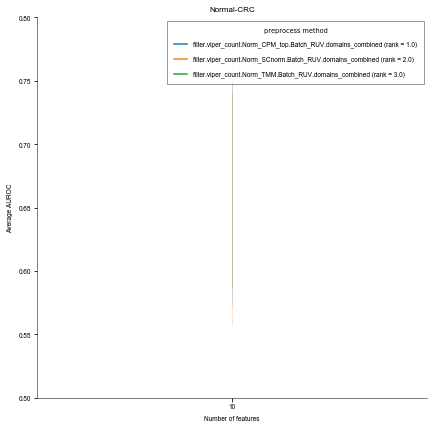

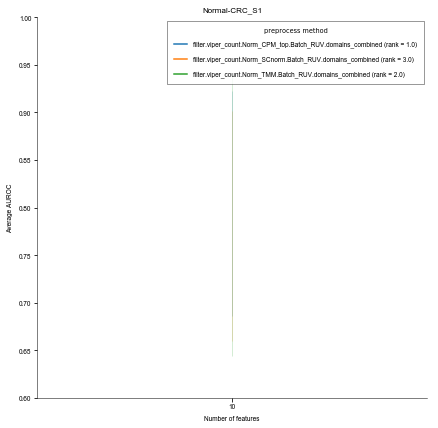

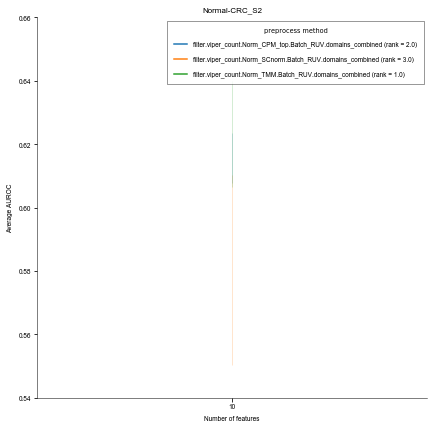

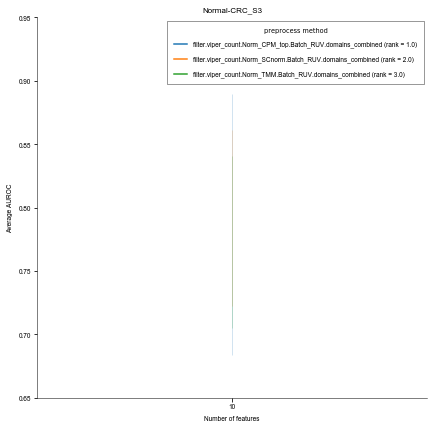

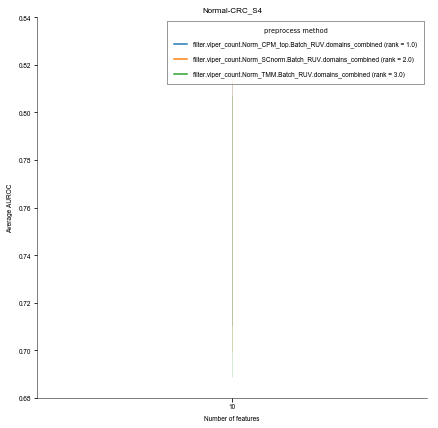

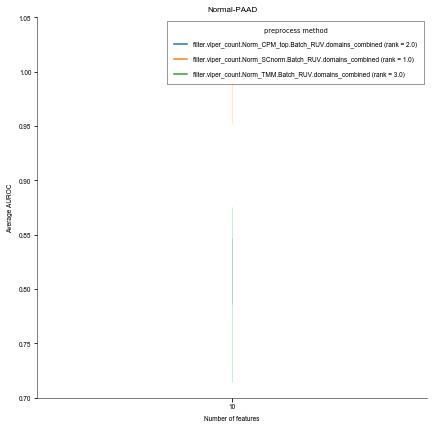

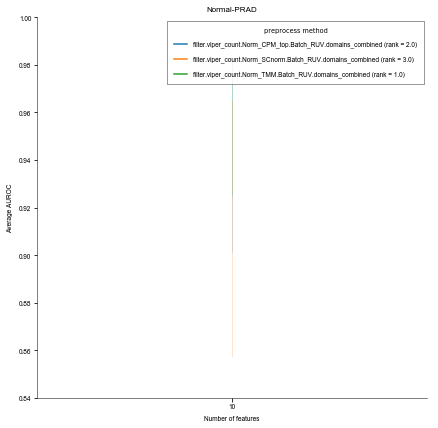

In [14]:
def compare_preprocess_methods(output_dir, preselected_methods_dir, savepath=savepath,title=None,savefig=True):
    records = []
    pbar = tqdm(unit='directory')
    for preprocess_method in preselected_methods_dir:#os.listdir(output_dir):#
        if preprocess_method.split('.')[-1] ==exp_mx_name:
            #print (preprocess_method)
            for compare_group in os.listdir(os.path.join(output_dir, preprocess_method)):
                for feature_selection_method in os.listdir(os.path.join(output_dir, preprocess_method, compare_group)):
                    #print (os.listdir(os.path.join(output_dir)),feature_selection_method)
                    if feature_selection_method.split('.')[0] ==classifier_use:
                        classifier, n_select, select_method,value_change  = feature_selection_method.split('.')
                        record = {
                            'compare_group': compare_group,
                            'classifier': classifier,
                            'n_features': n_select,
                            'preprocess_method': preprocess_method,
                            'value_change': value_change
                        }
                        try:
                            metrics = pd.read_table(os.path.join(output_dir,
                                preprocess_method, compare_group, feature_selection_method,
                                'metrics.test.txt'))
                        except:
                            continue
                        record['test_roc_auc_mean'] = metrics['roc_auc'].mean()
                        pbar.update(1)
                        records.append(record)
    pbar.close()
    #print (records)
    records = pd.DataFrame.from_records(records)
    #display(records)
    records['n_features'] = records.loc[:, 'n_features'].astype(np.int32)
    
    best_preprocess_methods = {}
    for compare_group, sub_df in records.groupby('compare_group'):
        pivot = sub_df.pivot_table(
            index='preprocess_method', columns='n_features', values='test_roc_auc_mean')
        #print(pivot.iloc[:, 0])
        #print(np.argsort(np.argsort(pivot.values, axis=0), axis=0)[:, 0])
        mean_ranks = np.mean(pivot.shape[0] - np.argsort(np.argsort(pivot.values, axis=0), axis=0), axis=1)
        mean_ranks = pd.Series(mean_ranks, index=pivot.index.values)
        mean_ranks = mean_ranks.sort_values()
        rename_index = ['{} (rank = {:.1f})'.format(name, value) for name, value in zip(mean_ranks.index, mean_ranks.values)]
        rename_index = pd.Series(rename_index, index=mean_ranks.index.values)
        sub_df = sub_df.copy()
        sub_df['preprocess_method'] = rename_index[sub_df['preprocess_method'].values].values
        sub_df['n_features'] = sub_df['n_features'].astype('int')
        sub_df = sub_df.sort_values(['preprocess_method', 'n_features'], ascending=True)
        sub_df['n_features'] = sub_df['n_features'].astype('str')
        fig, ax = plt.subplots(figsize=(7, 7))
        
        '''
        for preprocess_method in rename_index.values:
            tmp_df = sub_df[sub_df['preprocess_method'] == preprocess_method]
            ax.plot(np.arange(tmp_df.shape[0]) + 1, tmp_df['test_roc_auc_mean'], label=preprocess_method,linewidth=5)

            ax.set_xticks(np.arange(tmp_df.shape[0]) + 1)
            ax.set_xticklabels(tmp_df['n_features'])
        '''
        #display(sub_df.iloc[np.isin(sub_df['preprocess_method'],rename_index.values)])
        tmpdf = sub_df.iloc[np.isin(sub_df['preprocess_method'],rename_index.values)]
        #tmpdf.n_features = pd.to_numeric(tmpdf.n_features)
        #tmpdf = tmpdf.sort_values(by=['n_features'], ascending=True)
        #tmpdf.n_features = tmpdf.n_features.astype('str')
        
        sns.lineplot(ax=ax,data=tmpdf,sort=False,
                     x='n_features',y = 'test_roc_auc_mean',hue='preprocess_method',linewidth=3,
                     )
        #ax.set_ylim(0.5, 1)

        #ax.set_yticklabels(np.arange(5,11)/10,fontticklabel)
        #ax.set_xticklabels(np.concatenate((np.arange(1,10),np.arange(10,60,10))).astype('str'),fontticklabel)

        ax = std_plot(ax,'Number of features','Average AUROC',title=compare_group,legendtitle='preprocess method',
                      sns=True,legendsort=False,
                      labelspacing=1.2,borderpad=1,handletextpad=1)
        #best_preprocess_methods[compare_group] = sub_df.iloc[0]['preprocess_method']
        best_preprocess_methods[compare_group] = mean_ranks.index[0]
        if savefig:
            fig.savefig(savepath+'AUC_matrix_processing'+compare_group+'.eps', bbox_inches='tight')
        #print (best_preprocess_methods)
        
    return best_preprocess_methods

best_preprocess_methods = compare_preprocess_methods('output/'+dataset+'/cross_validation',preselected_methods_dir)

In [15]:
best_preprocess_methods

{'Normal-CRC': 'filter.viper_count.Norm_CPM_top.Batch_RUV.domains_combined',
 'Normal-CRC_S1': 'filter.viper_count.Norm_CPM_top.Batch_RUV.domains_combined',
 'Normal-CRC_S2': 'filter.viper_count.Norm_TMM.Batch_RUV.domains_combined',
 'Normal-CRC_S3': 'filter.viper_count.Norm_CPM_top.Batch_RUV.domains_combined',
 'Normal-CRC_S4': 'filter.viper_count.Norm_CPM_top.Batch_RUV.domains_combined',
 'Normal-PAAD': 'filter.viper_count.Norm_SCnorm.Batch_RUV.domains_combined',
 'Normal-PRAD': 'filter.viper_count.Norm_TMM.Batch_RUV.domains_combined'}

## Compare Features: AUC line plot

In [16]:
cpm_table_origin_ = pd.read_table('output/'+dataset+'/matrix_processing/filter.'+exp_mx_name+'.txt')
cpm_table_origin =  cpm_table_origin_/cpm_table_origin_.sum(axis=0)*10e6
length_tmp = np.array([cpm_table_origin.index[i].split('|')[-1] for i in range(cpm_table_origin.index.shape[0])]).astype('int')-\
np.array([cpm_table_origin.index[i].split('|')[-2] for i in range(cpm_table_origin.index.shape[0])]).astype('int')
rpkm_table_origin = (cpm_table_origin_.T/length_tmp*1000).T


def calculate_fc(table,original_index,sample_class, class_compare,cpm_table_origin):
    samples_use = np.array(sample_class.index)[np.isin(sample_class.label,class_compare)]
    sample_class_use = sample_class.iloc[np.isin(sample_class.label,class_compare)]
    sample_class_1_use = sample_class_use.iloc[np.where(sample_class_use.label ==class_compare[0])]
    sample_class_2_use = sample_class_use.iloc[np.where(sample_class_use.label ==class_compare[1])]
    table_selected = table.loc[original_index]
    length = np.array([original_index[i].split('|')[-1] for i in range(original_index.shape[0])]).astype('int')-\
np.array([original_index[i].split('|')[-2] for i in range(original_index.shape[0])]).astype('int')
    #print (length)
    rpkmtable = (table_selected.T/length).T*1000
    #display(rpkmtable)
    #display(table_selected)
    rpkmtable_ = pd.concat((rpkmtable.loc[original_index,sample_class_1_use.index],
               rpkmtable.loc[original_index,sample_class_2_use.index]),axis=1)
    cpmtable_ = pd.concat((cpm_table_origin.loc[original_index,sample_class_1_use.index],
               cpm_table_origin.loc[original_index,sample_class_2_use.index]),axis=1)
    return np.mean(np.log2(rpkmtable.loc[:,sample_class_1_use.index]+0.001),axis=1) -\
np.mean(np.log2(rpkmtable.loc[:,sample_class_2_use.index]+0.001),axis=1),rpkmtable_,cpmtable_
def compare_features(path,sample_class,class_compare,compare_group,savepath=savepath,save_table=True):
    pbar = tqdm(unit='directory')
    feature_lists = {}
    for feature_selection_method in os.listdir(path):
        classifier, n_features, select_method,value_change  = feature_selection_method.split('.')
        if classifier==classifier_use:
            n_features = int(n_features)
            if n_features > 10:
                continue
            # feature importance
            feature_lists[n_features] = pd.read_table(os.path.join(path,
                feature_selection_method, 'feature_importances.txt'), header=None, index_col=0).iloc[:, 0]
            feature_lists[n_features].index = feature_lists[n_features].index.astype('str')
            pbar.update(1)
    # feature union set
    feature_set = reduce(np.union1d, [a.index.values for a in feature_lists.values()])
    # build feature importance matrix
    feature_matrix = pd.DataFrame(np.zeros((len(feature_set), len(feature_lists))),
                                  index=feature_set, columns=list(feature_lists.keys()))
    for n_features, feature_importance in feature_lists.items():
        feature_matrix.loc[feature_importance.index.values, n_features] = feature_importance.values
    feature_matrix.columns = feature_matrix.columns.astype('int')
    feature_matrix.index = feature_matrix.index.astype('str')
    
    feature_matrix = feature_matrix.loc[:, feature_matrix.columns.sort_values().values]
    original_index = feature_matrix.index
    feature_info = feature_matrix.index.to_series().str.split('|', expand=True)
    feature_info.columns = ['gene_id', 'gene_type', 'gene_name', 'feature_id', 'transcript_id', 'start', 'end']

    feature_matrix.index = feature_info.loc[:, 'gene_name'].values \
        + '|' + feature_info.loc[:, 'gene_type'].values \
        + '|' + feature_info.loc[:, 'gene_id'].values \
    
    # build feature indicator matrix
    feature_indicator_matrix = pd.DataFrame(np.zeros((len(feature_set), len(feature_lists))),
                                  index=feature_set, columns=list(feature_lists.keys()))
    for n_features, feature_importance in feature_lists.items():
        feature_indicator_matrix.loc[feature_importance.index.values, n_features] = 1
    feature_indicator_matrix.columns = feature_indicator_matrix.columns.astype('int')
    feature_indicator_matrix = feature_indicator_matrix.loc[:, feature_indicator_matrix.columns.sort_values().values]
    
    feature_indicator_matrix.index = feature_info.loc[:, 'gene_name'].values \
        + '|' + feature_info.loc[:, 'gene_type'].values \
        + '|' + feature_info.loc[:, 'gene_id'].values
    #fig, ax = plt.subplots(figsize=(6, 8))
    #sns.heatmap(feature_indicator_matrix,
    #            cmap=sns.light_palette('green', as_cmap=True), cbar=False, ax=ax, linewidth=1)
    #ax.set_xlabel('Number of features')
    #ax.set_ylabel('Features')
    foldchange,rpkmtable,cpmtable = calculate_fc(processed_matrix, original_index,sample_class,class_compare,cpm_table_origin)
    foldchange.index = feature_matrix.index
    feature_matrix = pd.concat((feature_matrix,foldchange),axis=1)
    #display(feature_matrix) 
    if feature_matrix.shape[1]==2:
        feature_matrix.columns = np.concatenate((np.array([10]).astype('str'),np.array(['fold change'])))
    else:
        feature_matrix.columns = np.concatenate((np.arange(1,11).astype('str'),np.array(['fold change'])))
    #display (feature_matrix)
    feature_matrix.index = feature_info.loc[:, 'gene_name'].values \
        + '|' + feature_info.loc[:, 'gene_type'].values \
    + '|' + feature_info.loc[:, 'feature_id'].values \
        + '|' + feature_info.loc[:, 'transcript_id'].values
    #display (feature_matrix)
    display(feature_matrix.style\
        .background_gradient(cmap=sns.light_palette('green', as_cmap=True))\
        .set_precision(2)\
        .set_caption(path))
    pbar.close()
    if save_table:
        feature_matrix.to_csv(savepath+compare_group+'_feature_table.txt',sep='\t')
    return feature_matrix,feature_indicator_matrix,original_index,foldchange,rpkmtable,cpmtable


In [17]:
def scale(axis,table):
    '''
    axis: 0(by sample)/1(by feature)/2(both 0 and 1)
    '''
    scaler = StandardScaler()
    arr = np.array(table)
    if axis==0:
        return scaler.fit_transform(arr)
    elif axis==1:
        return scaler.fit_transform(arr.T).T
    elif axis==2:
        return scaler.fit_transform(scaler.fit_transform(arr).T).T
def clustermap(processed_matrix,featurename,sample_class, class_compare,compare_group,savepath=savepath,savefig=True):
    samples_use = np.array(sample_class.index)[np.isin(sample_class.label,class_compare)]
    #samples_use = np.loadtxt(output_feature_selection_path+'{}/{}'.format(preprocess_method,compare_group)+)
    #display(sample_class.loc[samples_use])
    sample_class_use = sample_class.loc[samples_use].iloc[np.isin(sample_class.loc[samples_use].label,class_compare)]
    cpm_table = processed_matrix
    cpm_table_use = cpm_table.loc[featurename,samples_use]
    #display(cpm_table_use)
    cpm_matrix= np.log2(np.array(cpm_table_use)+0.001)
    cpm_table_use.iloc[:,:] = RobustScaler().fit_transform(cpm_matrix.T).T
    rgblabel = np.repeat('r',samples_use.shape[0])
    rgblabel[np.where(sample_class_use.label==class_compare[-1])] = 'b'
    cpm_table_use.index = np.array([cpm_table_use.index[i].split('|')[2]+'|'+cpm_table_use.index[i].split('|')[1] for i in range(cpm_table_use.index.shape[0]) ])
    sns_plot = sns.clustermap(cpm_table_use,cmap='vlag',figsize=(70,20),col_colors=rgblabel)
    if savefig:
        sns_plot.savefig(savepath+compare_group+'_clustermap.eps', bbox_inches='tight')
    
   
    return cpm_table_use,sample_class_use

HBox(children=(IntProgress(value=0, max=7), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

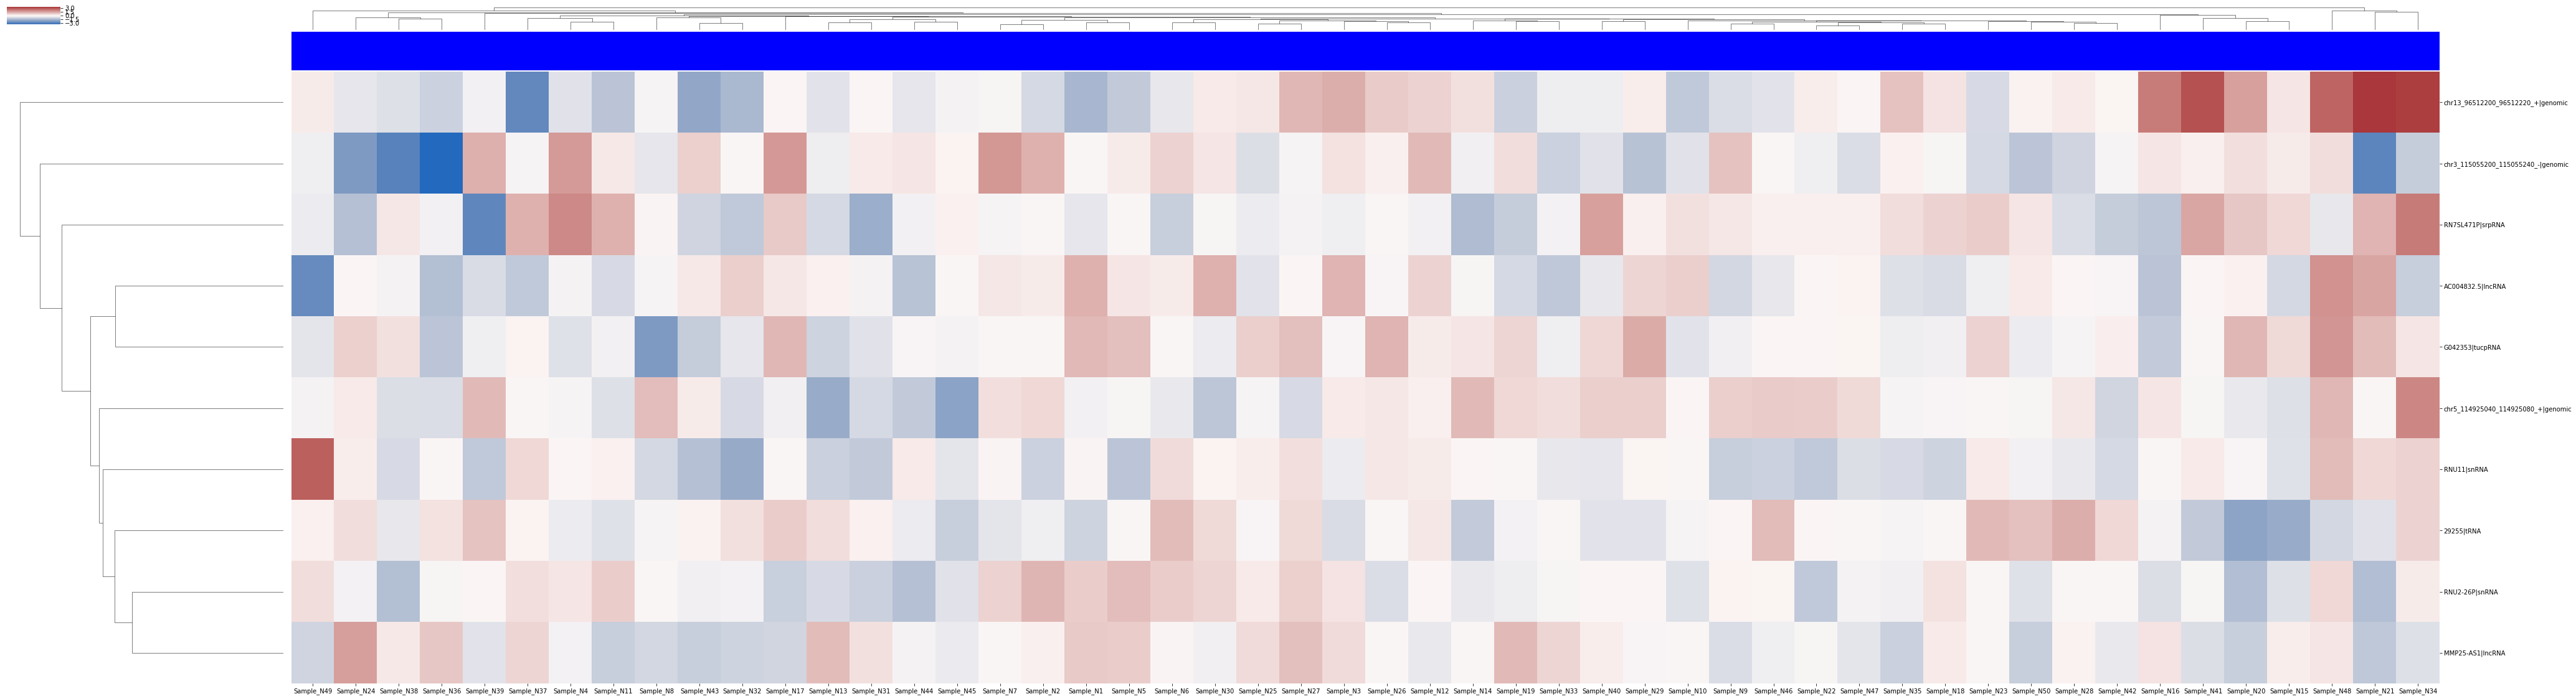

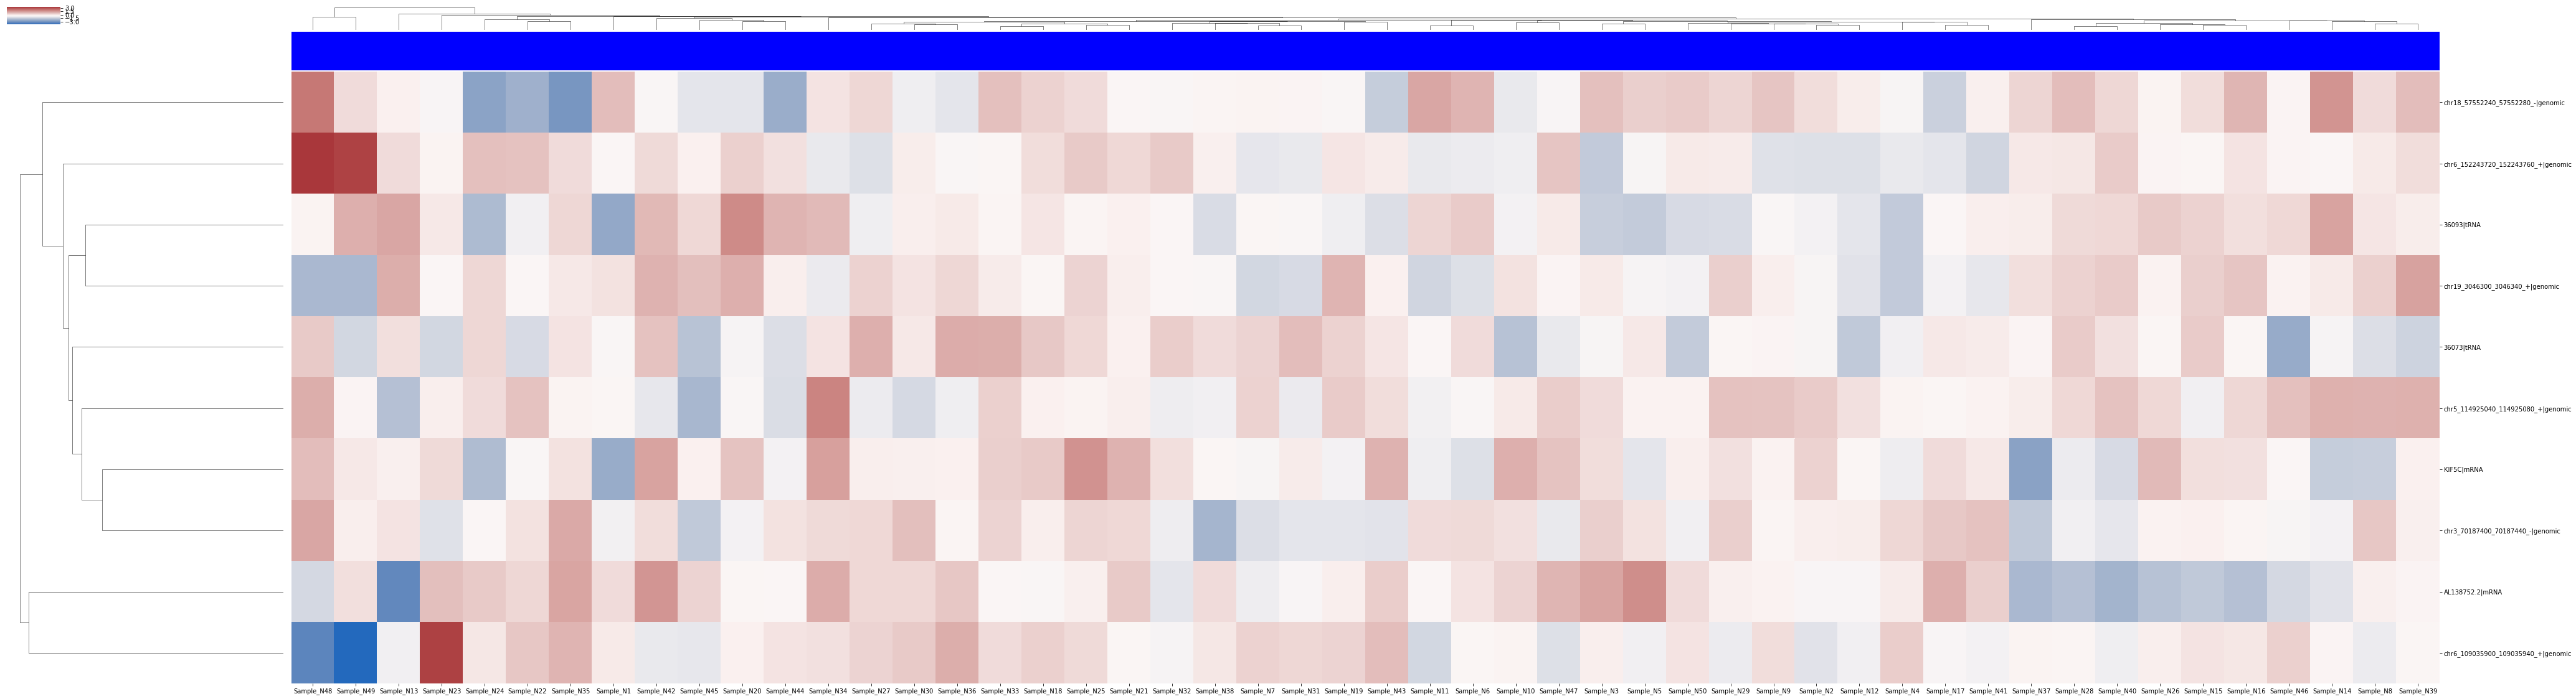

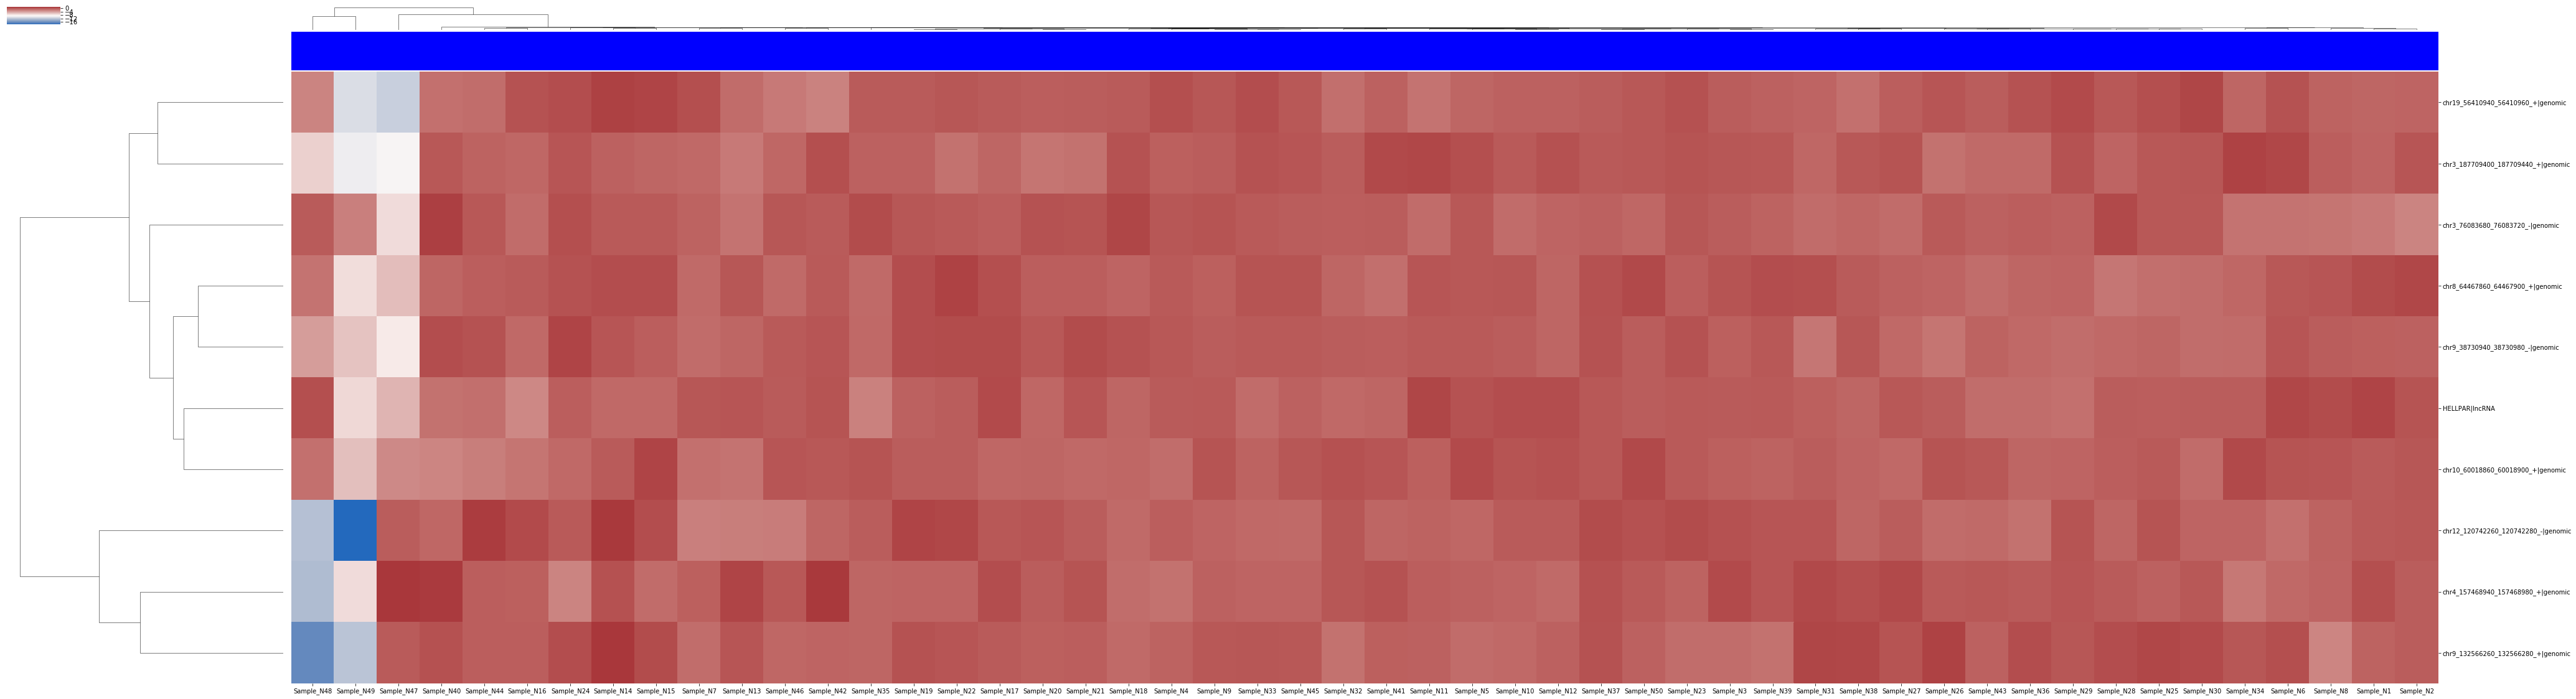

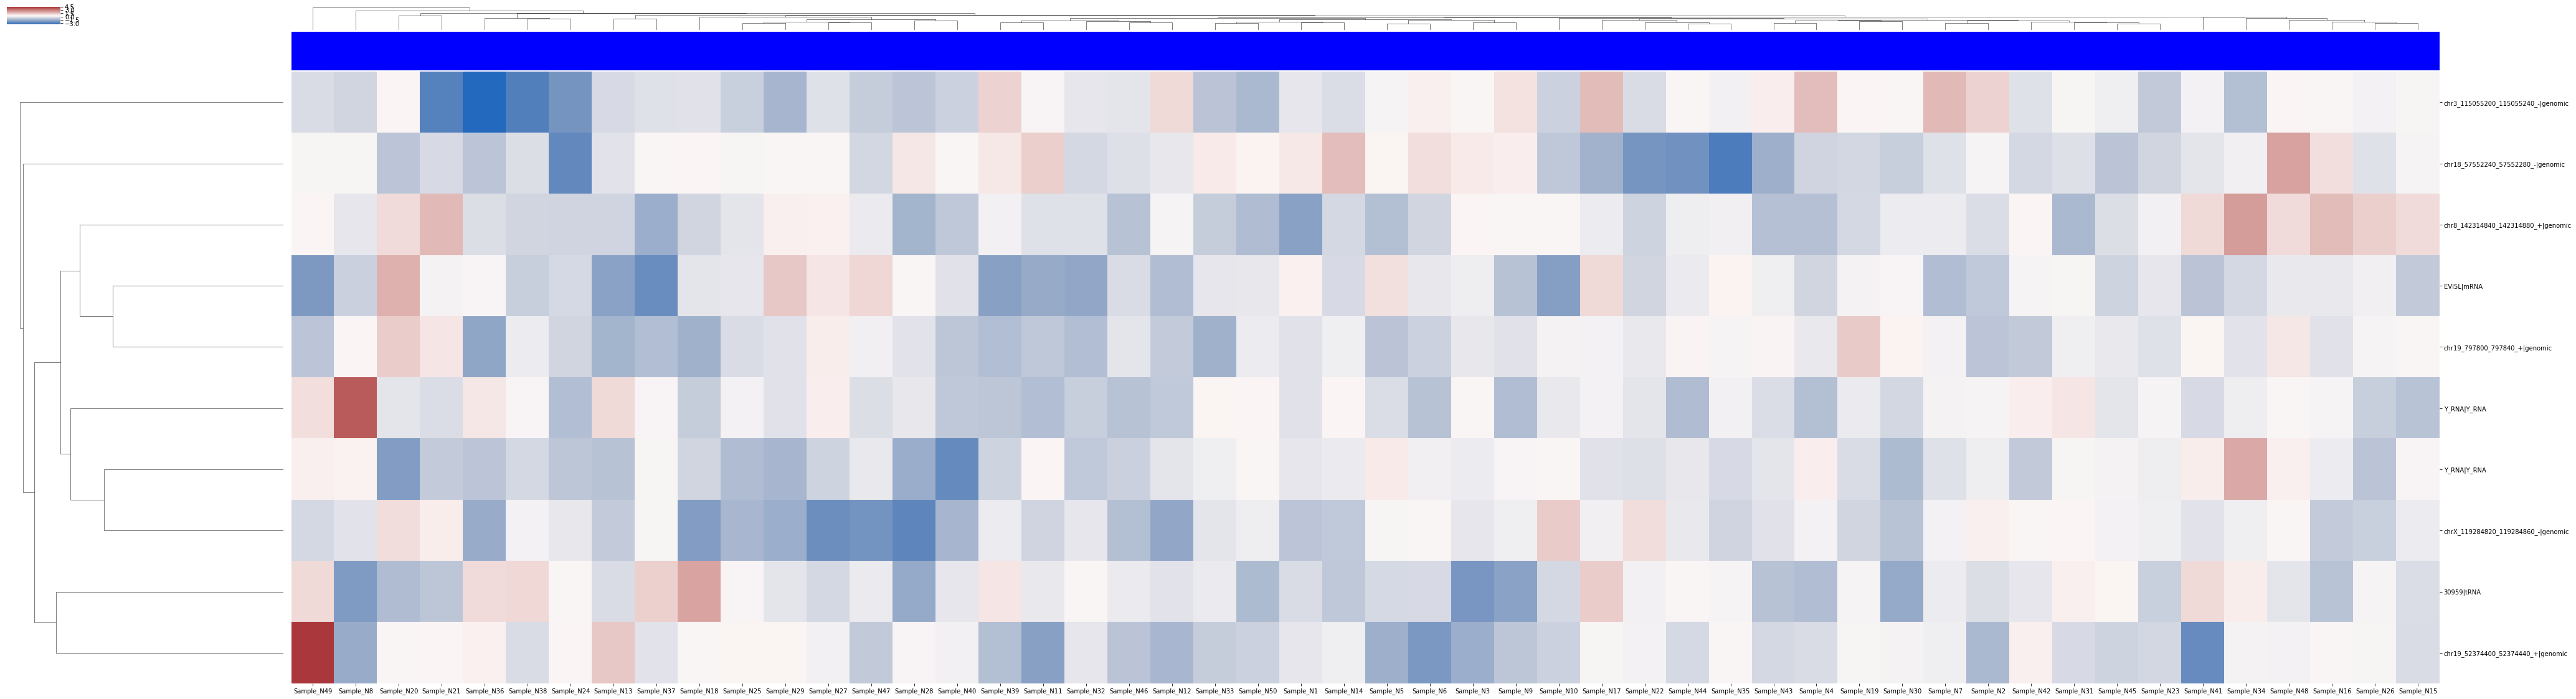

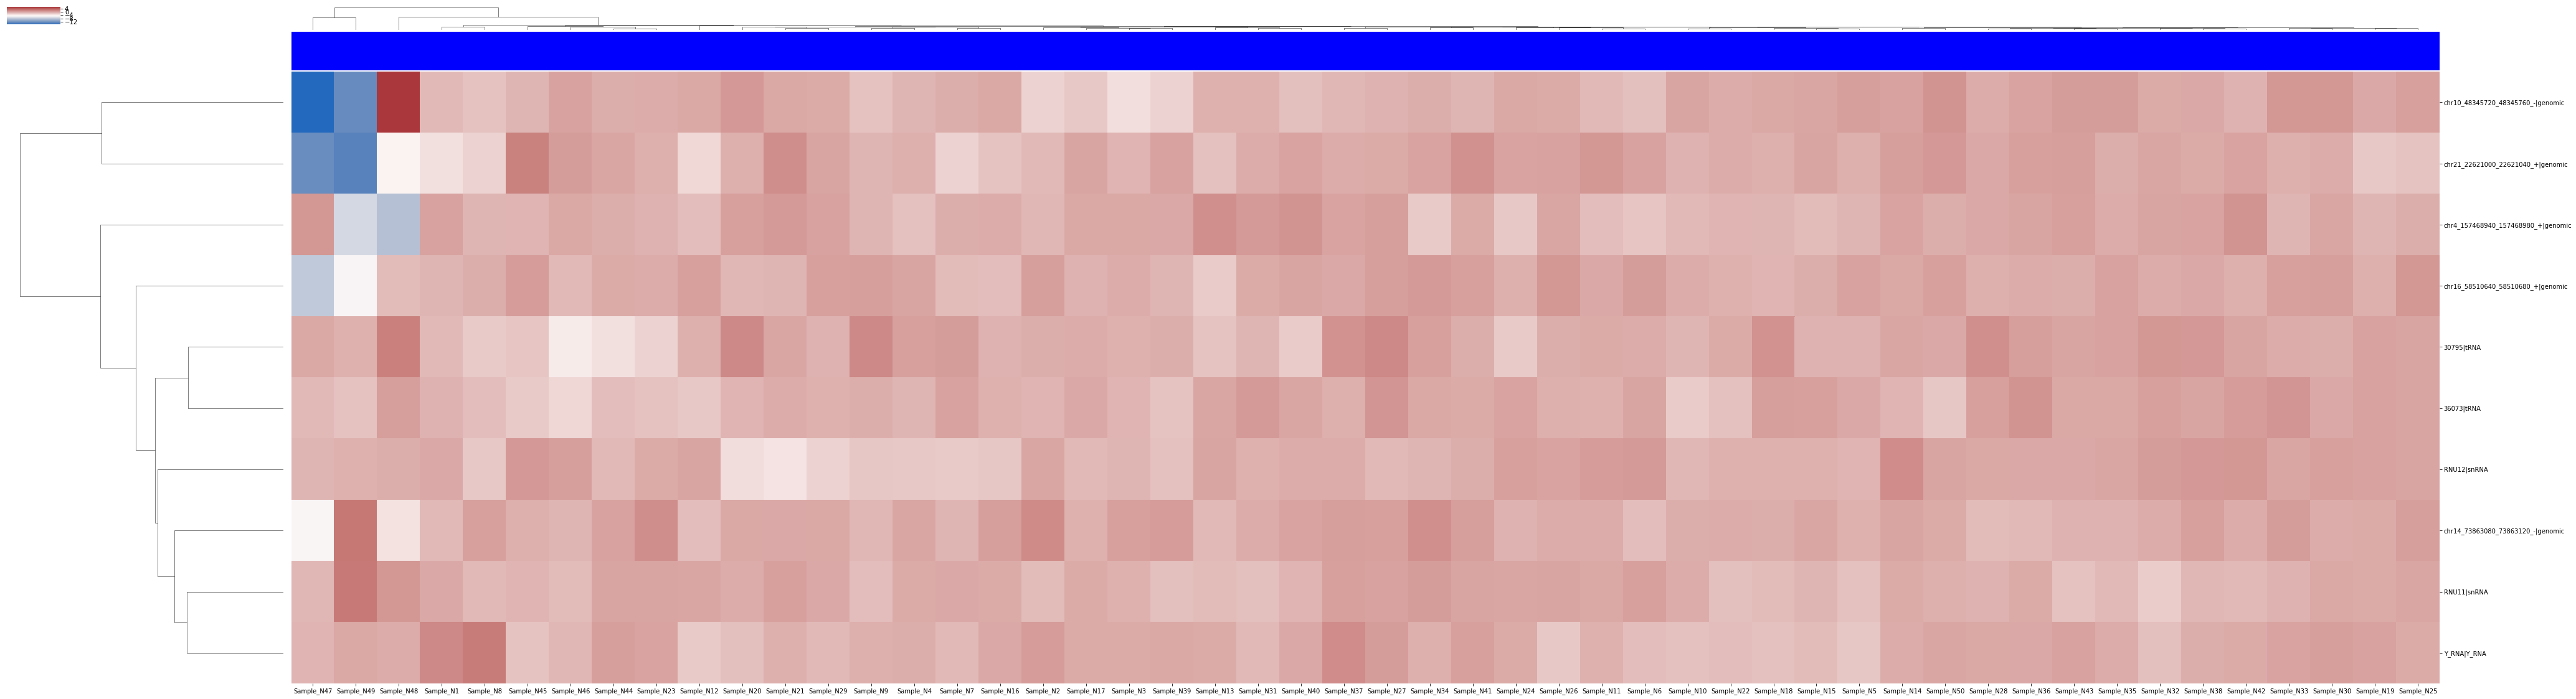

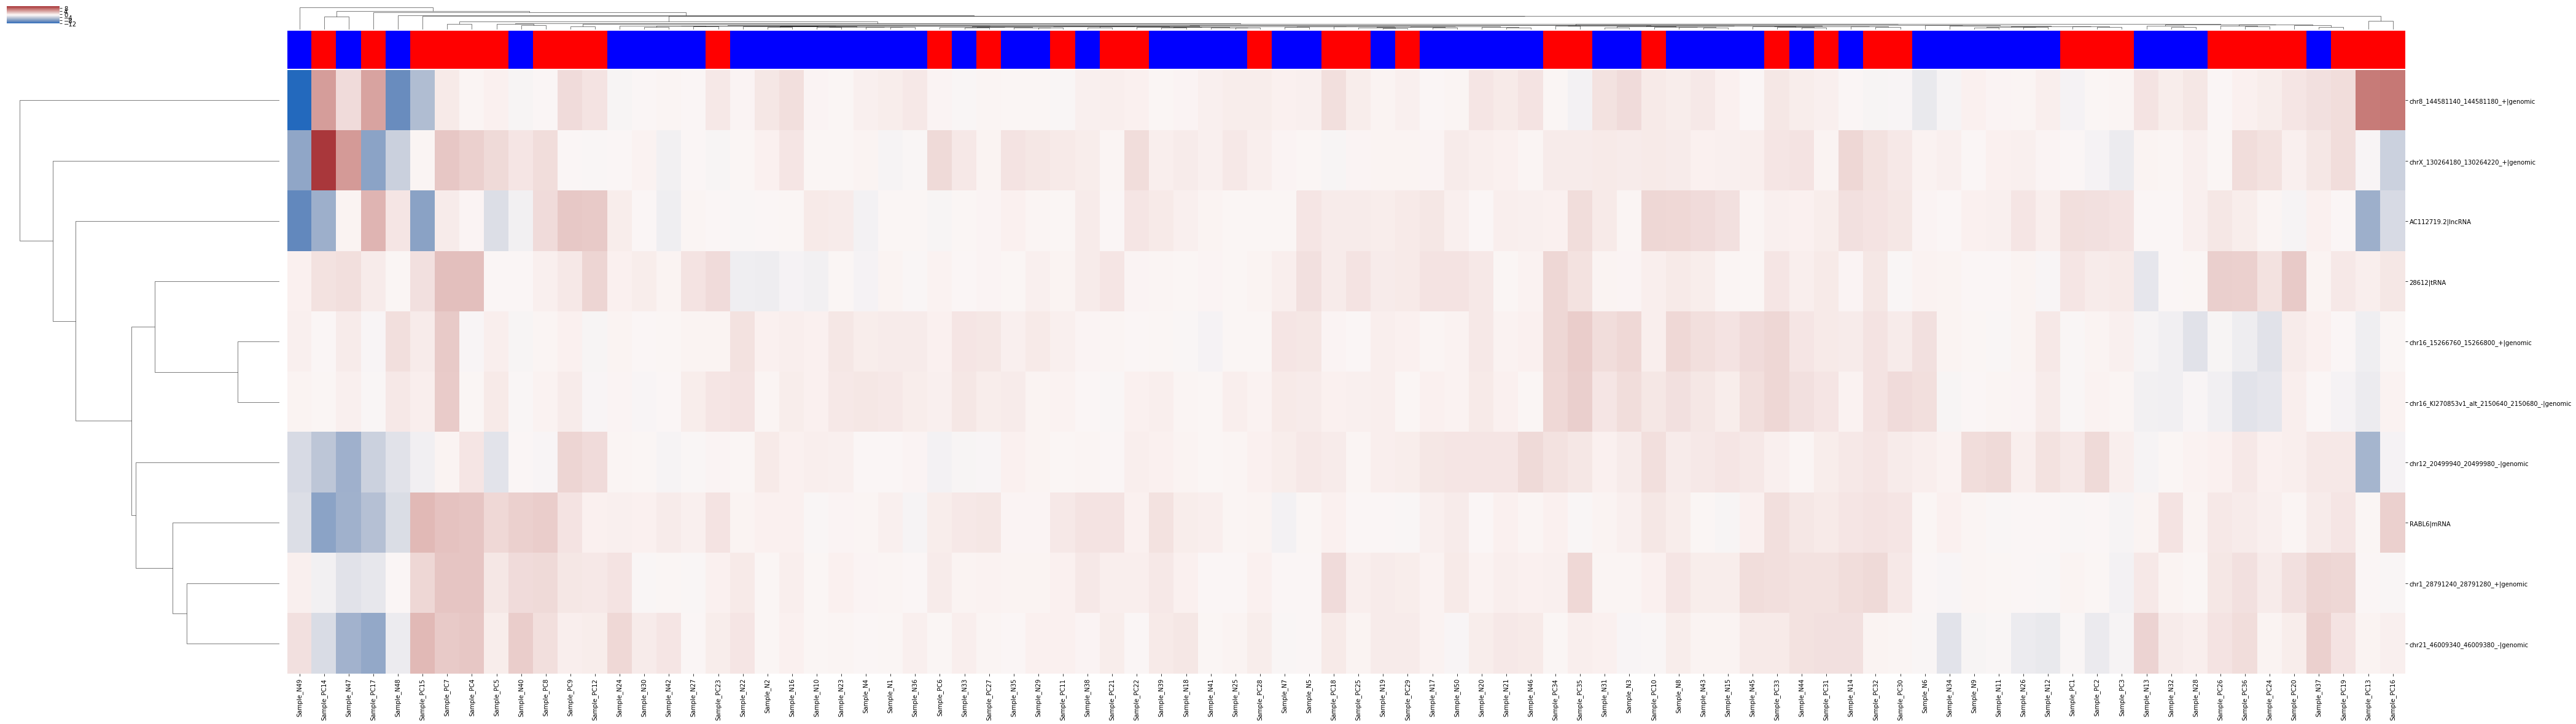

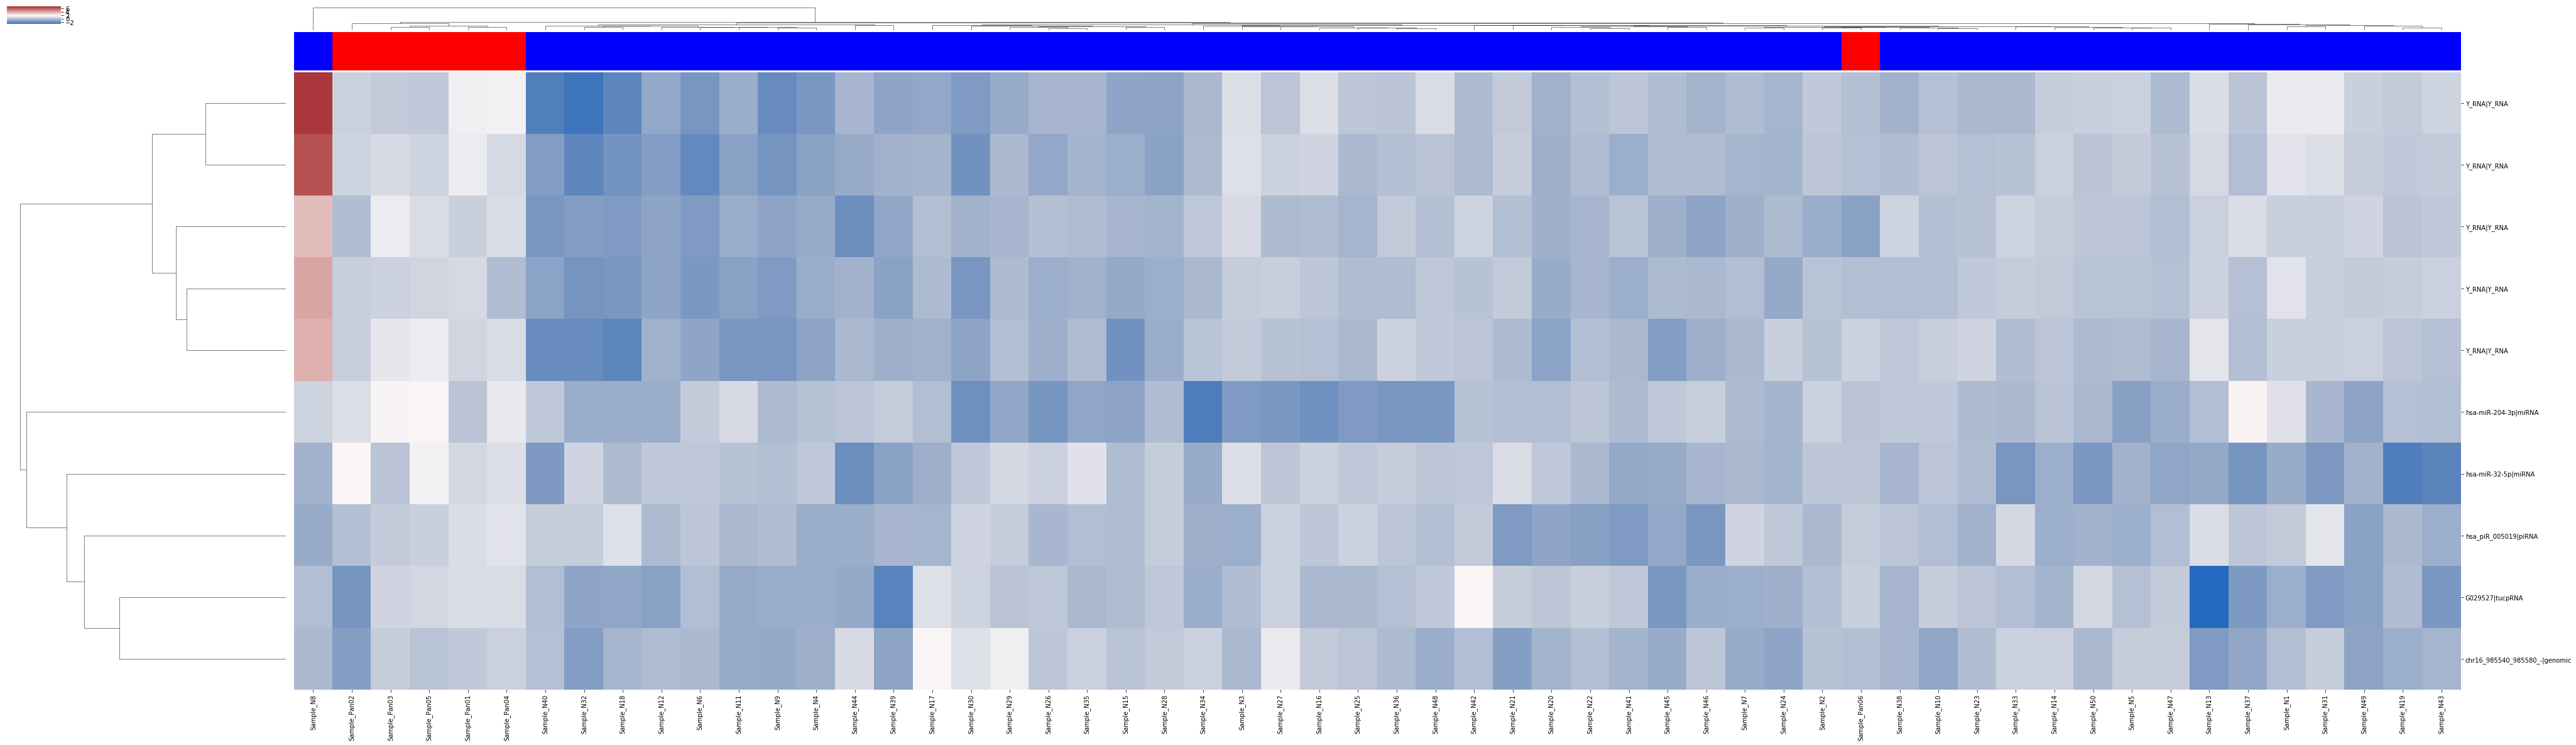

In [18]:
output_feature_selection_path = 'output/'+dataset+'/cross_validation/'
feature_matrix,feature_indicator_matrix,original_index,foldchange,rpkmtable,cpm_table_use,sample_class_use,cpmtable = {},{},{},{},{},{},{},{}
for compare_group, preprocess_method in tqdm(best_preprocess_methods.items()):
    class_info = 'data/'+dataset+'/sample_classes.txt'
    if dataset =='scirep':
        if compare_group=='Normal-CRC':
            class_compare = np.array(['Colorectal Cancer', 'Healthy Control']) 
        elif compare_group=='Normal-PAAD':
            class_compare = np.array(['Prostate Cancer', 'Healthy Control']) 
        elif compare_group=='Normal-PRAD':
            class_compare = np.array(['Pancreatic Cancer', 'Healthy Control']) 
    elif dataset =='lulab_hcc':
        if compare_group=='Normal-HCC':
            class_info = 'data_old/labels/sample_classes_hcc.txt'
        if compare_group=='Normal-HCC':
            class_compare = np.array(['HCC', 'Normal']) 
        elif compare_group=='Normal-stage_A':
            class_compare = np.array(['stage_A', 'Normal']) 
    elif dataset =='exorbase':
        if compare_group=='Normal-HCC':
            class_compare = np.array(['HCC', 'Healthy']) 
        elif compare_group=='Normal-CRC':
            class_compare = np.array(['CRC', 'Healthy']) 
        elif compare_group=='Normal-PAAD':
            class_compare = np.array(['PAAD', 'Healthy']) 
    sample_class = pd.read_table(class_info,sep='\t',index_col=0)
    processed_matrix = pd.read_table('output/'+dataset+'/matrix_processing/'+preprocess_method+'.txt',sep='\t',index_col=0)
    feature_matrix[compare_group],feature_indicator_matrix[compare_group],\
    original_index[compare_group],foldchange[compare_group],rpkmtable[compare_group],cpmtable[compare_group] = compare_features(output_feature_selection_path+'{}/{}'.format(preprocess_method,compare_group),sample_class,class_compare,compare_group)
    features =  feature_matrix[compare_group].index
    cpm_table_use[compare_group],sample_class_use[compare_group] =  clustermap(processed_matrix,original_index[compare_group],sample_class,class_compare,compare_group)
    

## bar plot of feature importance

In [ ]:
def feature_weight_bar_(feature_weight_table,detable,nums_retain=10,rpkmtable=rpkmtable,
                        original_index=original_index, savepath=savepath,savefig=True,
                        compare_group=compare_group,scalefactor=0.1,area_=(8.0,9.0),namelength=2):
    feature_weight_table = pd.concat(( feature_weight_table,(feature_weight_table.iloc[:,:-1] !=0).sum(axis=1)),axis=1)
    #display(feature_weight_table)
    if feature_weight_table.shape[1] >=nums_retain:
        selected_table = feature_weight_table.iloc[:,nums_retain-1:]
    else:
        selected_table = feature_weight_table
    #display(selected_table,rpkmtable)
    rpkm = np.array(rpkmtable.iloc[np.where(selected_table.iloc[:,0]!=0)].mean(axis=1))
    selected_feature = original_index[np.where(selected_table.iloc[:,0]!=0)]
    #print (selected_feature)
    #display(rpkmtable.iloc[np.where(selected_table.iloc[:,0]!=0)].mean(axis=1))
    
    #print (selected_feature.shape[0])
    nums_retain = min(selected_feature.shape[0],nums_retain)
    
    selected_table = selected_table.iloc[np.where(selected_table.iloc[:,0]!=0)]
    #display(selected_table)
    featurename = np.array(selected_table.index)#np.array([selected_table.index[i].split('|')[0] for  i in range(selected_table.shape[0])])
    
    #print (featurename)
    
    #feature_weight = np.array(feature_weight_table.sum(axis=1))
    feature_weight = np.array(selected_table.iloc[:,0])
    fc = np.array(selected_table.iloc[:,1])
    fc = fc[np.argsort(feature_weight)]
    recurrence = np.array(selected_table.iloc[:,2])
    recurrence = recurrence[np.argsort(-feature_weight)]
    #rpkm = np.array(rpkmtable.mean(axis=1))
    rpkm = rpkm[np.argsort(feature_weight)]
    deselected = -np.log10(detable.loc[selected_feature].iloc[np.argsort(feature_weight)].padj)
    #print (deselected)
    featurename = featurename[np.argsort(feature_weight)]
    #display(selected_table,featurename,rpkm)
    selected_feature = selected_feature[np.argsort(feature_weight)]
    feature_weight = np.sort(feature_weight)
    if namelength == 2:
        featurename = np.array([featurename[i].split('|')[0]+'|'+featurename[i].split('|')[1] for i in range(len(featurename))])
    if namelength == 3:
        featurename = np.array([featurename[i].split('|')[0]+'|'+featurename[i].split('|')[1]+'|'+featurename[i].split('|')[2] for i in range(len(featurename))])

    dataframe= pd.DataFrame(np.concatenate((featurename.reshape(-1,1),feature_weight.reshape(-1,1)),axis=1),columns=['name','weight'])
    #display(dataframe)
    dataframe.weight  =  pd.to_numeric(dataframe.weight)
    dataframe_= pd.DataFrame(np.concatenate((featurename.reshape(-1,1),fc.reshape(-1,1)),axis=1),columns=['name','fc'])
    dataframe_.fc  =  pd.to_numeric(dataframe_.fc)
    #dataframe__= pd.DataFrame(np.concatenate((featurename.reshape(-1,1),recurrence.reshape(-1,1)),axis=1),columns=['name','recurrence'])
    #dataframe__.recurrence  =  pd.to_numeric(dataframe__.recurrence)
    dataframe_rpkm= pd.DataFrame(np.concatenate((featurename.reshape(-1,1),np.log2(rpkm).reshape(-1,1)),axis=1),columns=['name','rpkm'])
    dataframe_rpkm.rpkm  =  pd.to_numeric(dataframe_rpkm.rpkm)
    dataframe_de= pd.DataFrame(np.concatenate((featurename.reshape(-1,1),deselected.reshape(-1,1)),axis=1),columns=['name','DE_padj'])
    dataframe_de.DE_padj  =  pd.to_numeric(dataframe_de.DE_padj)
    #display(dataframe_rpkm)
    
    #display(dataframe_)
    dataframe = dataframe.iloc[::-1]
    dataframe_rpkm = dataframe_rpkm.iloc[::-1]
    #display(selected_table,dataframe,dataframe_rpkm,dataframe_de)
    #dataframe_de =  dataframe_de.iloc[::-1]
    #display(dataframe_de)
    fig, (ax_,ax, ax1,ax2) = plt.subplots(1,4, figsize=(7,4),gridspec_kw = {'width_ratios':[2,2, 1,1]})
    ax_.axis('off')
    #scalefactor=0.1
    #print (dataframe_rpkm.shape)
    print (recurrence)
    #cmaps = sns.cubehelix_palette(10, start=0.1,rot=-0.2)
    #ax.scatter(dataframe.weight, np.arange(nums_retain),
     #           c = np.array(sns.cubehelix_palette(10, start=0.1,rot=-0.2))[recurrence-1], s=(dataframe_rpkm.rpkm)*scalefactor)
    #cmap = plt.get_cmap("viridis")
    
    #display(dataframe,dataframe_rpkm,np.log2(rpkmtable.iloc[np.where(selected_table.iloc[:,0]!=0)].mean(axis=1)))
    
    if feature_weight_table.shape[1] >=nums_retain:
        cmap = plt.cm.BuGn#"viridis"
        # extract all colors from the .jet map
        cmaplist = [cmap(i) for i in range(cmap.N)]
        # force the first color entry to be grey
        cmaplist[0] = (.5,.5,.5,1.0)
        # create the new map
        cmaps = cmap.from_list('Custom cmap', cmaplist, cmap.N)
        # define the bins and normalize
        bounds = np.linspace(0,recurrence.max(),recurrence.max()+1)
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
        im = ax.scatter(dataframe.weight, np.arange(nums_retain),cmap=cmaps,norm=norm,
            c = recurrence-1, s=(((dataframe_rpkm.rpkm)/area_[0]-0.5)*area_[1])**2.5)
        cbar =fig.colorbar(im, ax=ax)#,drawedges=True
        cbar.outline.set_visible(False)
    else:
        im = ax.scatter(dataframe.weight, np.arange(nums_retain),
            s=(((dataframe_rpkm.rpkm)/area_[0]-0.5)*area_[1])**2.5)
    
    #display(dataframe.weight,np.arange(nums_retain),dataframe_rpkm.rpkm)
    
    #cbar.set_label('Feature Recurrency',weight='bold')
    #ax.set_xlabel("weight",fontsize=30,fontdict=dict(weight='bold'))
    #ax.set_ylabel("name",fontsize=30,fontdict=dict(weight='bold'))
    ax.set_yticks(np.arange(10))
    ax.set_yticklabels(featurename[::-1])
    if sequencing_type =='short':
        mattype = 'Log CPM'
    elif sequencing_type =='long':
        mattype = 'Log RPKM'
    #make a legend:
   # pws = np.round(np.array([np.min(dataframe_rpkm.rpkm),np.percentile(dataframe_rpkm.rpkm,0.2),
   #                np.percentile(dataframe_rpkm.rpkm,0.4),np.percentile(dataframe_rpkm.rpkm,0.6),
   #                np.percentile(dataframe_rpkm.rpkm,0.8),np.max(dataframe_rpkm.rpkm)]),2)
    interval = np.max(dataframe_rpkm.rpkm) - np.min(dataframe_rpkm.rpkm)
    ratiointer = interval/4
    #pws = np.round(np.arange(np.min(dataframe_rpkm.rpkm),np.max(dataframe_rpkm.rpkm)+ratiointer,ratiointer),0).astype(int)
    pws = set(np.round(np.arange(np.min(dataframe_rpkm.rpkm),np.max(dataframe_rpkm.rpkm)+ratiointer,ratiointer),0).astype(int))
    for pw in pws:
        ax.scatter([], [], s=((pw/area_[0]-0.5)*area_[1])**2, c="k",label=str(pw))
        
    #h,l = ax.get_legend_handles_labels()
    
    #ax.set_yticklabels(np.arange(5,11)/10,fontticklabel)
    #ax.set_xticklabels(np.concatenate((np.arange(1,10),np.arange(10,60,10))).astype('str'),fontticklabel)
    
    #mpl.rcParams['title_fontsize']=6
    #ax.legend(h[1:], l[1:], labelspacing=2, title=mattype, borderpad=1,  fontsize=20,
    #            frameon=True, framealpha=0.6, edgecolor="k", facecolor="w",prop={'size':25,'weight':'bold'})
    sns.barplot(ax=ax1,data=dataframe_,y='name',x='fc',color='g',saturation=1)
    sns.barplot(ax=ax2,data=dataframe_de,y='name',x='DE_padj',color='r',saturation=1)

    #ax = std_plot(ax,'Feature Weight','Feature Name',None,'log CPM',borderpad=2)
    if feature_weight_table.shape[1] >=nums_retain:
        ax = std_plot(ax,'Feature Weight','Feature Name',None,'log(RPKM)',
                  borderpad=1,labelspacing=1.7,handletextpad=1,cbar=cbar,cbarlabel='Feature Recurrency',
                  xlim=[0,0.25],ylim=[-0.5,nums_retain-0.5])
    else:
        ax = std_plot(ax,'Feature Weight','Feature Name',None,'log(RPKM)',
                  borderpad=1,labelspacing=1.7,handletextpad=1,cbar=None,cbarlabel='Feature Recurrency',
                  xlim=[0,0.25],ylim=[-0.5,nums_retain-0.5])
    #cbar.set_linewiths(5)
    
    
    ax1 = std_plot(ax1,'Fold Change','',None,moveyaxis=True)
    #print(ax1.get_xticklabels())
    ax2 = std_plot(ax2,'DE adjusted P-value','',None,None)
    ax1.set_yticks([])
    ax2.set_yticks([])
    #ax1.get_yaxis().set_ticks([])
    #ax2.get_yaxis().set_ticks([])
    #fig.tight_layout()
    if savefig:
        fig.savefig(savepath+'weight_fc_barplot_'+compare_group+'.eps')#, bbox_inches='tight')
    return  selected_feature


plt.rcParams['figure.dpi'] = 40
selected_features = {}
count = 0
scalefactor=np.array([0.6,0.6,0.5])*300
for compare_group, preprocess_method in tqdm(best_preprocess_methods.items()):  
    if sequencing_type =='long':
        tmptable = rpkmtable[compare_group]
    else:
        tmptable = cpmtable[compare_group]
    detable = pd.read_table('output/'+dataset+'/differential_expression/'+exp_mx_name+'/'+compare_group+'/deseq2.txt'
                       ,index_col=0) 
    #display(detable)
    selected_features[compare_group] = feature_weight_bar_(feature_matrix[compare_group],detable,
                    10,original_index=original_index[compare_group],rpkmtable=tmptable,
                                    compare_group=compare_group,scalefactor=scalefactor[count],area_=(8.0,9.0),namelength=3)
    count+=1

## ROC: selected feature classification result

In [ ]:
def find_metrics_best_for_shuffle(fpr,tpr):
    '''
    used for shuffle roc plot
    '''
    a = 1 - fpr 
    b = tpr
    Sensitivity = b
    Specificity = a
    arith_mean = (Sensitivity+Specificity)*0.5
    geo_mean = (Sensitivity*Specificity)**0.5
    harmo_mean = 2/(1/Sensitivity+1/Specificity)
    eucilid_mean = ((1-Sensitivity)**2+(1-Specificity)**2)**0.5
    auc = sklearn.metrics.auc(a,b)
    thres = 1
    uni,counts= np.unique(np.concatenate((np.argsort(-arith_mean)[:thres],np.argsort(-geo_mean)[:thres],np.argsort(-harmo_mean)[:thres],
                np.argsort(-eucilid_mean)[:thres])),return_counts=True)
    #print (np.max(counts))
    if np.where(counts ==np.max(counts))[0].shape[0] >1:
        ind =1
    else:
        ind =0
    return auc,Sensitivity[uni[np.where(counts ==np.max(counts))][ind]],Specificity[uni[np.where(counts ==np.max(counts))][ind]]
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def get_probs_split(filename,interpolatednum=10000,confidence=0.95):
    '''
    get probs from split
    use interpolation to calculate CI
    '''
    xvals = np.linspace(0, 1, interpolatednum)
    with h5py.File(filename,'r') as f:
        predictions =  f['predictions'][:]
        train_index =  f['train_index'][:]
        label = f['labels'][:]
    probs,labels,interpolatedvalue = {},{},{}
    for i in range(predictions.shape[0]):
        probs[i] = predictions[i][~train_index[i]]
        labels[i] = label[~train_index[i]]
        interpolatedvalue[i] = np.interp(xvals,plot_roc( probs[i],labels[i])[1],plot_roc( probs[i],labels[i])[2] )
    interarray = np.array([interpolatedvalue[i]  for i in range(predictions.shape[0])])
    mean,minimum,maximum = np.ndarray([interpolatednum]),np.ndarray([interpolatednum]),np.ndarray([interpolatednum])
    for i in range(interpolatednum):
        mean[i],minimum[i],maximum[i] = mean_confidence_interval(interarray[:,i],confidence)
    return np.concatenate((np.zeros(1),mean,np.ones(1))),np.concatenate((np.zeros(1),minimum,np.ones(1))),\
np.concatenate((np.zeros(1),maximum,np.ones(1))),interpolatednum+2
def plot_roc(prob,label):
    fpr, tpr, _ = roc_curve(label, prob)
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    return roc_auc,fpr, tpr
def find_metrics_best(label,expressionlevel):
    posinum = np.sum(label)
    neganum = label.shape[0] - np.sum(label)
    a,b,c= roc_curve(label,expressionlevel) #fpr tpr threshold
    fp = a*neganum
    tp = b*posinum
    tn = (1-a)*neganum
    fn = (1-b)*posinum
    #Sensitivity = tp/(tp+fn) 
    #Specificity = tn/(tn+fp) 
    Sensitivity = b
    Specificity = 1 - a
    PPV = tp/(tp+fp) 
    NPV = tn/(tn+fn) 
    arith_mean = (Sensitivity+Specificity)*0.5
    geo_mean = (Sensitivity*Specificity)**0.5
    harmo_mean = 2/(1/Sensitivity+1/Specificity)
    eucilid_mean = ((1-Sensitivity)**2+(1-Specificity)**2)**0.5
    mcc_mean = (tp*tn-fp*fn)/(((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**0.5)
    F1_score = 2*tp/(2*tp+fn+fp)
    auc = sklearn.metrics.auc(a,b)
    acc = (tp+tn)/(tp+tn+fn+fp)
    distoleftup = (a**2+(1-b)**2)**0.5# to the left up
    #print ("AUC:" +str(auc)) 
    thres = int(label.shape[0]/10.) if int(label.shape[0]/10.)>0 else 1
    uni,counts= np.unique(np.concatenate((np.argsort(-arith_mean)[:thres],np.argsort(-geo_mean)[:thres],np.argsort(-harmo_mean)[:thres],
                np.argsort(-eucilid_mean)[:thres],np.argsort(-mcc_mean)[:thres],np.argsort(-F1_score)[:thres])),return_counts=True)
    #print (np.max(counts))
    if np.where(counts ==np.max(counts))[0].shape[0] >1:
        ind =1
    else:
        ind =0
    return auc,Sensitivity[uni[np.where(counts ==np.max(counts))][ind]],Specificity[uni[np.where(counts ==np.max(counts))][ind]]
def get_auc_stats(root_path,sample_path):
    '''
    sample_path:hccpath,stagepath
    '''
    auc_metrics_jack = {}
    auc_metrics_split = {}
    for i in os.listdir(root_path+sample_path):
        #print (i)
        try:
            print (i, ' file found')
            if i.split('.')[-1] == 'shuffle_split':
                auc_metrics_split[i] = h5py.File(root_path+sample_path+i+'/evaluation.shuffle_split.h5')
            else:
                with h5py.File(root_path+sample_path+i+'/evaluation.leave_one_out.h5','r') as f:
                    predictions =  f['predictions'][:]
                    train_index =  f['train_index'][:]
                    auc_metrics_jack[i]  = predictions[~train_index]
        except:
            print (i, ' file not found')
            print ('files in the directory: ',os.listdir(root_path+sample_path+i))
    return auc_metrics_jack,auc_metrics_split
def get_speci_sensi(filename,spe_criteria=0.99):
    mean,minimum,maximum,interpolatednum = get_probs_split(filename)
    total_nums = mean.shape[0]
    index = round(total_nums *(1-spe_criteria))
    return mean[index],minimum[index],maximum[index]

In [ ]:
def plot_shuffle(ax,filename,show_metrics=False,savefigure=False,title=None,
                 spe_criter=0.99,savepath=savepath,savefig=True,
                 compare_group=None,markers_file=None,marker_roc_ind = np.array([0]),markername=None):
    '''
    samplepath: hccpath
    filename: 'logistic_regression.100.robust.stratified_shuffle_split/evaluation.stratified_shuffle_split.h5'
    '''  
    if markers_file is not None:
        markers_auc = {}
        for i in range(markers_file.shape[0]):
            mean,_,_,interpolatednum = get_probs_split(markers_file[i])
            xvals = np.linspace(0, 1, interpolatednum)  
            auc,sen,spe = find_metrics_best_for_shuffle(xvals,mean) #tpr,1-fpr
            if np.isin(i,marker_roc_ind):
               # print (markername[marker_roc_ind[i]],marker_roc_ind[i])
                ax.plot(xvals,mean,linewidth=2.5,color='gray',label=markername[i]+' AUC: '+str(np.round(auc,3)))
            markers_auc[i],_,_ = find_metrics_best_for_shuffle(xvals,mean)
    mean,minimum,maximum,interpolatednum = get_probs_split(filename)
    xvals = np.linspace(0, 1, interpolatednum)
    ax.fill_between(xvals,minimum,maximum,where=(minimum<=maximum),color='b',alpha=0.1)   
    auc,sen,spe = find_metrics_best_for_shuffle(xvals,mean) #tpr,1-fpr
    candidatevalue = auc
    numind = np.ceil((1-spe)/(1./(interpolatednum-2))).astype('int')
    ax.plot(xvals,mean,linewidth=2.5,color=Category20c[20][1],label='candidate AUC: '+str(np.round(auc,3)))
    ax.plot(xvals,minimum,linewidth=1,color='b')
    ax.plot(xvals,maximum,linewidth=1,color='b')
    h,l = ax.get_legend_handles_labels()
    legend = ax.legend(h,l)
    sen_criter = get_speci_sensi(filename,spe_criteria=spe_criter)[0]
    if show_metrics:
        if sen+0.2<=0.95:
            ax.annotate('Specificity '+str('%0.4s'%(spe)), xy=( 1-spe,sen), xytext=(1-spe, sen+0.2),size=6.5,
            arrowprops=dict(facecolor='black', shrink=0.05,width=1.5,headwidth=2.5),
            )
        else:
            ax.annotate('Specificity '+str('%0.4s'%(spe)), xy=( 1-spe,sen), xytext=(1-spe+0.05, sen-0.2),size=6.5,
            arrowprops=dict(facecolor='black', shrink=0.05,width=1.5,headwidth=2.5),
            )
        ax.annotate('Sensitivity '+str('%0.4s'%sen), xy=( 1-spe,sen), xytext=(1-spe+0.1, sen-0.1),size=6.5,
            arrowprops=dict(facecolor='black', shrink=0.1,width=1.5,headwidth=2.5),
            )
    ax.annotate('Sensitivity '+str('%0.4s'%sen_criter), xy=( 1-spe_criter,sen_criter), xytext=(1-spe_criter+0.1, sen_criter),size=6.5,
        arrowprops=dict(facecolor='black', shrink=0.8,width=1.5,headwidth=2.5),
        )
    ax = std_plot(ax,'False Positive Rate','True Positive Rate',title,'Marker',legendsort=False,borderpad=0.4,handletextpad=0.4)
    ax.plot([0,1],[0,1], linewidth=2,alpha=0.6,color='gray',linestyle='--')
    #ax.set_yticklabels(np.arange(0,12,2)/10,fontticklabel)
    #ax.set_xticklabels(np.arange(0,12,2)/10,fontticklabel)
    if savefig:
        fig.savefig(savepath+compare_group+'_ROC.eps', bbox_inches='tight')
    #return mean,minimum,maximum,interpolatednum
    
    return markers_auc,candidatevalue

In [ ]:
def return_marker_file(dataset,compare_group,num,de=True):
    marker_file = np.array(['output/'+dataset+'/evaluate_features/result/'+compare_group+'/control_markers_'+str(i)+
                            '/'+classifier_use+'/evaluation.stratified_shuffle_split.h5' for i in control_markers[compare_group].keys() ])
    if de==True:
        marker_file = np.concatenate((marker_file,np.array(['output/'+dataset+'/evaluate_features/result/'+dataset+'.de_selected_mx/'+compare_group+
                                                            '/'+classifier_use+'/evaluation.stratified_shuffle_split.h5'])))
    return marker_file

In [ ]:
marker_roc_ind = {}
marker_roc_ind['Normal-CRC'] = np.array([ 5,17 ])
marker_roc_ind['Normal-PAAD'] = np.array([ 0,1 ])
marker_roc_ind['Normal-PRAD'] = np.array([ 0,1])

In [ ]:
markers_auc = {}
candidatevalue={}
for compare_group, preprocess_method in tqdm(best_preprocess_methods.items()):
    
    shuffle_split_roc_file = 'output/'+dataset+'/cross_validation/'+preprocess_method+'/'+compare_group+'/'+classifier_use+'.10.robust'+value_change+'/'
    fig,ax=plt.subplots(1,figsize=(4,4))
    #markername  = np.array([control_markers[compare_group][i][0] for i in control_markers[compare_group].keys()])
    markername  = {}
    count = 0
    for i in control_markers[compare_group].keys():
        tmpmarkers = np.unique(np.array([control_markers[compare_group][i][j][:-3] for j in range(control_markers[compare_group][i].shape[0])]))
        if tmpmarkers.shape[0] >1:
            print (tmpmarkers)
            markername[i] = 'Panel '+str(count+1)
            count+=1
        else:
            markername[i] = tmpmarkers[0]
    #print (markername)
    ## TO DO: panel
    if compare_group=='Normal-CRC':
        markers_auc[compare_group],candidatevalue[compare_group] =  plot_shuffle(ax,shuffle_split_roc_file+'evaluation.stratified_shuffle_split.h5',
                     spe_criter=0.99,compare_group=compare_group,
                    markers_file=return_marker_file(dataset,compare_group,len(control_markers[compare_group].keys()),de=False)
                #markers_file=return_marker_file(dataset,compare_group,1,de=False)                        
                           ,title= None,marker_roc_ind =marker_roc_ind[compare_group],markername=markername)
    else:
        markers_auc[compare_group],candidatevalue[compare_group] = plot_shuffle(ax,shuffle_split_roc_file+'evaluation.stratified_shuffle_split.h5',
                     spe_criter=0.99,compare_group=compare_group,
                   markers_file=return_marker_file(dataset,compare_group,len(control_markers[compare_group].keys()),de=False)
                #markers_file=return_marker_file(dataset,compare_group,0,de=False)  
                         ,title= None,marker_roc_ind =marker_roc_ind[compare_group],markername=markername)
        

In [ ]:
pd.set_option('display.max_colwidth', -1)
for compare_group, preprocess_method in tqdm(best_preprocess_methods.items()):
    if len(control_markers[compare_group].keys())>0:
        print (len(control_markers[compare_group].keys()),compare_group)
        #markernames  = np.concatenate((np.array(['Candidate']),np.array([control_markers[compare_group][i][0] for i in range(len(control_markers[compare_group].keys()))])))
        markernames = np.ndarray([len(control_markers[compare_group].keys())+1]).astype('str')
        markernames[0] = 'Candidate'
        count = 0
        count_=1
        panel_marker = []
        for i in control_markers[compare_group].keys(): 
            tmpmarkers = np.unique(np.array([control_markers[compare_group][i][j][:-3] for j in range(control_markers[compare_group][i].shape[0])]))
            if tmpmarkers.shape[0] >1:

                markernames[count_] = 'Panel '+str(count)
                panel_marker.append(np.array2string(control_markers[compare_group][i],separator=',')[2:-2].replace("'", ""))
                count+=1
            else:
                markernames[count_] = control_markers[compare_group][i][0]
            count_+=1
        #print (markernames)
        if len(panel_marker) >0:
            panel_table = pd.DataFrame(panel_marker)
            panel_table.index = np.array(['panel '+str(i) for i in range(panel_table.shape[0])])
            panel_table.columns = ['markers']
            display(panel_table)
        selectedind = np.array([i for i in control_markers[compare_group].keys()])
        #print (selectedind)
        
        aucall = np.concatenate((np.array([candidatevalue[compare_group]]),np.array([markers_auc[compare_group][i] for i in markers_auc[compare_group].keys()])))
        auctable =pd.DataFrame(np.concatenate((markernames.reshape(-1,1),aucall.reshape(-1,1)),axis=1))
        auctable.columns = ['Marker Name','AUROC']
        auctable.AUROC = pd.to_numeric(auctable.AUROC )
        auctable = auctable.sort_values('AUROC',ascending=0)
        #display(auctable)
        fig, ax = plt.subplots(1,figsize=(7,4))
        #auctable.plot(kind='bar')
        
        clrs = ['grey' if (x < max(np.array(auctable.AUROC))) else 'blue' for x in np.array(auctable.AUROC)]
        sns.barplot(data=auctable,x='Marker Name',y='AUROC',palette=clrs)
        fig.tight_layout()
        ax.set_xticklabels(auctable.iloc[:,0],rotation=90,fontsize=20,weight='bold')
        ax = std_plot(ax,'Marker Name','AUROC',None)
        ax.set_ylim(0,1)
        #if savefig:
        fig.savefig(savepath+compare_group+'_marker_barplot.eps', bbox_inches='tight')

## Cluster map

In [117]:
cpm_table_use['genetype'] = np.array([feature_matrix.index[i].split('|')[1] for i in range(feature_matrix.shape[0])])
pd.concat((sample_class_use.T,cpm_table_use)).to_csv('tmp.txt',sep='\t')
from clustergrammer_widget import Network, clustergrammer_widget
net = Network(clustergrammer_widget)
net.load_file('tmp.txt')

# cluster using default parameters
net.cluster(enrichrgram=True)

# make interactive widget
net.widget()

In [ ]:
def open_file_or_stdout(filename):
    if filename == '-':
        return sys.stdout
    else:
        return open(filename, 'w')
def extract_feature_sequence(output_file,genome_dir,selected_features):
    from pyfaidx import Fasta
    from Bio.Seq import Seq

    fout = open_file_or_stdout(output_file)
    fastas = {}
    for feature in selected_features:
        gene_id, gene_type, gene_name, domain_id, transcript_id, start, end = feature.split('|')
        if gene_type=='miRNA':
            gene_type = 'mature_miRNA'
        start = int(start)
        end = int(end)
        if gene_type == 'genomic':
            gene_type = 'genome'
        if gene_type not in fastas:
            fastas[gene_type] = Fasta(os.path.join(genome_dir, 'fasta', gene_type + '.fa'))
        if gene_type == 'genome':
            chrom, gstart, gend, strand = gene_id.split('_')
            gstart = int(gstart)
            gend = int(gend)
            seq = fastas[gene_type][chrom][gstart:gend].seq
            if strand == '-':
                seq = str(Seq(seq).reverse_complement())
        else:
            seq = fastas[gene_type][transcript_id][start:end].seq
        seq = seq.upper()
        fout.write('>{}\n'.format(feature))
        fout.write(seq)
        fout.write('\n')
    fout.close()

In [ ]:
for compare_group, preprocess_method in tqdm(best_preprocess_methods.items()):
    extract_feature_sequence(savepath+compare_group+'_sequence.txt','/Share/home/shibinbin/projects/exSeek-dev/genome/hg38/',
                         selected_features[compare_group])

In [ ]:
for compare_group, preprocess_method in tqdm(best_preprocess_methods.items()):
    print ('output/'+dataset+'/matrix_processing/'+preprocess_method+'.txt')

In [ ]:
genename_remain = {}
best_processed_mx = {}

for compare_group, preprocess_method in tqdm(best_preprocess_methods.items()):
    best_processed_mx[compare_group] =pd.read_table('output/'+dataset+'/matrix_processing/'+preprocess_method+'.txt')
    genename_remain[compare_group] = np.array([best_processed_mx[compare_group].index[i].split('|')[0] for i
                            in range(best_processed_mx[compare_group].index.shape[0])])
    

In [ ]:
control_markers = {}
control_markers['Normal-CRC'] = {}
#control_markers['Normal-CRC'][0] = np.array(['hsa-miR-92a-3p','hsa-miR-92b-3p',
 #                                            'hsa-miR-92b-5p','hsa-miR-21-3p',
  #                                          'hsa-miR-21-5p','hsa-miR-139-3p',
    #                                        'hsa-miR-139-5p','hsa-miR-431-3p','hsa-miR-431-5sp'])
control_markers['Normal-CRC'][1] =np.array(['hsa-miR-20a-5p'])
control_markers['Normal-CRC'][2] =np.array(['hsa-miR-26a-5p'])
control_markers['Normal-CRC'][3] =np.array(['hsa-miR-124-5p'])
control_markers['Normal-CRC'][4] =np.array(['hsa-miR-183-5p'])
control_markers['Normal-CRC'][5] =np.array(['hsa-miR-221-3p','hsa-miR-221-5p'])
control_markers['Normal-CRC'][6] =np.array(['hsa-miR-200c-3p'])
control_markers['Normal-CRC'][7] =np.array(['hsa-miR-25-3p'])
control_markers['Normal-CRC'][8] =np.array(['hsa-miR-331-3p'])
control_markers['Normal-CRC'][9] =np.array(['hsa-miR-103a-3p'])
control_markers['Normal-CRC'][10] =np.array(['hsa-miR-127-3p'])
control_markers['Normal-CRC'][11] =np.array(['hsa-miR-151a-5p'])
control_markers['Normal-CRC'][12] =np.array(['hsa-miR-17-5p'])
control_markers['Normal-CRC'][13] =np.array(['hsa-miR-181a-5p'])
control_markers['Normal-CRC'][14] =np.array(['hsa-miR-19b-3p'])
control_markers['Normal-CRC'][15] =np.array(['hsa-miR-15b-5p','hsa-miR-15b-3p'])
control_markers['Normal-CRC'][16] =np.array(['hsa-miR-29a-3p'])
control_markers['Normal-CRC'][17] =np.array(['hsa-miR-335-3p','hsa-miR-335-5p'])
#control_markers['Normal-CRC'][18] =np.array(['hsa-miR-92b-3p','hsa-miR-92b-5p','hsa-miR-92a-3p','hsa-miR-92a-5p'])

control_markers['Normal-PAAD'] = {}
control_markers['Normal-PAAD'][0] = np.array(['hsa-miR-106b-3p','hsa-miR-106b-5p'])
control_markers['Normal-PAAD'][1] = np.array(['hsa-miR-10b-3p','hsa-miR-10b-5p'])
control_markers['Normal-PAAD'][2] = np.array(['hsa-miR-21-5p','hsa-miR-21-3p'])
control_markers['Normal-PAAD'][3] = np.array(['hsa-miR-30c-5p'])
control_markers['Normal-PAAD'][4] = np.array(['hsa-miR-20a-5p'])
control_markers['Normal-PAAD'][5] = np.array(['hsa-miR-181a-3p','hsa-miR-181a-5p'])
control_markers['Normal-PAAD'][6] = np.array(['hsa-miR-181a-3p'])
control_markers['Normal-PAAD'][7] = np.array(['hsa-miR-22-5p','hsa-miR-22-3p'])
control_markers['Normal-PAAD'][8] = np.array(['hsa-miR-885-5p','hsa-miR-885-3p'])
control_markers['Normal-PAAD'][9] = np.array(['hsa-miR-744-5p','hsa-miR-744-3p'])
control_markers['Normal-PAAD'][10] = np.array(['hsa-miR-10b-3p','hsa-miR-10b-5p'])
#control_markers['Normal-PAAD'][11] = np.array(['hsa-miR-30c-5p'])
control_markers['Normal-PAAD'][12] = np.array(['hsa-miR-106b-3p','hsa-miR-106b-5p'])
control_markers['Normal-PAAD'][13] = np.array(['hsa-miR-155-5p'])
control_markers['Normal-PAAD'][14] = np.array(['hsa-miR-212-3p','hsa-miR-212-5p'])
control_markers['Normal-PAAD'][15] = np.array(['hsa-miR-10b-3p','hsa-miR-10b-5p','hsa-miR-106b-3p','hsa-miR-106b-5p'])
control_markers['Normal-PAAD'][16] = np.array(['hsa-miR-221-5p','hsa-miR-221-3p'])
control_markers['Normal-PAAD'][17] = np.array(['hsa-miR-210-3p'])
#control_markers['Normal-PAAD'][18] = np.array(['hsa-miR-21-5p','hsa-miR-21-3p','hsa-miR-210-3p','hsa-miR-155-5p'])

control_markers['Normal-PRAD'] = {}
control_markers['Normal-PRAD'][0] = np.array(['hsa-miR-30c-5p'])
control_markers['Normal-PRAD'][1] = np.array(['hsa-miR-26b-3p','hsa-miR-26b-5p'])
control_markers['Normal-PRAD'][2] = np.array(['hsa-miR-451a'])
control_markers['Normal-PRAD'][3] = np.array(['hsa-miR-24-3p'])
control_markers['Normal-PRAD'][4] = np.array(['hsa-miR-874-3p'])
control_markers['Normal-PRAD'][5] = np.array(['hsa-miR-93-5p'])
control_markers['Normal-PRAD'][6] = np.array(['hsa-miR-106a-5p'])
control_markers['Normal-PRAD'][7] = np.array(['hsa-let-7e-3p','hsa-let-7e-5p','hsa-miR-30c-5p','hsa-miR-1285-3p'])
control_markers['Normal-PRAD'][8] = np.array(['hsa-miR-210-3p','hsa-miR-210-5p'])
control_markers['Normal-PRAD'][9] = np.array(['hsa-miR-221-3p','hsa-miR-221-5p'])
control_markers['Normal-PRAD'][10] = np.array(['hsa-miR-375-3p'])
control_markers['Normal-PRAD'][11] = np.array(['hsa-miR-107'])
control_markers['Normal-PRAD'][12] = np.array(['hsa-miR-130b-3p','hsa-miR-130b-5p'])
control_markers['Normal-PRAD'][13] = np.array(['hsa-miR-181a-2-3p'])
control_markers['Normal-PRAD'][14] = np.array(['hsa-miR-2110'])
control_markers['Normal-PRAD'][15] = np.array(['hsa-miR-301a-5p'])
control_markers['Normal-PRAD'][16] = np.array(['hsa-miR-326'])
control_markers['Normal-PRAD'][17] = np.array(['hsa-miR-331-3p'])
control_markers['Normal-PRAD'][18] = np.array(['hsa-miR-432-5p'])
control_markers['Normal-PRAD'][19] = np.array(['hsa-miR-484'])
control_markers['Normal-PRAD'][20] = np.array(['hsa-miR-574-3p'])
control_markers['Normal-PRAD'][21] = np.array(['hsa-miR-625-3p'])


In [ ]:
for compare_group, preprocess_method in tqdm(best_preprocess_methods.items()):
    for i in range(len(control_markers[compare_group].keys())):
        tmptab = best_processed_mx[compare_group].iloc[np.isin(genename_remain[compare_group],control_markers[compare_group][i])]
        tmptab.to_csv('control_markers/'+dataset+'/data/'+compare_group+'/control_markers_'+str(i)+'.txt',sep='\t')


#CRC
miR-92-3p,miR-21,miR-139-3p,miR-431
miR-20a
miR-26a
miR-124-5p
miR-141
miR-183
miR-221
miR-200c
miR-25-3p
miR-331-3p
miR-103a-3p
miR-127-3p
miR-151a-5p
miR-17-5p
miR-181a-5p
miR-18a-5p
miR-18b-5p
miR18a
miR19a
miR19b
miR15b
miR29a
miR335
miR-92
miR-17-3p

#Pancreat
miR-106b
miR-10b
miR-21
miR-30c
miR-20a
miR-181a
miR-483
miR-let7a
miR-122
miR-22
miR-642
miR-885
miR-223
miR-744
miR-10b
miR-30c
miR-106b
hsa-miR-155-5p
miR-212
Panel(miR-10b, miR-106b)
miR-182
miR-16
miR-885
miR-22
miR-642
Panel (miR-885, miR-22, miR-642)
miR-221
Panel (miR-16, miR-196a)
miR-21
miR-210
miR-155
miR-196a
Panel (miR-21,miR-210, miR-155, miR-196a)

#prostate
miR-30c
miR-26b
miR-451
miR-223
miR-24
miR-874
miR-1274a
miR-1207-5p
miR-93
miR-106a
panel(let-7e,let-7c,miR-30c,miR-622 and miR-1285)
miR-21
miR-221
miRNA-375
miRNA-141
miR-1290
miR-375
miR-107
miR-130B
miR-141
miR-181a-2
miR-2110
miR-301A
miR-326
miR-331-3p
miR-432
miR-484
miR-574-3p
miR-625

In [ ]:
original_mx_name=  np.array([original_mx.index[i].split('|')[2] for i in  range(original_mx.index.shape[0]) ])
markername  = np.array([control_markers['Normal-CRC'][i][0] for i in range(len(control_markers['Normal-CRC'].keys()))])
marker_mx = original_mx.iloc[np.isin(original_mx_name,markername)]
sampleindex = marker_mx.columns

featureindex = np.array([marker_mx.index[i].split('|')[2]  for i in range(marker_mx.index.shape[0])])
testtable = pd.DataFrame(np.concatenate((np.array(marker_mx).reshape(-1,1),
        np.repeat(np.array(sample_class.index),featureindex.shape[0]).reshape(-1,featureindex.shape[0]).T.reshape(-1,1),
   np.repeat(np.array(sample_class.label),featureindex.shape[0]).reshape(-1,featureindex.shape[0]).T.reshape(-1,1),
        np.repeat(np.array(featureindex),sampleindex.shape[0]).reshape(-1,1)),axis=1))
testtable.columns=['Expression value','Sample','Class','Feature']
testtable['Class'].iloc[np.where(testtable.Class !='Healthy Control')] ='Cancer'
testtable.iloc[:,0] = np.log2(np.array(testtable.iloc[:,0]).astype('float'))
x = 'Feature'
y = 'Expression value'
hue = 'Class'
        
fig, ax = plt.subplots(figsize=(25,8))
sns.boxplot(data = testtable,ax=ax,x=x,y=y,hue=hue)
#sns.stripplot(data =testtable,ax=ax,x=x,y=y,hue=hue,size=3, edgecolor='black')
ax.set_xticklabels(markername,rotation=20,fontsize=20)
#ax.set_yticklabels(['{:.1f}%'.format((i-1)*20) for i in range(10)],fontsize=20,fontweight='bold')

add_stat_annotation(ax=ax, data=testtable, x=x, y=y, hue=hue,
                    boxPairList=np.array([((markername[i],'Healthy Control'),(markername[i],'Cancer')) for i in range(markername.shape[0])]),
                    test='Mann-Whitney',  loc='inside', verbose=2,#textFormat='full'
                   )
ax.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
ax = std_plot(ax,'Markers','Log Expression Value',title=None)
fig.tight_layout()

In [ ]:
def extract_featurefile(best_preprocess_methods):
    filename = []
    for compare_group, preprocess_method in tqdm(best_preprocess_methods.items()):
        tmp='output/'+dataset+'/feature_selection/'+preprocess_method+'/'+compare_group+'/random_forest.10.robust/features.txt'
        filename.append(tmp)
    return np.array(filename)
np.savetxt('output/selected_feature/'+dataset+'/selected_features.txt',
           extract_featurefile(best_preprocess_methods),fmt='%s')

HBox(children=(IntProgress(value=0, max=3), HTML(value='')))

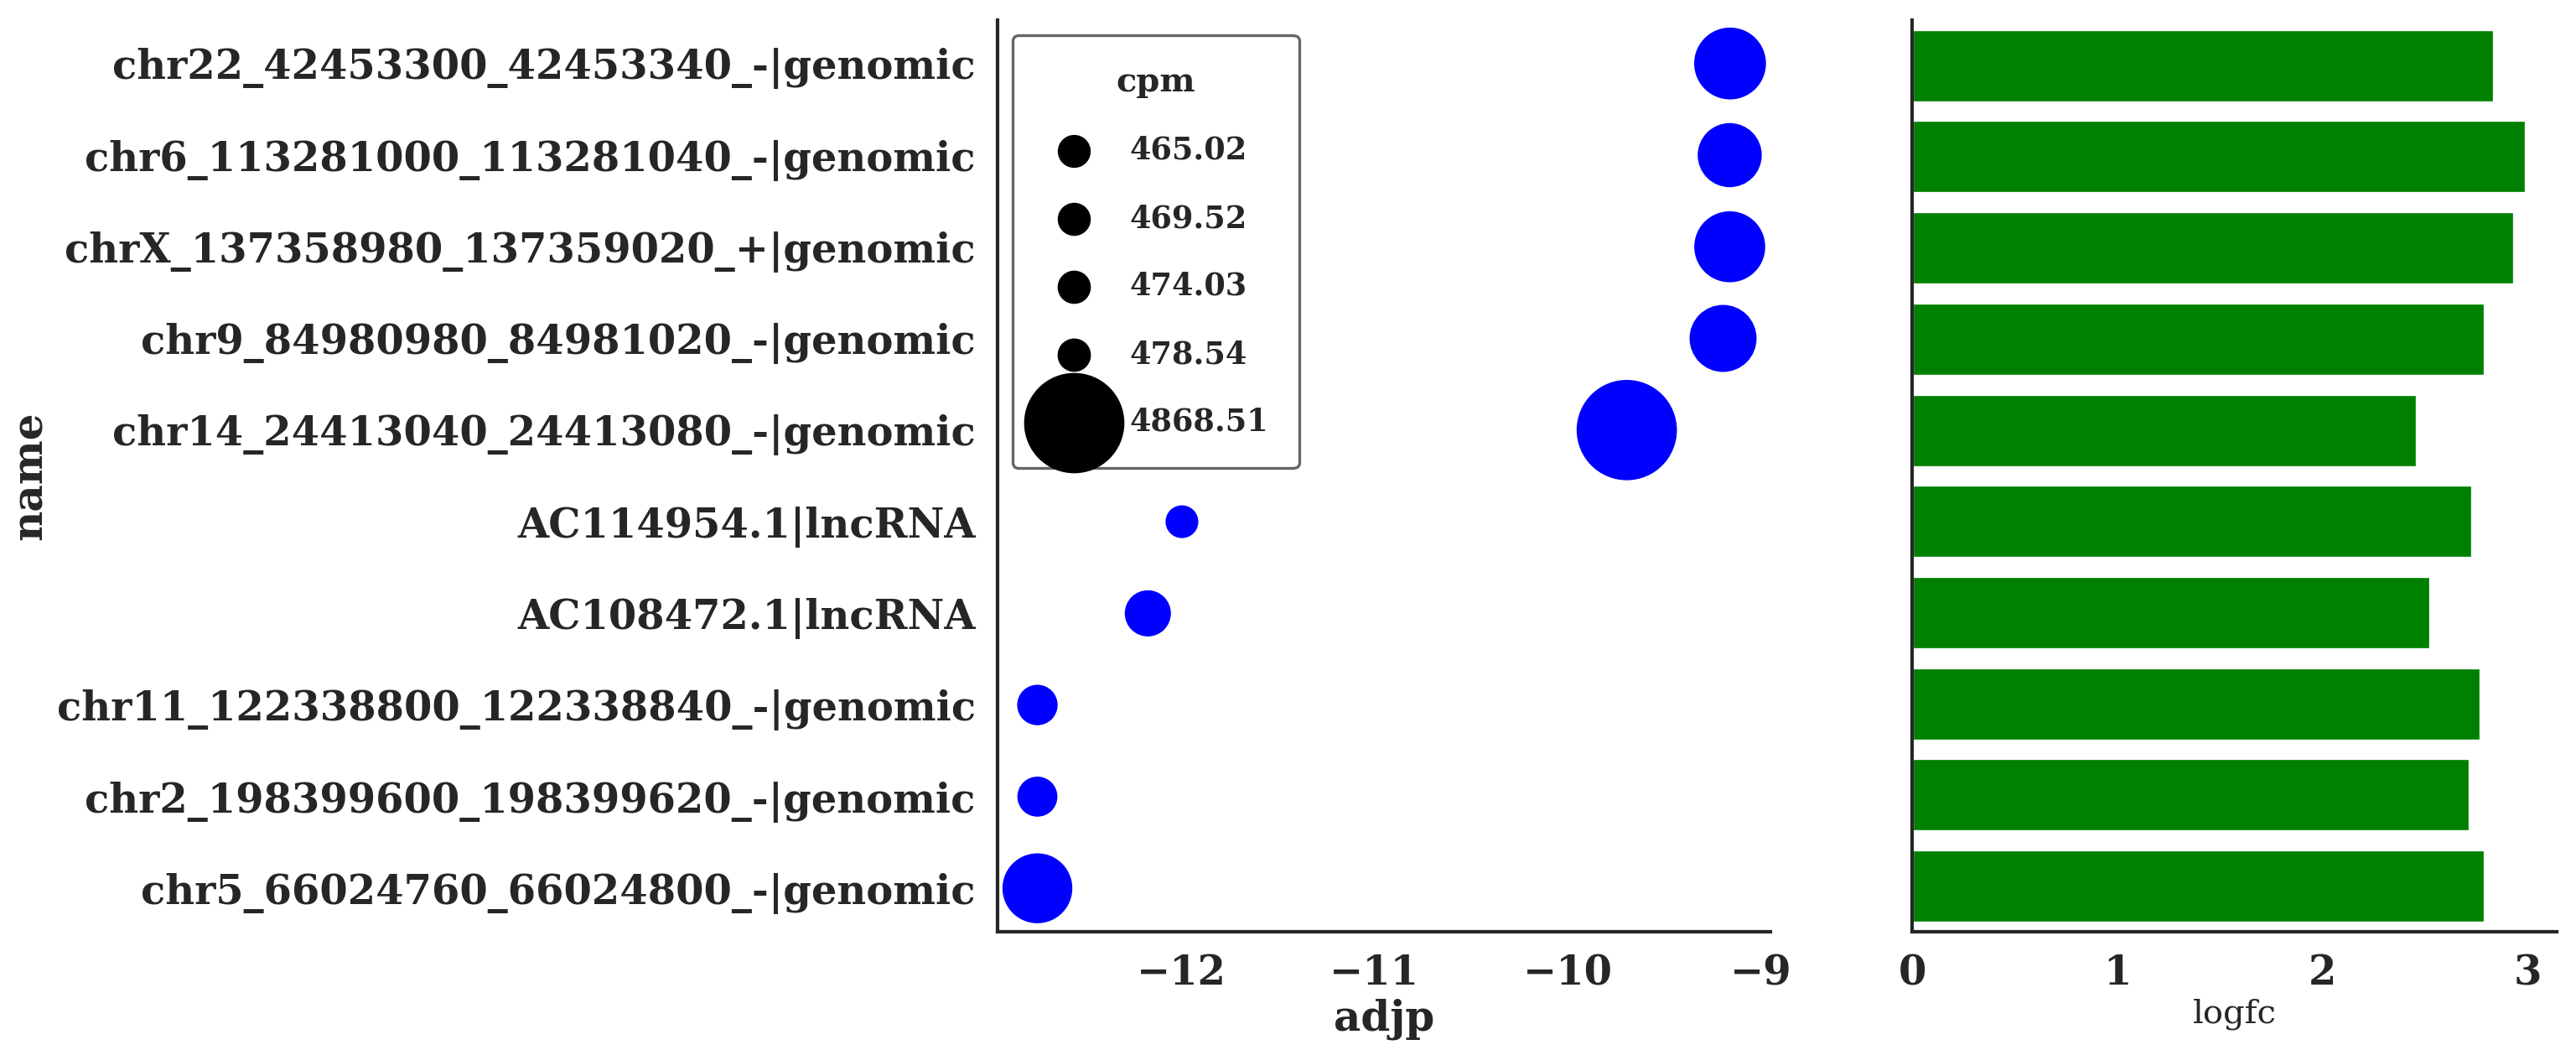

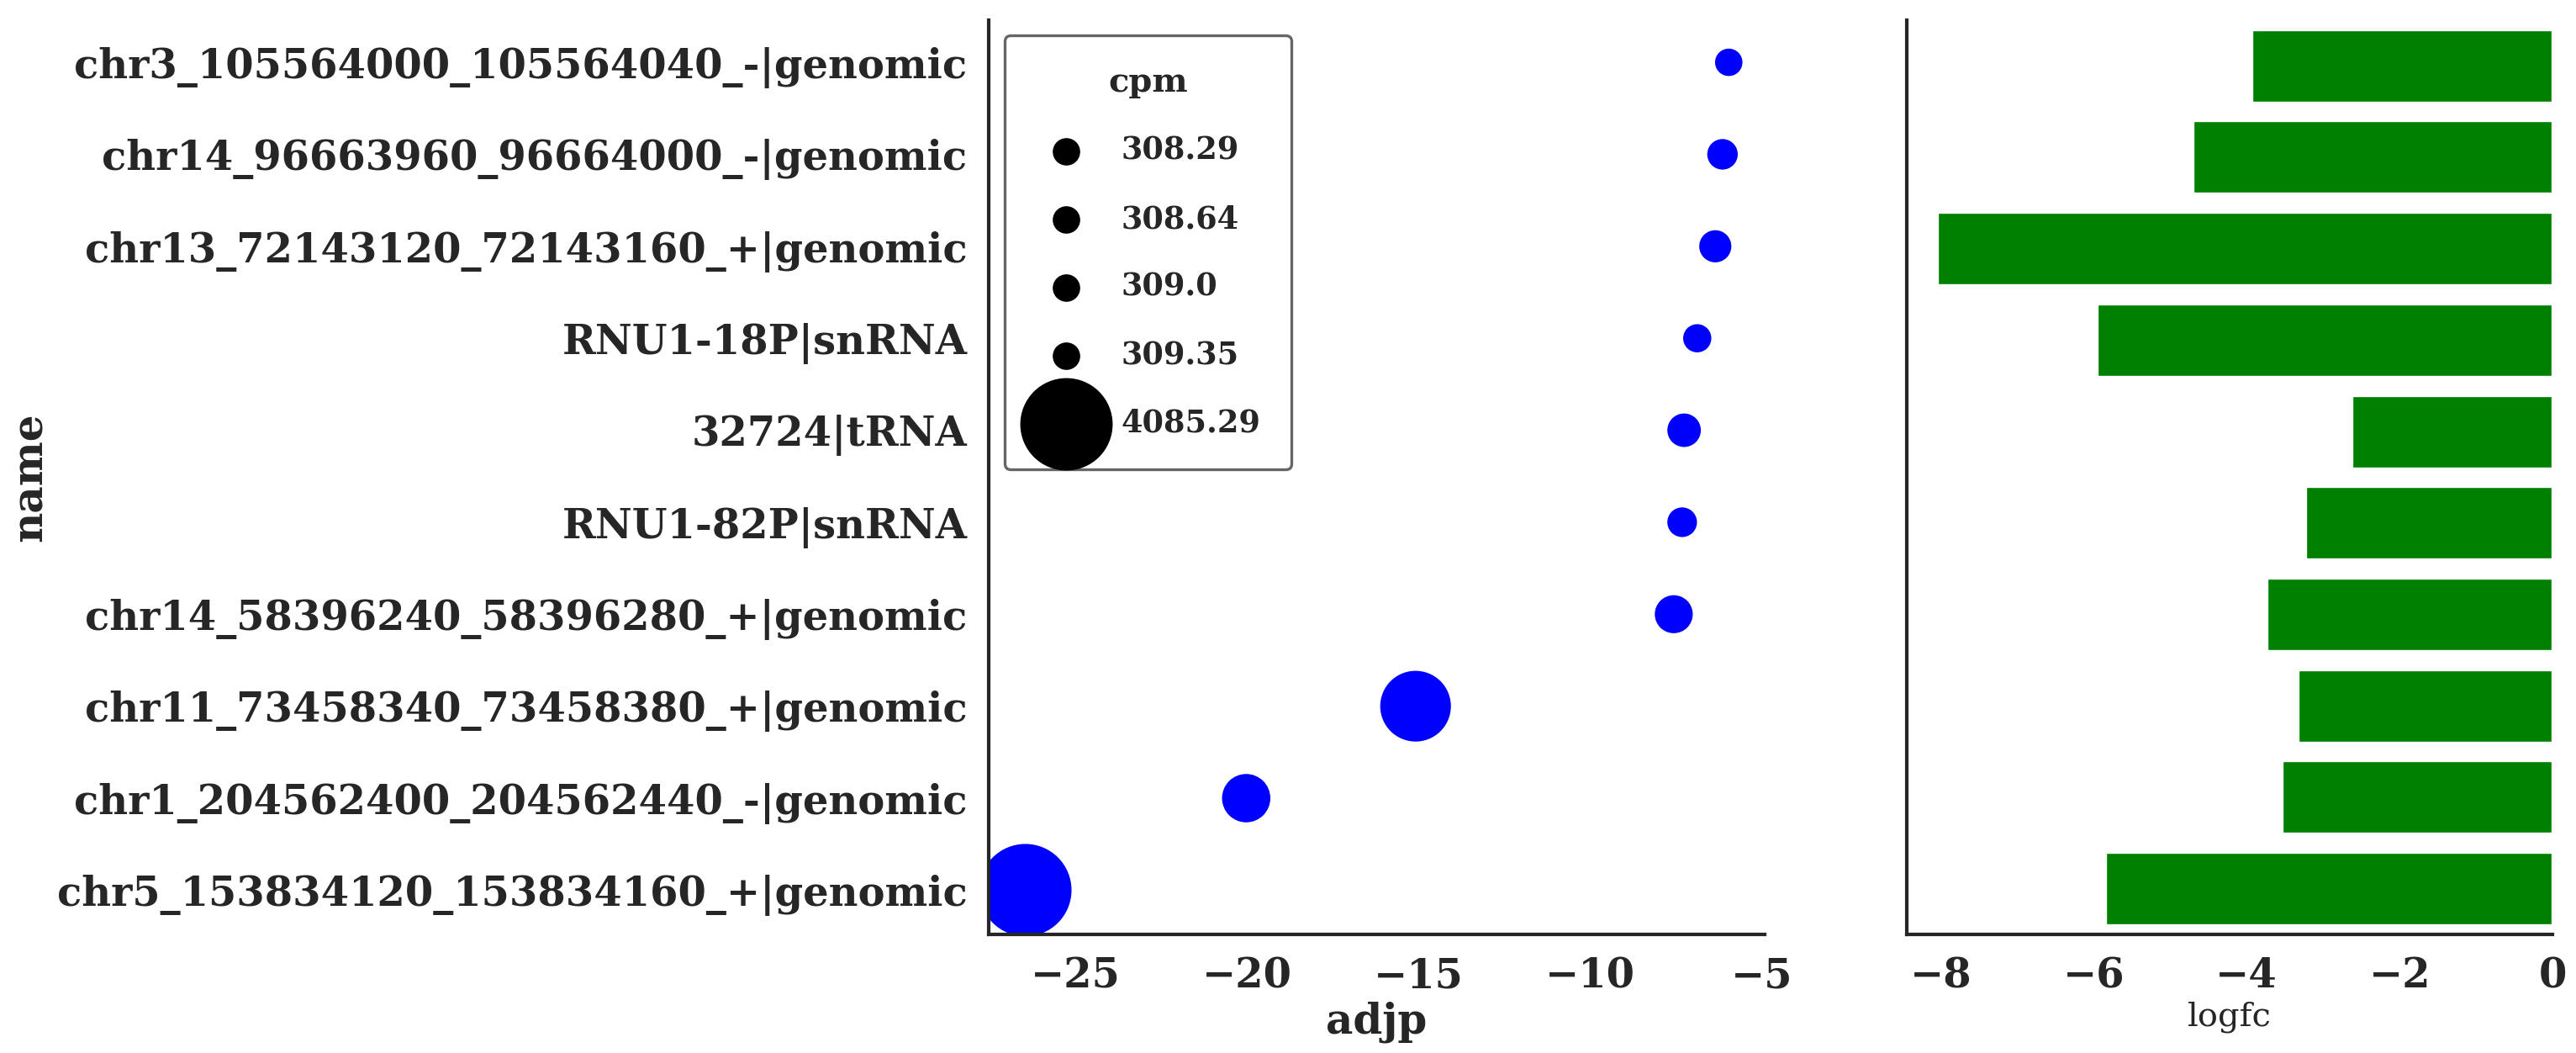

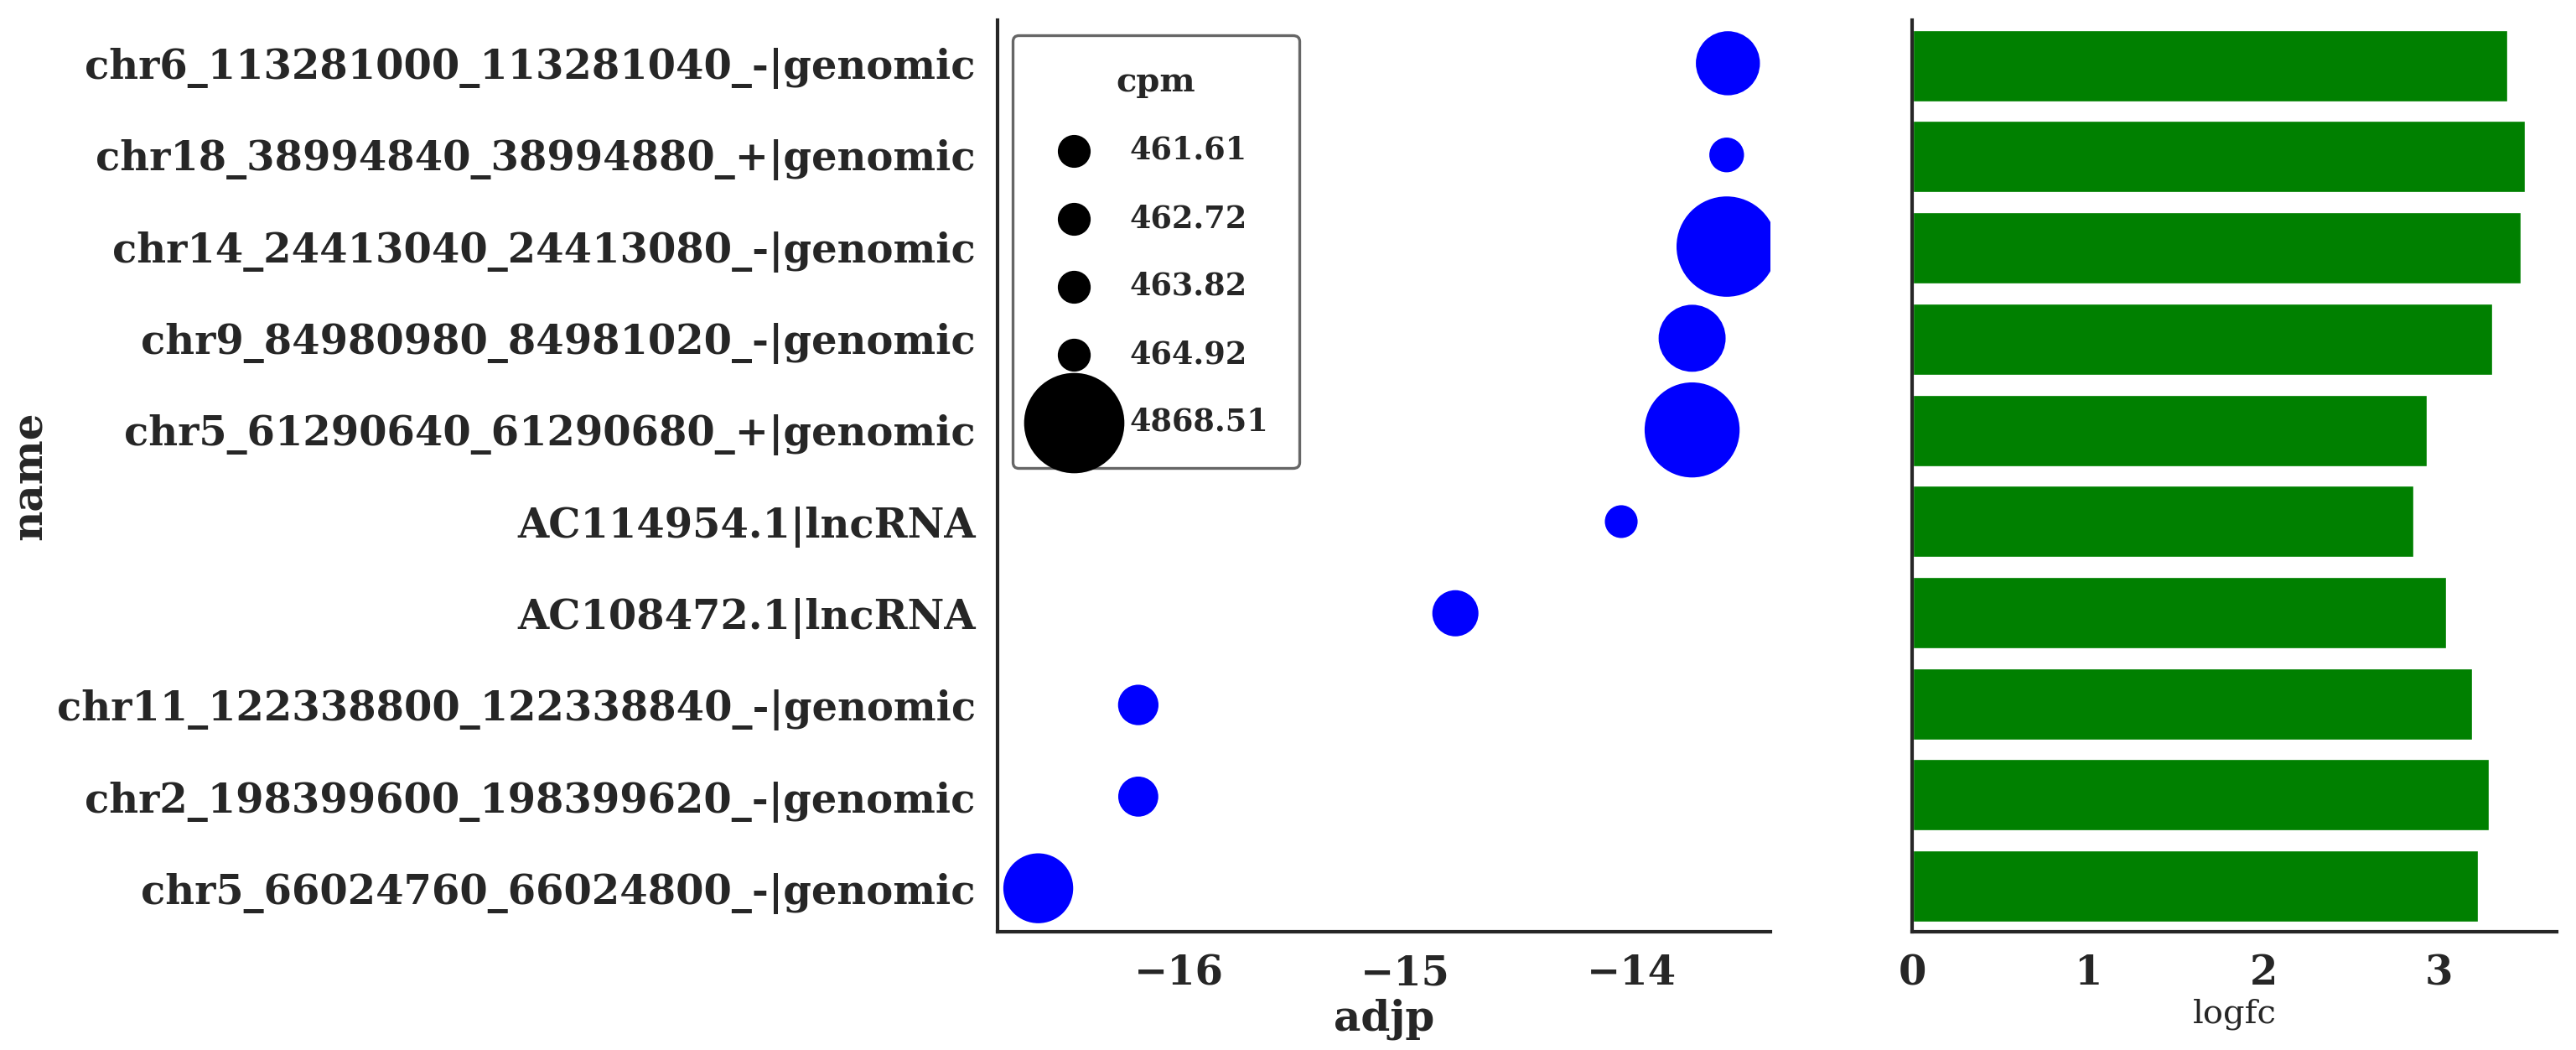

In [509]:
def DE_bar_plot(detable,rpkmtable,nums_retain=10):
    remain_table = detable.sort_values('padj').iloc[:nums_retain]
    featurename = remain_table.index
    featurename = np.array([featurename[i].split('|')[2]+'|'+featurename[i].split('|')[1] for i in range(len(featurename))])
    padj = remain_table.padj
    logfc = remain_table.log2FoldChange
    rpkm = rpkmtable.loc[remain_table.index].mean(axis=1)
    dataframe= pd.DataFrame(np.concatenate((featurename.reshape(-1,1),padj.reshape(-1,1),
                                           logfc.reshape(-1,1),rpkm.reshape(-1,1)),axis=1),columns=['name','padj','logfc','rpkm'])

    #dataframe_rpkm= pd.DataFrame(np.concatenate((featurename.reshape(-1,1),rpkm.reshape(-1,1)),axis=1),columns=['name','rpkm'])
    dataframe.padj  =  np.log10(dataframe.padj.astype('float'))
    dataframe.logfc  =  pd.to_numeric(dataframe.logfc)
    dataframe.rpkm  =  pd.to_numeric(dataframe.rpkm)

    fig,ax=plt.subplots(1,3,figsize=(nums_retain*4,12))
    sns.barplot(ax=ax[0],data=dataframe,y='name',x='padj',color='r',saturation=1)
    ax[0].set_xlabel('log10 adjusted p value')
    sns.barplot(ax=ax[1],data=dataframe,y='name',x='logfc',color='b',saturation=1)
    sns.barplot(ax=ax[2],data=dataframe,y='name',x='rpkm',color='g',saturation=1)
    #sns.barplot(ax=ax[2],data=dataframe_rpkm.iloc[:nums_retain],y='name',x='rpkm',color='g',saturation=1)
    if sequencing_type =='short':
        ax[2].set_xlabel('cpm')
    elif sequencing_type =='long':
        ax[2].set_xlabel('rpkm')
    plt.figure(linewidth=30.5)
    for i in range(3):
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
    fig.tight_layout()
    if savefig:
        fig.savefig(savepath+compare_group+'_bar_plot.png', bbox_inches='tight')
    ax[1].get_yaxis().set_ticks([])
    ax[1].set_ylabel('')
    ax[2].get_yaxis().set_ticks([])
    ax[2].set_ylabel('')
    fig.tight_layout()
    
def DE_bar_plot_(detable,rpkmtable,nums_retain=10):
    remain_table = detable.sort_values('padj').iloc[:nums_retain]
    featurename = remain_table.index
    featurename = np.array([featurename[i].split('|')[2]+'|'+featurename[i].split('|')[1] for i in range(len(featurename))])
    padj = remain_table.padj
    logfc = remain_table.log2FoldChange
    rpkm = rpkmtable.loc[remain_table.index].mean(axis=1)
    dataframe= pd.DataFrame(np.concatenate((featurename.reshape(-1,1),padj.reshape(-1,1),
                                           logfc.reshape(-1,1),rpkm.reshape(-1,1)),axis=1),columns=['name','padj','logfc','rpkm'])

    #dataframe_rpkm= pd.DataFrame(np.concatenate((featurename.reshape(-1,1),rpkm.reshape(-1,1)),axis=1),columns=['name','rpkm'])
    dataframe.padj  =  np.log10(dataframe.padj.astype('float'))
    dataframe.logfc  =  pd.to_numeric(dataframe.logfc)
    dataframe.rpkm  =  pd.to_numeric(dataframe.rpkm)

    fig,ax=plt.subplots(1,2,figsize=(nums_retain*4,12))
    #sns.barplot(ax=ax[0],data=dataframe,y='name',x='padj',color='r',saturation=1)
    #for i in range(nums_retain):
        #display(pd.DataFrame(dataframe.iloc[i]).T)
    sns.stripplot(ax=ax[0],y='name',x='padj', data = dataframe, 
               palette="Set1", size=np.arange(100,200,10))#dataframe.rpkm[i])
    ax[0].set_xlabel('log10 adjusted p value')
    #sns.barplot(ax=ax[1],data=dataframe,y='name',x='logfc',color='b',saturation=1)
    sns.barplot(ax=ax[1],data=dataframe,y='name',x='logfc',color='g',saturation=1)
    #sns.barplot(ax=ax[2],data=dataframe_rpkm.iloc[:nums_retain],y='name',x='rpkm',color='g',saturation=1)
    
    if sequencing_type =='short':
        mattype = 'cpm'
    elif sequencing_type =='long':
        mattype = 'rpkm'
    ax[1].set_xlabel(mattype)
    plt.figure(linewidth=30.5)
    for i in range(2):
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
    fig.tight_layout()
    if savefig:
        fig.savefig(savepath+compare_group+'_bar_plot.png', bbox_inches='tight')
    ax[1].get_yaxis().set_ticks([])
    ax[1].set_ylabel('')
    #ax[2].get_yaxis().set_ticks([])
    #ax[2].set_ylabel('')
    fig.tight_layout()
def DE_bar_plot__(detable,rpkmtable,nums_retain=10):
    remain_table = detable.sort_values('padj').iloc[:nums_retain]
    featurename = remain_table.index
    featurename = np.array([featurename[i].split('|')[2]+'|'+featurename[i].split('|')[1] for i in range(len(featurename))])
    padj = remain_table.padj
    logfc = remain_table.log2FoldChange
    rpkm = rpkmtable.loc[remain_table.index].mean(axis=1)
    dataframe= pd.DataFrame(np.concatenate((featurename.reshape(-1,1),padj.reshape(-1,1),
                                           logfc.reshape(-1,1),rpkm.reshape(-1,1)),axis=1),columns=['name','padj','logfc','rpkm'])

    #dataframe_rpkm= pd.DataFrame(np.concatenate((featurename.reshape(-1,1),rpkm.reshape(-1,1)),axis=1),columns=['name','rpkm'])
    dataframe.padj  =  np.log10(dataframe.padj.astype('float'))
    dataframe.logfc  =  pd.to_numeric(dataframe.logfc)
    dataframe.rpkm  =  pd.to_numeric(dataframe.rpkm)    
    #display(dataframe)
    f, (ax, ax1) = plt.subplots(1,2, figsize=(nums_retain*2,12),gridspec_kw = {'width_ratios':[1.2, 1]})
    scalefactor=1
    ax.scatter(dataframe.padj, np.arange(10),
                c = 'b', s=(dataframe.rpkm)*5, cmap="viridis")
    ax.set_xlabel("adjp",fontsize=30,fontdict=dict(weight='bold'))
    ax.set_ylabel("name",fontsize=30,fontdict=dict(weight='bold'))
    ax.set_yticks(np.arange(10))
    ax.set_yticklabels(featurename)
    if sequencing_type =='short':
        mattype = 'cpm'
    elif sequencing_type =='long':
        mattype = 'rpkm'
    #make a legend:
    pws = np.round(np.array([np.min(dataframe.rpkm),np.percentile(dataframe.rpkm,0.2),
                   np.percentile(dataframe.rpkm,0.4),np.percentile(dataframe.rpkm,0.6),
                   np.percentile(dataframe.rpkm,0.8),np.max(dataframe.rpkm)])*5,2)
    for pw in pws:
        ax.scatter([], [], s=pw*scalefactor, c="k",label=str(pw))
        
    h,l = ax.get_legend_handles_labels()
    ax.legend(h[1:], l[1:], labelspacing=1.2, title=mattype, borderpad=1, 
                frameon=True, framealpha=0.6, edgecolor="k", facecolor="w")
    sns.barplot(ax=ax1,data=dataframe,y='name',x='logfc',color='g',saturation=1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    fig.tight_layout()
    if savefig:
        fig.savefig(savepath+compare_group+'_bar_plot.png', bbox_inches='tight')
    ax1.get_yaxis().set_ticks([])
    ax1.set_ylabel('')
    
for compare_group, preprocess_method in tqdm(best_preprocess_methods.items()):
    if sequencing_type =='short':
        tmptable = cpm_table_origin
    elif sequencing_type =='long':
        tmptable = rpkm_table_origin
    detable = pd.read_table('output/'+dataset+'/differential_expression/'+exp_mx_name+'/'+compare_group+'/deseq2.txt'
                       ,index_col=0)
    DE_bar_plot__(detable,tmptable,nums_retain=10)